# **Perennial Crops Trend Analysis for Agriculture Commodities in Kenya**

#### Author: Edward Njiru
#### Date: September 2024

---

## Introduction
This notebook analyzes the trends in volumes and prices of perennial crops in Kenya for the period from **2019 to 2024**. The primary goals of the analysis include:
1. Understanding changes in crop volumes and prices on a monthly and quarterly basis.
2. Identifying high-demand perennial crops based on supplied volumes and market prices.
3. Evaluating the most profitable crops by analyzing the margins between wholesale and retail prices.
4. Identifying key insights for stakeholders, including farmers, market linkage players, logistics, and retailers.

---

### Table of Contents
1. Data Loading and Exploration
2. Time Series Analysis of Crop Prices and Volumes
3. Monthly and Quarterly Trend Analysis
4. Crop Demand and Supply Analysis
5. Profitability Analysis: Wholesale vs. Retail Prices
6. Conclusions and Insights

---

## Section 1: Data Loading and Initial Exploration

In this section, we will:
- Load the dataset containing information on perennial crops.
- Conduct an initial exploration to understand its structure and contents.
- Check for missing values and data types for each column.
- Generate summary statistics for key numerical columns.


In [107]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# To ignore warnings
warnings.filterwarnings('ignore')

# Display settings for pandas
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 150)  # Limit display of rows for clarity

In [108]:
# Load the dataset from the provided CSV file path
file_path = r"H:\Datasets\Agriculture Kenya\Food Prices\KAMIS 2009-2024\Clean Datasets\perennial_crops_data.csv"

# Reading the CSV file into a pandas DataFrame
perennial_data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset to get an overview
perennial_data.head()

date commodity classification         county            market  \
0  14/09/2024    Apples              -        Muranga     Mukuyu Market   
1  13/09/2024    Apples              -         Migori            Awendo   
2  13/09/2024    Apples              -      Kirinyaga          Kerugoya   
3  13/09/2024    Apples              -  Tharaka-Nithi             Chuka   
4  13/09/2024    Apples              -        Nairobi  Nairobi Wakulima   

   volume_supplied_tonnes  wholesale_price_ksh  retail_price_ksh  
0                   0.225                125.0             150.0  
1                   1.800                100.0             150.0  
2                   0.150                240.0             320.0  
3                   0.050                350.0             350.0  
4                   0.160                200.0             250.0

In [109]:
# Check the data types of each column and for missing values
perennial_data.info()

# Check for any missing values in the dataset
missing_values = perennial_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics for numeric columns (volume, wholesale price, retail price)
perennial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128219 entries, 0 to 128218
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    128219 non-null  object 
 1   commodity               128219 non-null  object 
 2   classification          128219 non-null  object 
 3   county                  128219 non-null  object 
 4   market                  128219 non-null  object 
 5   volume_supplied_tonnes  128219 non-null  float64
 6   wholesale_price_ksh     128219 non-null  float64
 7   retail_price_ksh        128219 non-null  float64
dtypes: float64(3), object(5)
memory usage: 7.8+ MB
Missing values per column:
 date                      0
commodity                 0
classification            0
county                    0
market                    0
volume_supplied_tonnes    0
wholesale_price_ksh       0
retail_price_ksh          0
dtype: int64


volume_supplied_tonnes  wholesale_price_ksh  retail_price_ksh
count           128219.000000        128219.000000     128219.000000
mean                 1.281585            51.228381        121.667212
std                  1.329188           212.518365        701.334182
min                  0.000050             0.010000          0.010000
25%                  0.370000            20.830000         52.630000
50%                  0.850000            36.630000         80.000000
75%                  2.000000            59.027500        150.000000
max                 63.200000         11500.000000     200000.000000

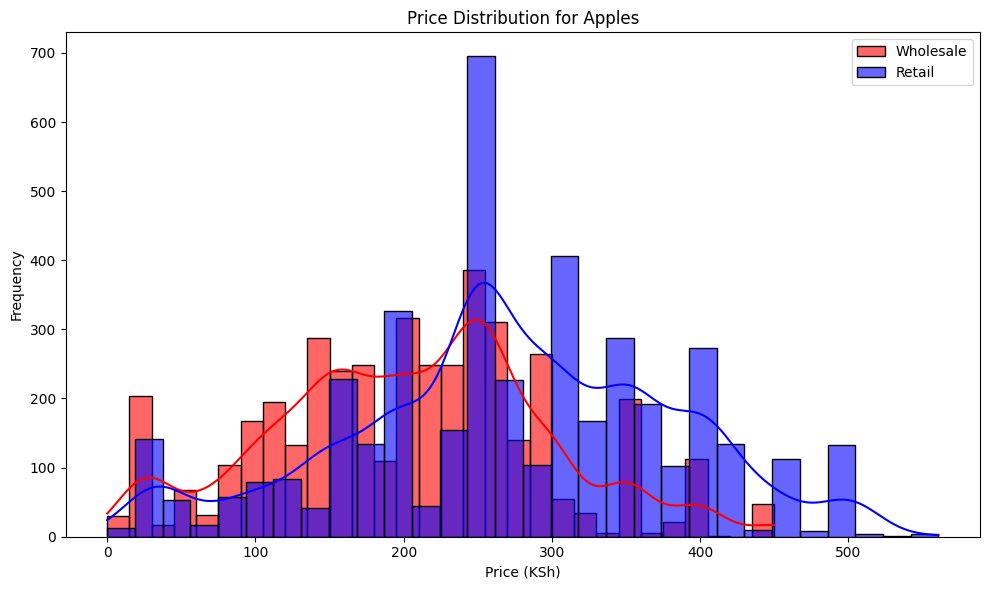

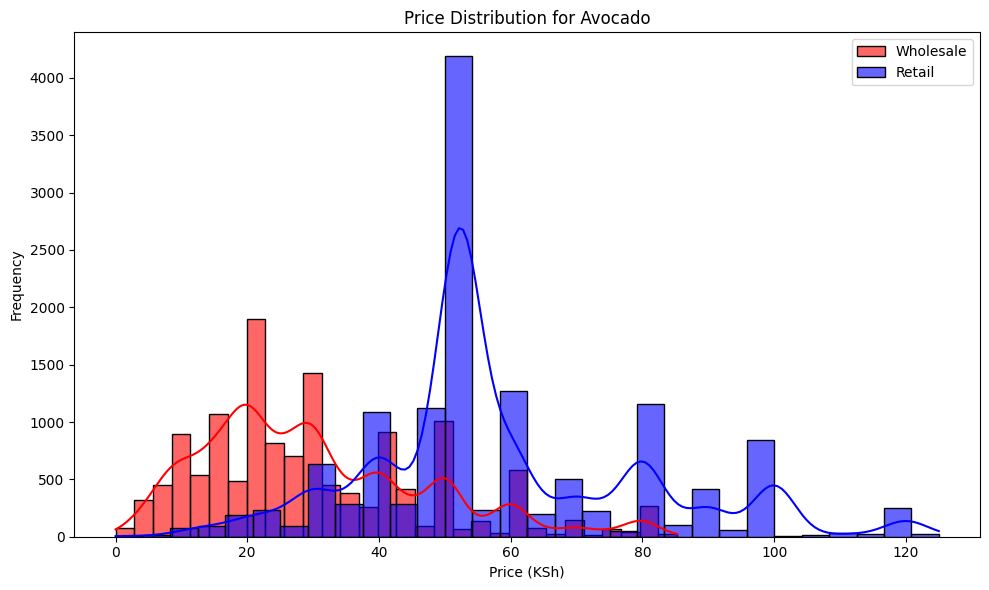

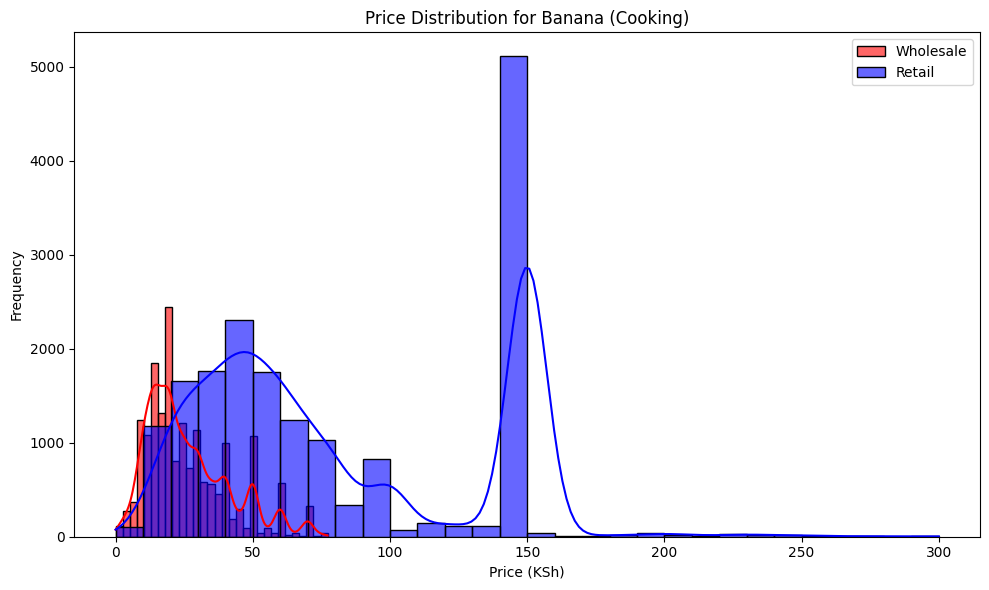

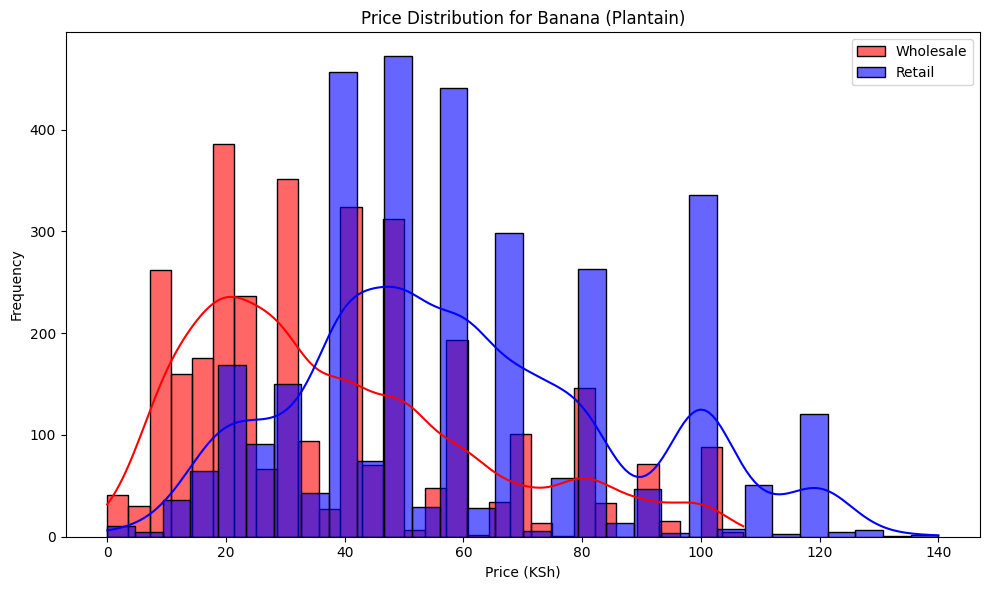

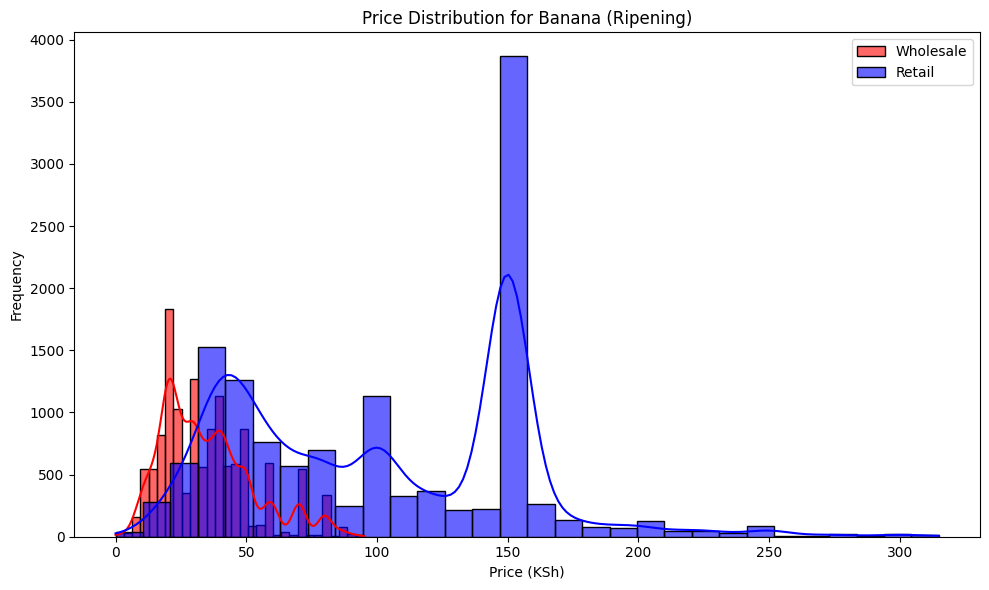

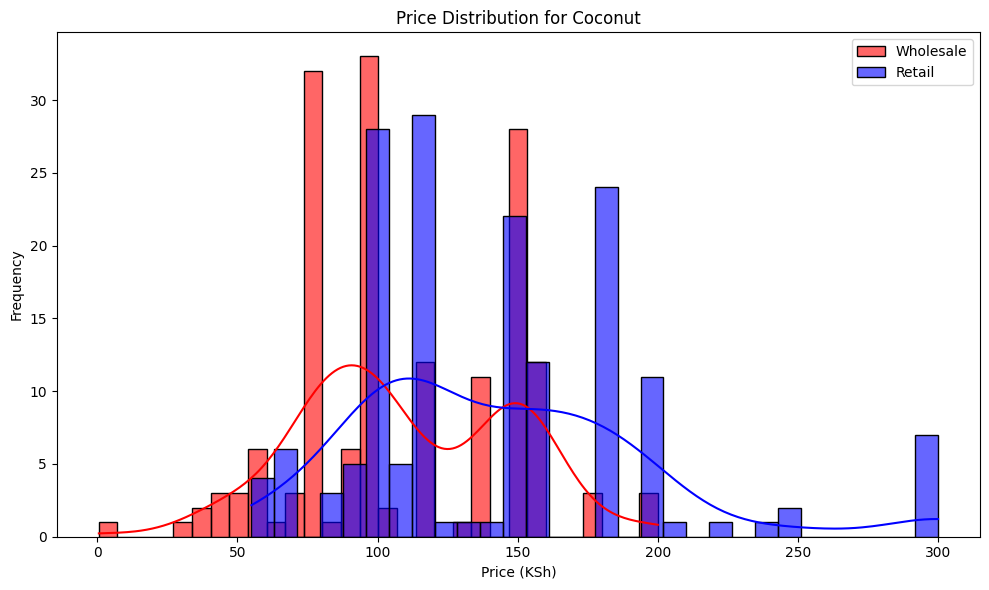

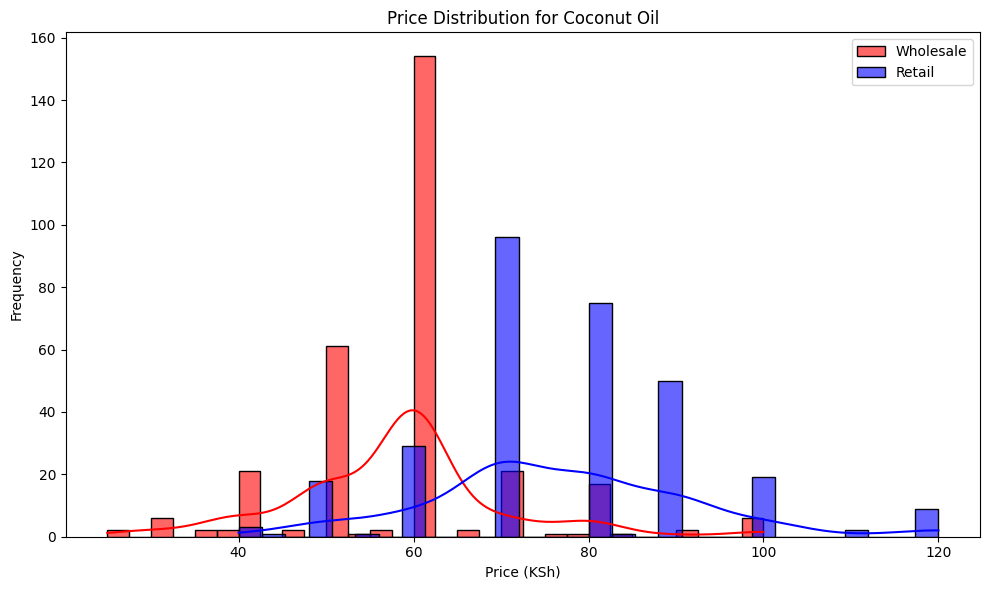

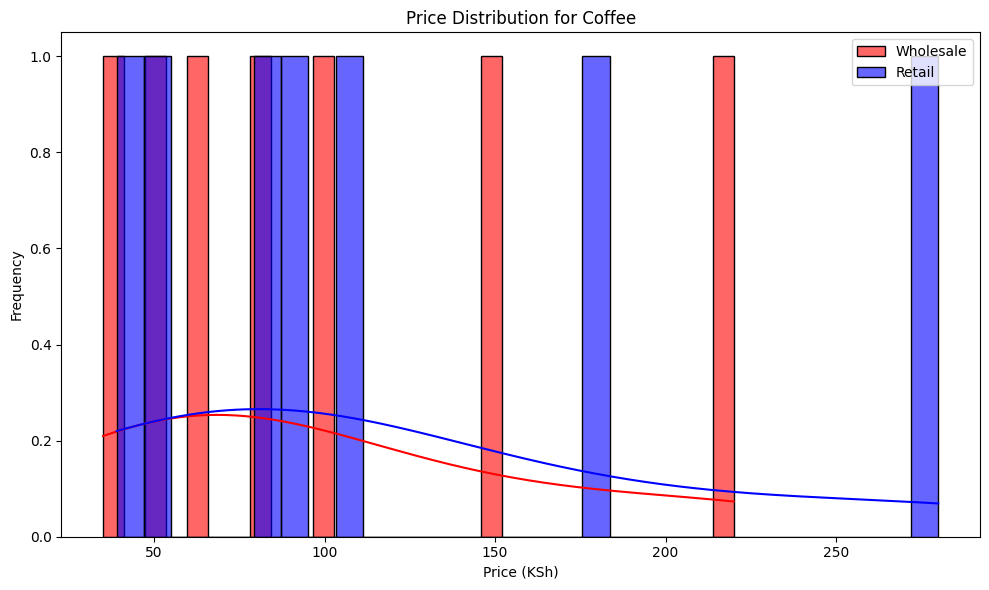

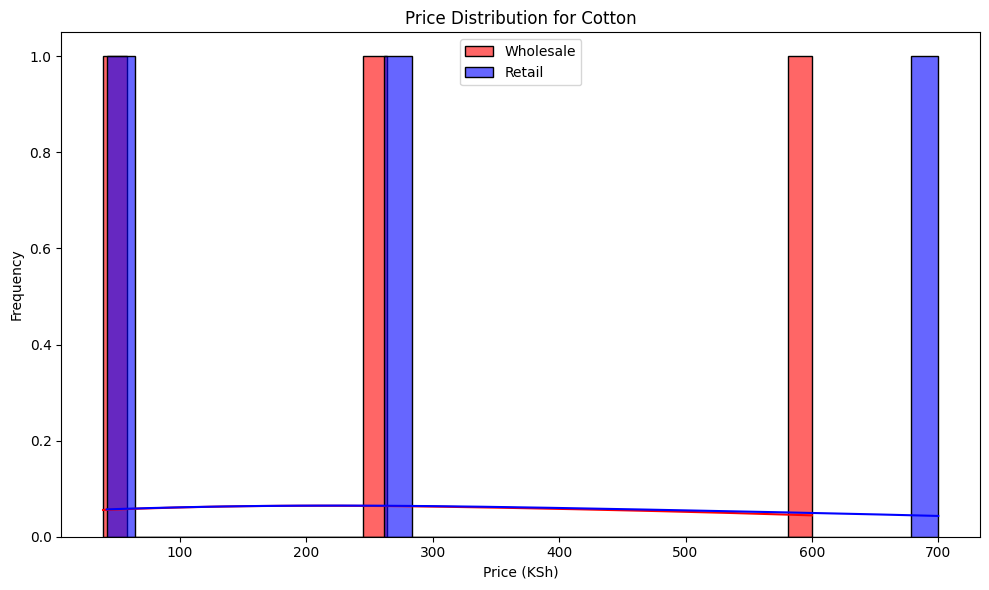

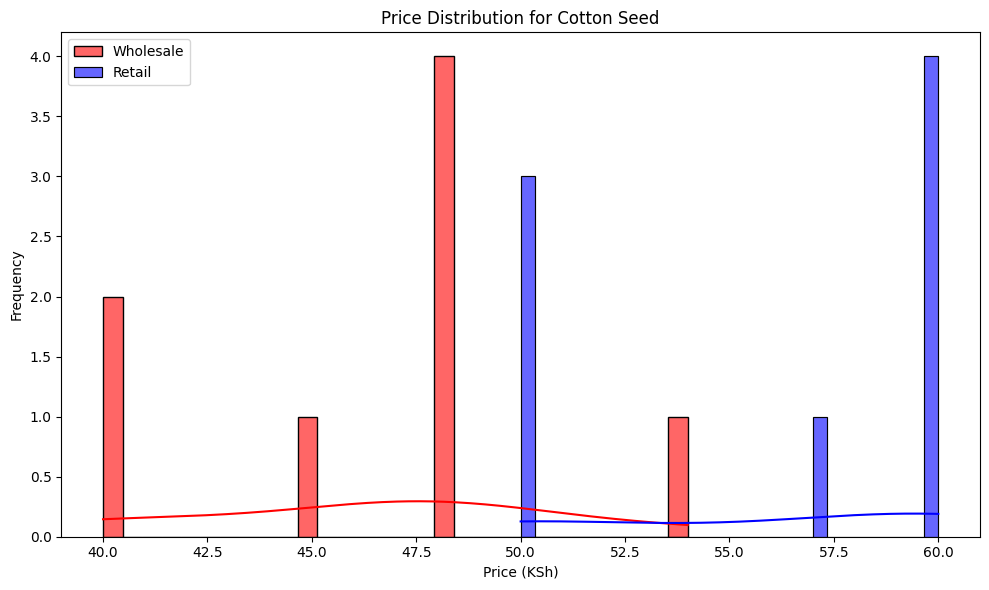

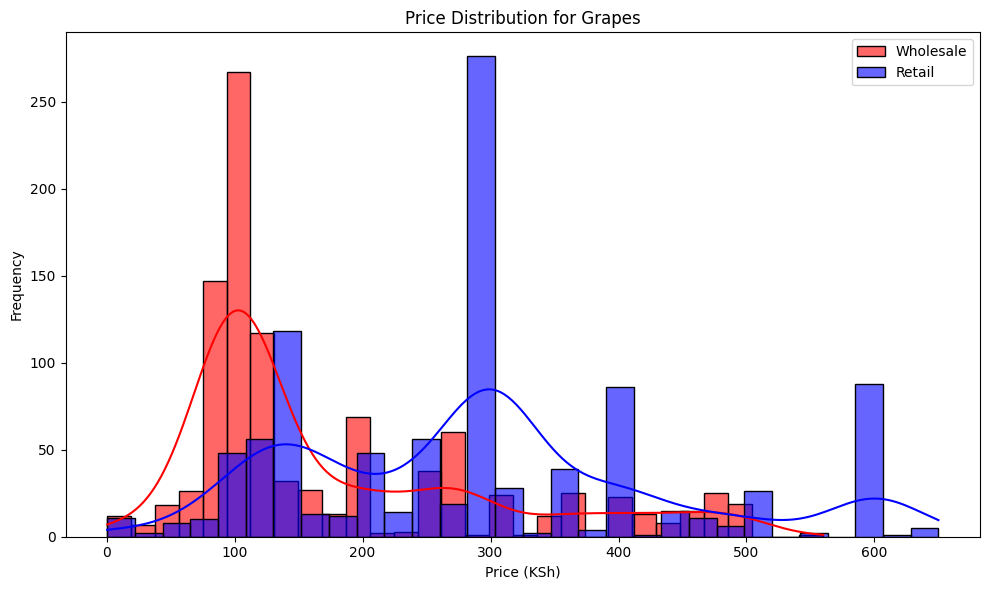

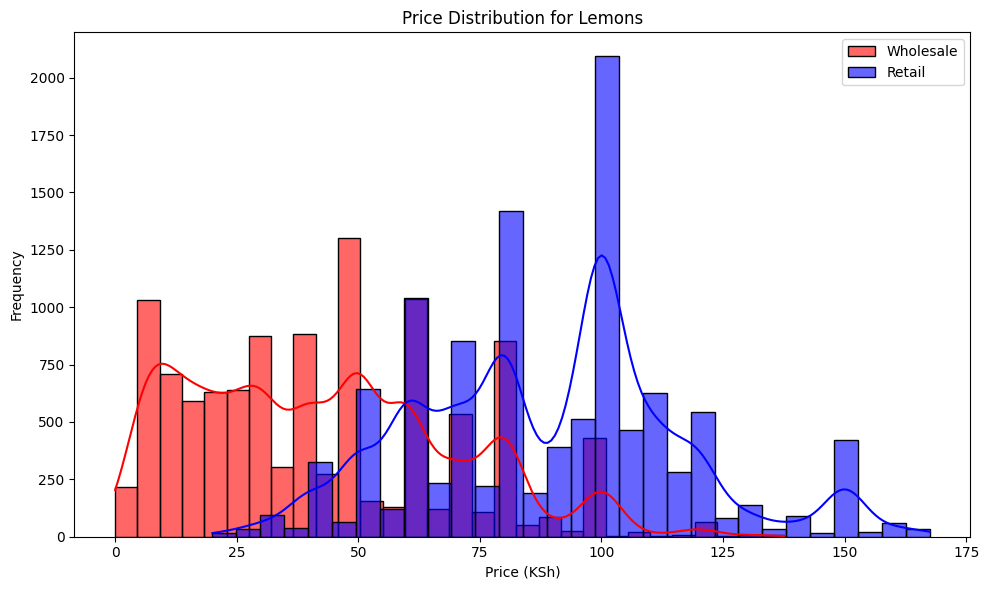

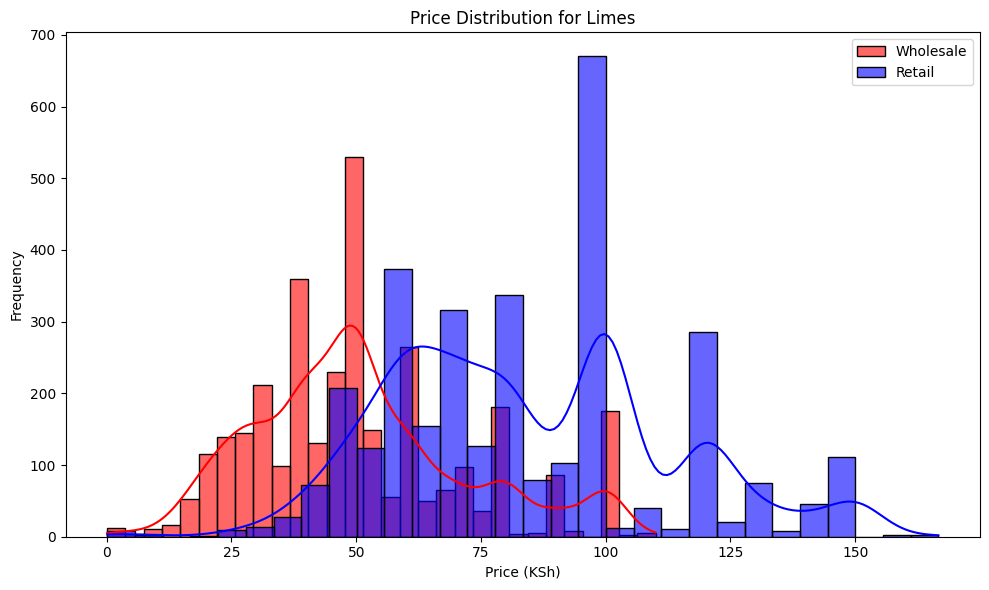

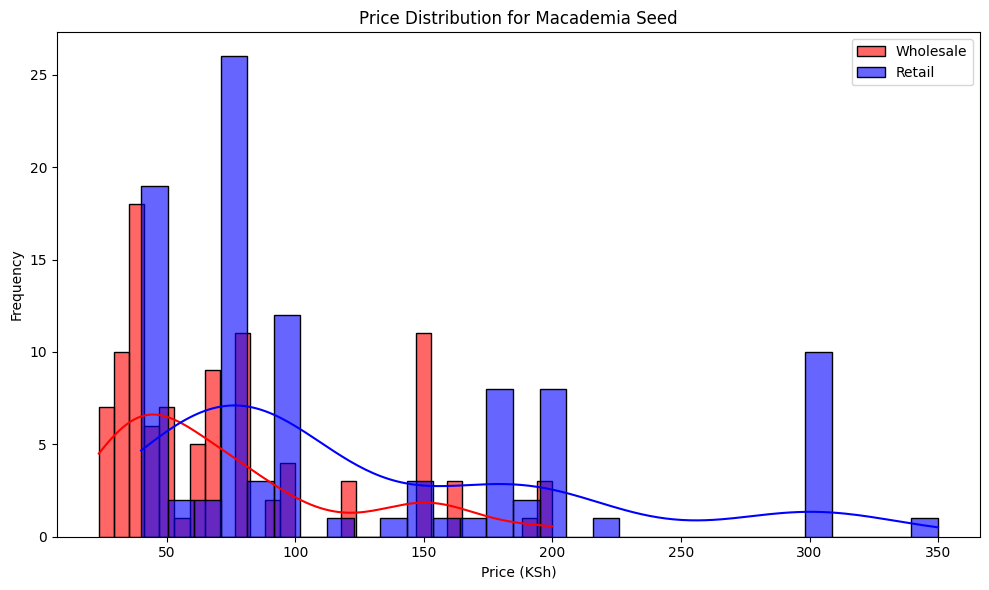

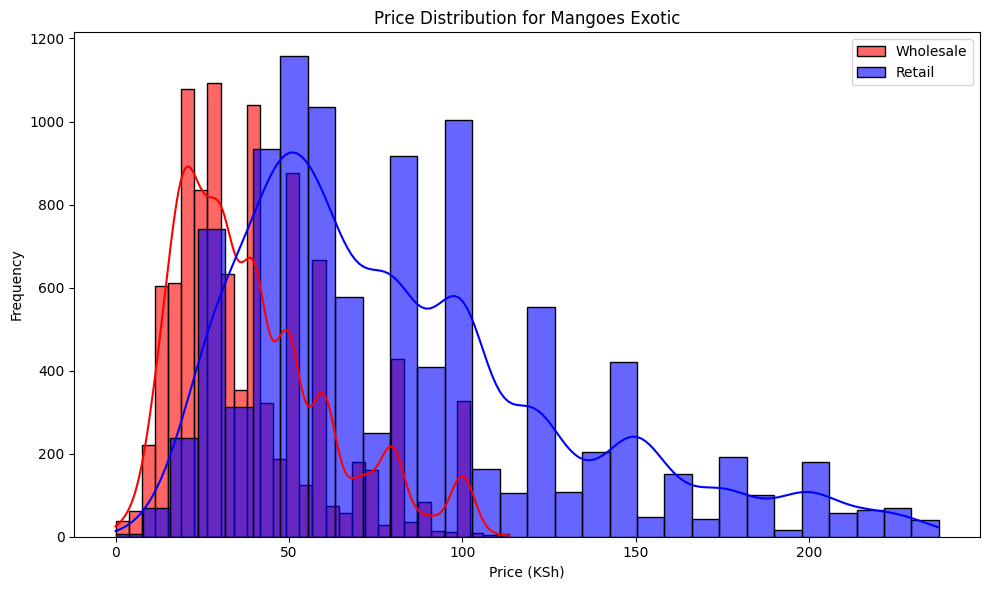

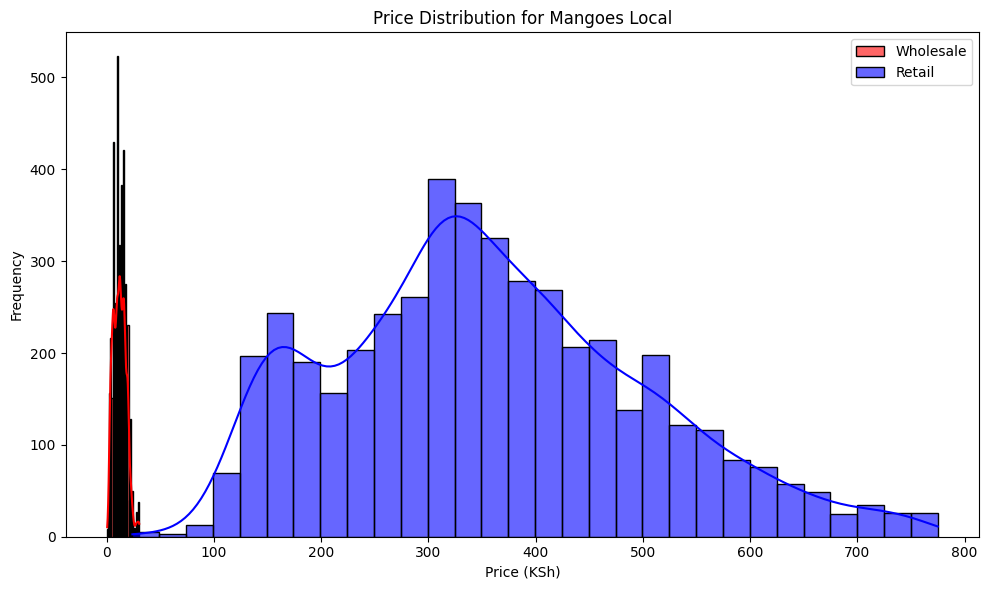

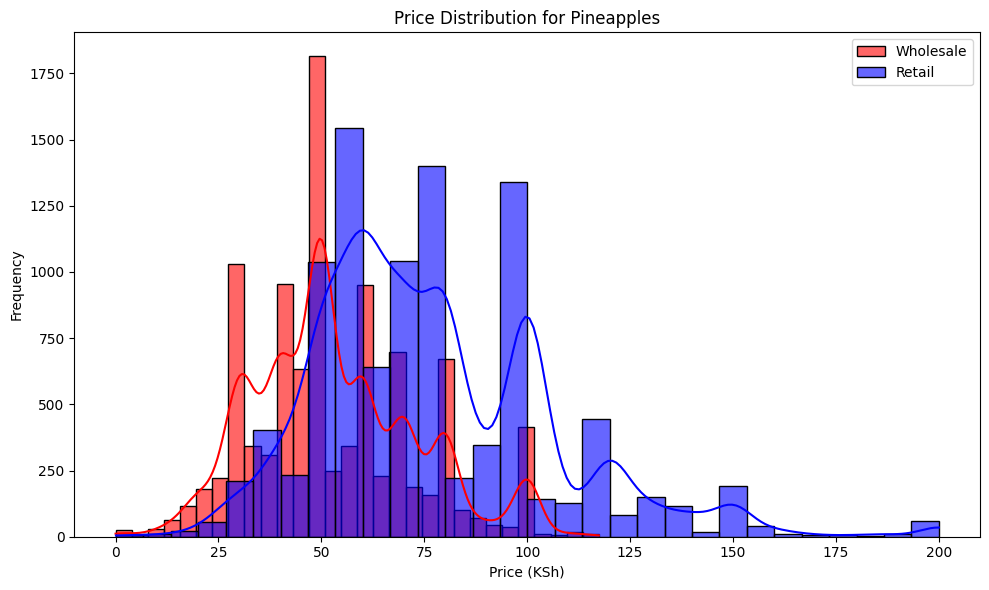

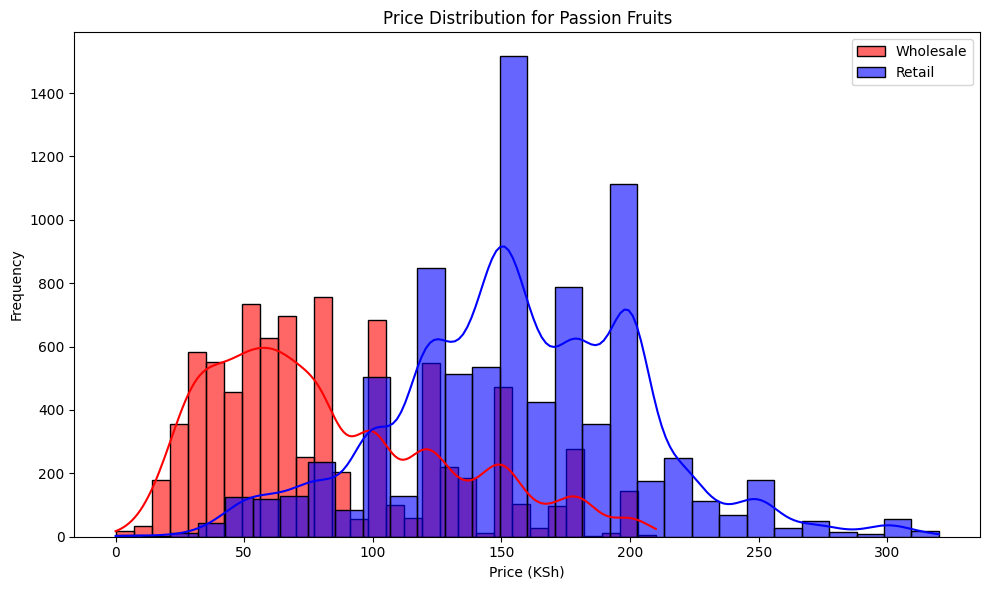

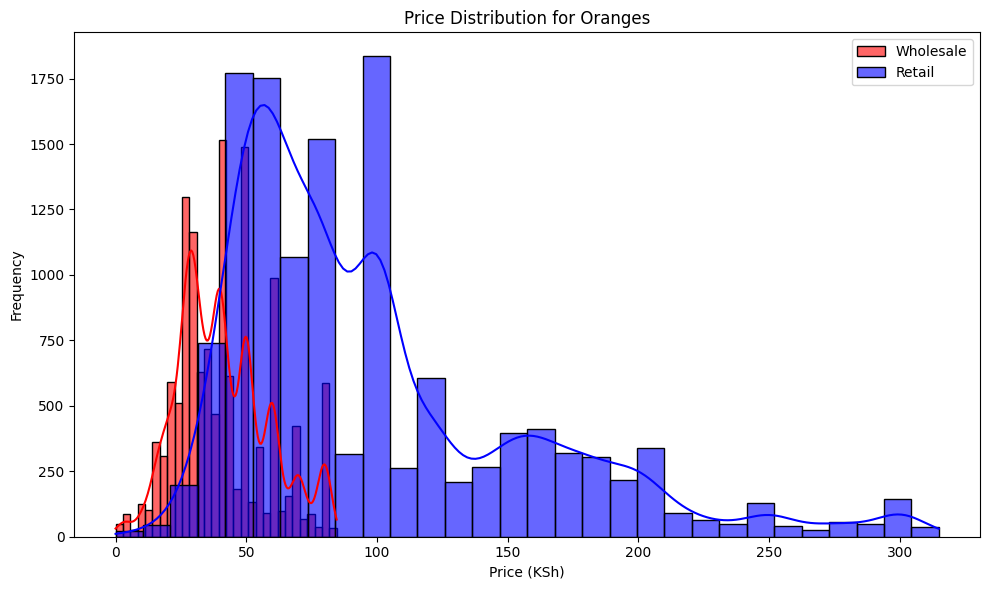

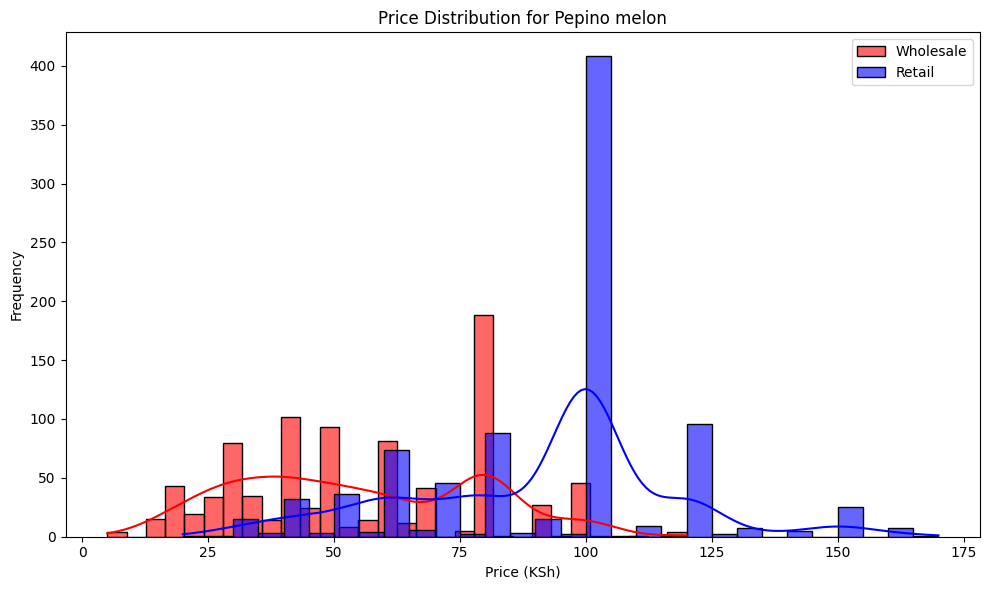

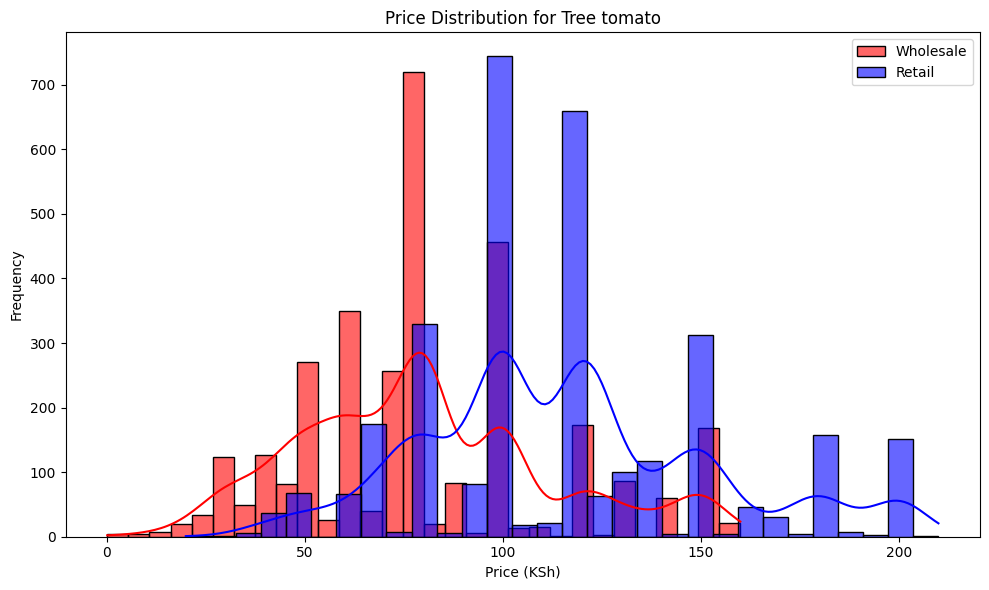

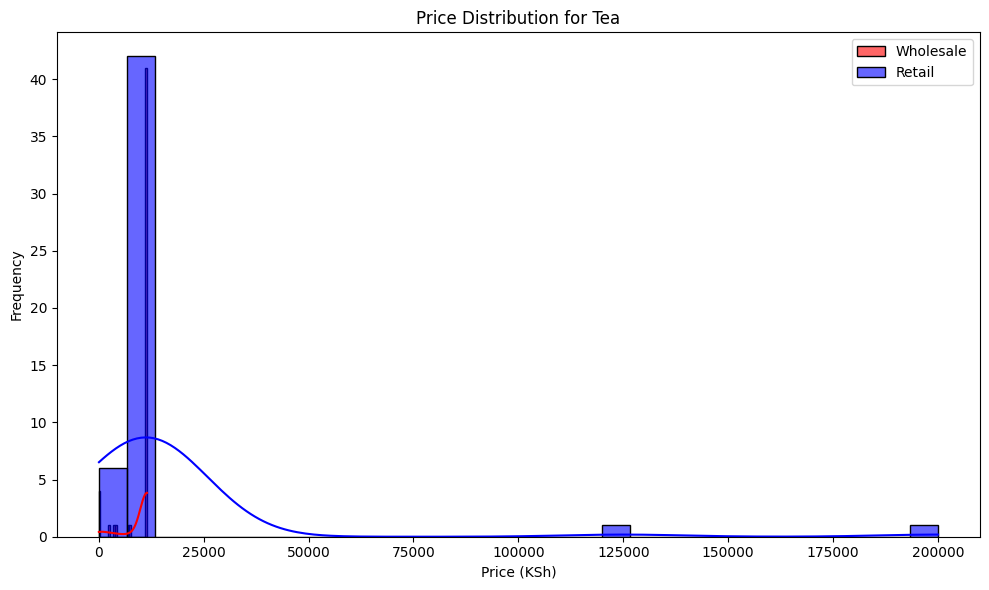

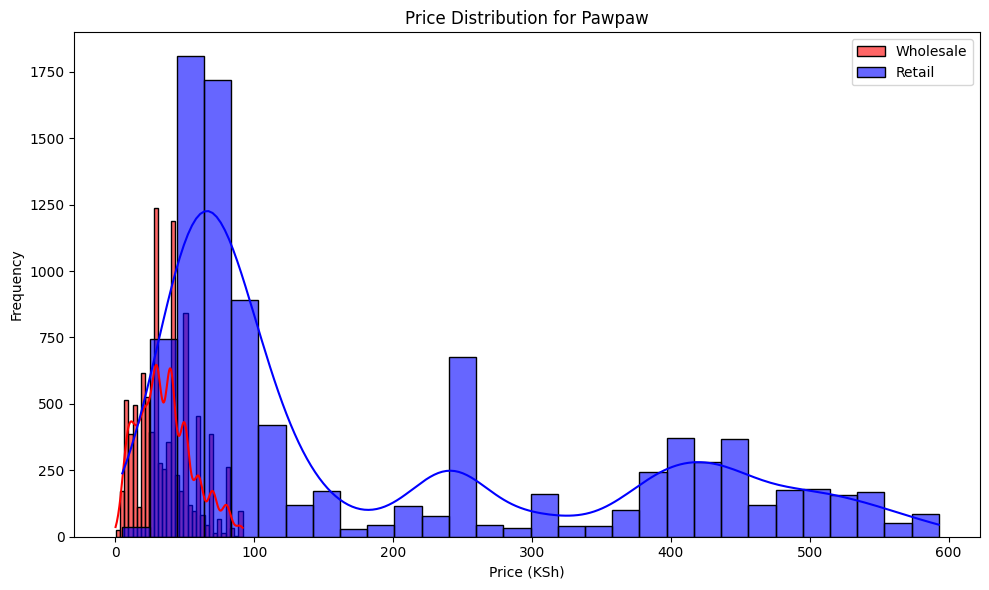

In [110]:
# Get the list of unique commodities
commodities = perennial_data['commodity'].unique()

# Loop through each commodity and plot wholesale and retail price distributions
for commodity in commodities:
    # Filter data for the specific commodity
    commodity_data = perennial_data[perennial_data['commodity'] == commodity]
    
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Plot wholesale prices
    sns.histplot(commodity_data['wholesale_price_ksh'], kde=True, bins=30, color='red', label='Wholesale', alpha=0.6)
    
    # Plot retail prices
    sns.histplot(commodity_data['retail_price_ksh'], kde=True, bins=30, color='blue', label='Retail', alpha=0.6)
    
    # Add title and labels
    plt.title(f'Price Distribution for {commodity}')
    plt.xlabel('Price (KSh)')
    plt.ylabel('Frequency')
    
    # Add legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

### Data Overview and Initial Observations

From the initial inspection of the dataset, we can observe the following key points:

1. The dataset contains **128,219 entries** across 8 columns.
2. There are **no missing values** in any of the columns, which is a positive indicator of data quality.
3. The columns include:
   - `date`: This column is currently stored as an object (string) and will need to be converted into a datetime format for time-series analysis.
   - `commodity`, `classification`, `county`, `market`: These categorical columns provide information about the type of crop, region, and market.
   - `volume_supplied_tonnes`: A numerical column representing the volume of crops supplied in tonnes.
   - `wholesale_price_ksh` and `retail_price_ksh`: Numerical columns representing wholesale and retail prices in Kenyan Shillings (KSh).
4. The distributions are quite irregular/inconsistent and skewed. Since I want to share typical pricing for this skewed data, I will use the IQR method for outlier detection.

### Next Steps

1. **Date Conversion**:
   - We need to convert the `date` column from an object data type to a `datetime` data type to facilitate time-series analysis.

2. **Basic Data Integrity Check**:
   - Although there are no missing values, we should perform an integrity check to ensure that there are no suspicious entries (e.g., extremely high or low values for `volume_supplied_tonnes`, `wholesale_price_ksh`, or `retail_price_ksh`).

3. **Outlier Detection**:
   - Once we understand the distribution of key numeric columns, we will detect and handle any outliers that may skew the analysis (e.g., prices that seem unusually high or low) using the IQR method.

4. **Exploratory Data Analysis (EDA)**:
   - After cleaning the data, we will proceed with EDA, focusing on trends in supply volumes, wholesale, and retail prices, and identifying patterns across time, markets, and regions.

We will begin with date conversion and basic data integrity checks before moving on to outlier detection.


In [111]:
# Convert the 'date' column from object to datetime, with dayfirst=True to handle the format
perennial_data['date'] = pd.to_datetime(perennial_data['date'], dayfirst=True)

# Verify the change
perennial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128219 entries, 0 to 128218
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    128219 non-null  datetime64[ns]
 1   commodity               128219 non-null  object        
 2   classification          128219 non-null  object        
 3   county                  128219 non-null  object        
 4   market                  128219 non-null  object        
 5   volume_supplied_tonnes  128219 non-null  float64       
 6   wholesale_price_ksh     128219 non-null  float64       
 7   retail_price_ksh        128219 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 7.8+ MB


In [112]:
# Check for any negative or zero values in 'volume_supplied_tonnes'
invalid_volume = perennial_data[perennial_data['volume_supplied_tonnes'] <= 0]
print("Invalid Volume Entries (Volume Supplied <= 0):\n", invalid_volume)

# Check for any negative or zero values in 'wholesale_price_ksh'
invalid_wholesale_price = perennial_data[perennial_data['wholesale_price_ksh'] <= 0]
print("Invalid Wholesale Price Entries (Price <= 0):\n", invalid_wholesale_price)

# Check for any negative or zero values in 'retail_price_ksh'
invalid_retail_price = perennial_data[perennial_data['retail_price_ksh'] <= 0]
print("Invalid Retail Price Entries (Price <= 0):\n", invalid_retail_price)

# Display summary statistics for numeric columns to identify potential outliers
perennial_data.describe()

Invalid Volume Entries (Volume Supplied <= 0):
 Empty DataFrame
Columns: [date, commodity, classification, county, market, volume_supplied_tonnes, wholesale_price_ksh, retail_price_ksh]
Index: []
Invalid Wholesale Price Entries (Price <= 0):
 Empty DataFrame
Columns: [date, commodity, classification, county, market, volume_supplied_tonnes, wholesale_price_ksh, retail_price_ksh]
Index: []
Invalid Retail Price Entries (Price <= 0):
 Empty DataFrame
Columns: [date, commodity, classification, county, market, volume_supplied_tonnes, wholesale_price_ksh, retail_price_ksh]
Index: []


date  volume_supplied_tonnes  \
count                         128219           128219.000000   
mean   2018-10-06 14:14:14.157340160                1.281585   
min              2005-02-01 00:00:00                0.000050   
25%              2013-02-11 00:00:00                0.370000   
50%              2022-02-19 00:00:00                0.850000   
75%              2023-02-16 00:00:00                2.000000   
max              2024-09-17 00:00:00               63.200000   
std                              NaN                1.329188   

       wholesale_price_ksh  retail_price_ksh  
count        128219.000000     128219.000000  
mean             51.228381        121.667212  
min               0.010000          0.010000  
25%              20.830000         52.630000  
50%              36.630000         80.000000  
75%              59.027500        150.000000  
max           11500.000000     200000.000000  
std             212.518365        701.334182

In [113]:
# Define a function to calculate detailed percentiles, counts, and IQR outlier detection
def calculate_percentile_counts_with_outliers(df, price_column, price_type):
    
    # Calculate percentiles for each commodity
    summary = df.groupby('commodity')[price_column].quantile([0, 0.25, 0.5, 0.75, 1.0]).unstack()
    summary.columns = ['min', '25%', '50%', '75%', 'max']
    
    # Count the number of records between each percentile range
    counts = df.groupby('commodity')[price_column].agg(['count'])
    counts['min_to_25%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, 'min']) & 
                                                                    (x[price_column] < summary.loc[x.name, '25%'])).sum())
    counts['25%_to_50%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '25%']) & 
                                                                    (x[price_column] < summary.loc[x.name, '50%'])).sum())
    counts['50%_to_75%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '50%']) & 
                                                                    (x[price_column] < summary.loc[x.name, '75%'])).sum())
    counts['75%_to_max'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '75%']) & 
                                                                    (x[price_column] <= summary.loc[x.name, 'max'])).sum())
    
    # IQR-based outlier detection
    Q1 = df.groupby('commodity')[price_column].quantile(0.25)
    Q3 = df.groupby('commodity')[price_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers below and above the IQR bounds
    counts['outliers_below'] = df.groupby('commodity').apply(lambda x: (x[price_column] < lower_bound[x.name]).sum())
    counts['outliers_above'] = df.groupby('commodity').apply(lambda x: (x[price_column] > upper_bound[x.name]).sum())
    counts['total_outliers'] = counts['outliers_below'] + counts['outliers_above']
    
    # Merge percentiles and counts
    full_summary = pd.concat([summary, counts], axis=1)
    
    # Add the price_type column
    full_summary['price_type'] = price_type
    
    return full_summary

# Apply the function to wholesale prices
wholesale_percentiles_with_outliers = calculate_percentile_counts_with_outliers(perennial_data, 'wholesale_price_ksh', 'wholesale')

# Apply the function to retail prices
retail_percentiles_with_outliers = calculate_percentile_counts_with_outliers(perennial_data, 'retail_price_ksh', 'retail')

# Combine the two DataFrames (wholesale and retail)
combined_percentiles_with_outliers = pd.concat([wholesale_percentiles_with_outliers, retail_percentiles_with_outliers]).reset_index()

# Sort the combined DataFrame by 'commodity' and 'price_type' to ensure they are ordered correctly
combined_percentiles_with_outliers = combined_percentiles_with_outliers.sort_values(by=['commodity', 'price_type']).reset_index(drop=True)

# Reorder columns to ensure 'price_type' comes after 'commodity' and 'count' comes last
cols = ['commodity', 'price_type', 'min', '25%', '50%', '75%', 'max', 
        'min_to_25%', '25%_to_50%', '50%_to_75%', '75%_to_max', 
        'outliers_below', 'outliers_above', 'total_outliers', 'count']

# Reassign the DataFrame with the new column order
combined_percentiles_with_outliers = combined_percentiles_with_outliers[cols]

# Display the combined DataFrame without cutting it off
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
combined_percentiles_with_outliers

commodity price_type    min          25%        50%         75%  \
0              Apples     retail   0.01    200.00000    270.000    350.0000   
1              Apples  wholesale   0.01    148.33500    204.410    264.7100   
2             Avocado     retail   0.01     50.00000     52.630     70.0000   
3             Avocado  wholesale   0.01     17.78000     26.670     40.0000   
4    Banana (Cooking)     retail   0.03     40.00000     65.000    150.0000   
5    Banana (Cooking)  wholesale   0.01     15.00000     22.730     35.0000   
6   Banana (Plantain)     retail   0.03     40.00000     60.000     80.0000   
7   Banana (Plantain)  wholesale   0.01     20.00000     30.000     50.0000   
8   Banana (Ripening)     retail   0.01     50.00000    100.000    150.0000   
9   Banana (Ripening)  wholesale   0.01     21.43000     30.835     45.0000   
10            Coconut     retail  55.00    100.00000    136.665    180.0000   
11            Coconut  wholesale   0.56     80.00000    100.000    150.0000   
12        Coconut Oil     retail  40.00     70.00000     80.000     90.0000   
13        Coconut Oil  wholesale  25.00     50.00000     60.000     60.0000   
14             Coffee     retail  39.00     66.50000     90.000    145.0000   
15             Coffee  wholesale  35.00     54.50000     80.000    125.0000   
16             Cotton     retail  42.00    156.00000    270.000    485.0000   
17             Cotton  wholesale  39.00    144.50000    250.000    425.0000   
18        Cotton Seed     retail  50.00     50.00000     58.500     60.0000   
19        Cotton Seed  wholesale  40.00     43.75000     48.000     48.0000   
20             Grapes     retail   0.47    150.00000    300.000    350.0000   
21             Grapes  wholesale   0.47     97.22000    116.665    250.0000   
22             Lemons     retail  20.00     70.00000     90.910    103.7500   
23             Lemons  wholesale   0.01     20.00000     40.000     60.0000   
24              Limes     retail   0.13     60.00000     80.000    100.0000   
25              Limes  wholesale   0.11     37.22125     50.000     60.0000   
26     Macademia Seed     retail  40.00     80.00000     90.000    180.0000   
27     Macademia Seed  wholesale  23.57     40.00000     60.000     90.0000   
28     Mangoes Exotic     retail   0.01     50.00000     71.430    100.0000   
29     Mangoes Exotic  wholesale   0.01     22.00000     34.000     50.0000   
30      Mangoes Local     retail  24.00    253.28250    343.750    450.0000   
31      Mangoes Local  wholesale   0.48      7.94000     11.900     15.8700   
32            Oranges     retail   0.01     60.00000     80.000    120.0000   
33            Oranges  wholesale   0.01     27.96000     40.000     50.0000   
34     Passion Fruits     retail   0.01    124.53500    152.360    190.0000   
35     Passion Fruits  wholesale   0.01     45.61000     70.000    115.9425   
36             Pawpaw     retail   5.00     60.00000    100.000    325.0000   
37             Pawpaw  wholesale   0.15     22.22000     33.330     50.0000   
38       Pepino melon     retail  20.00     80.00000    100.000    100.0000   
39       Pepino melon  wholesale   5.00     35.00000     50.000     80.0000   
40         Pineapples     retail   0.10     58.15750     70.000    100.0000   
41         Pineapples  wholesale   0.01     40.00000     50.000     65.6300   
42                Tea     retail  50.00  12500.00000  12500.000  12500.0000   
43                Tea  wholesale  25.00  11500.00000  11500.000  11500.0000   
44        Tree tomato     retail  20.00    100.00000    120.000    140.0000   
45        Tree tomato  wholesale   0.17     60.00000     80.000    100.0000   

           max  min_to_25%  25%_to_50%  50%_to_75%  75%_to_max  \
0      560.750         854        1241         901        1237   
1      450.000        1056        1060        1046        1071   
2      125.000        3143        1087        5808        3641   
3       85.280        3396        

### Data Cleaning: Dropping Commodities with Erroneous or Insufficient Data

In this step, we will clean the dataset by removing the following commodities:

1. **Tea**: This commodity has extreme and unrealistic prices, especially in the retail market (e.g., 200,000 KSh). Due to this significant error, we will drop Tea entirely from the dataset.

2. **Coffee, Cotton, and Cotton Seed**: These commodities have too few observations to provide meaningful statistical analysis. We will drop them entirely from the dataset due to insufficient data.

3. **Mangoes Local**: Retail price data for Mangoes Local has unrealistic values, making this commodity unsuitable for further analysis. We will drop this commodity entirely.

After cleaning, we will proceed with further analysis on the remaining commodities.

In [114]:
# Make a copy of the dataset before implementing changes
perennial_data_original = perennial_data

perennial_data_original.head()

date commodity classification         county            market  \
0 2024-09-14    Apples              -        Muranga     Mukuyu Market   
1 2024-09-13    Apples              -         Migori            Awendo   
2 2024-09-13    Apples              -      Kirinyaga          Kerugoya   
3 2024-09-13    Apples              -  Tharaka-Nithi             Chuka   
4 2024-09-13    Apples              -        Nairobi  Nairobi Wakulima   

   volume_supplied_tonnes  wholesale_price_ksh  retail_price_ksh  
0                   0.225                125.0             150.0  
1                   1.800                100.0             150.0  
2                   0.150                240.0             320.0  
3                   0.050                350.0             350.0  
4                   0.160                200.0             250.0

In [115]:
# Step 1: Drop erroneous commodities (Tea, Coffee, Cotton, Cotton Seed, and Mangoes Local)
commodities_to_drop = ['Tea', 'Coffee', 'Cotton', 'Cotton Seed', 'Mangoes Local']

# Drop these commodities entirely from the dataset
cleaned_data = perennial_data[~perennial_data['commodity'].isin(commodities_to_drop)]

# Check the cleaned dataset to verify the changes
cleaned_data.info()

# Check the remaining unique commodities after the cleanup
print("Remaining commodities:", cleaned_data['commodity'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 123571 entries, 0 to 128218
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    123571 non-null  datetime64[ns]
 1   commodity               123571 non-null  object        
 2   classification          123571 non-null  object        
 3   county                  123571 non-null  object        
 4   market                  123571 non-null  object        
 5   volume_supplied_tonnes  123571 non-null  float64       
 6   wholesale_price_ksh     123571 non-null  float64       
 7   retail_price_ksh        123571 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 8.5+ MB
Remaining commodities: ['Apples' 'Avocado' 'Banana (Cooking)' 'Banana (Plantain)'
 'Banana (Ripening)' 'Coconut' 'Coconut Oil' 'Grapes' 'Lemons' 'Limes'
 'Macademia Seed' 'Mangoes Exotic' 'Pineapples' 'Passion Frui

In [116]:
# Apply the existing function to wholesale prices on the cleaned dataset
wholesale_percentiles_with_outliers = calculate_percentile_counts_with_outliers(cleaned_data, 'wholesale_price_ksh', 'wholesale')

# Apply the existing function to retail prices on the cleaned dataset
retail_percentiles_with_outliers = calculate_percentile_counts_with_outliers(cleaned_data, 'retail_price_ksh', 'retail')

# Combine the two DataFrames (wholesale and retail)
combined_percentiles_with_outliers = pd.concat([wholesale_percentiles_with_outliers, retail_percentiles_with_outliers]).reset_index()

# Sort the combined DataFrame by 'commodity' and 'price_type' to ensure they are ordered correctly
combined_percentiles_with_outliers = combined_percentiles_with_outliers.sort_values(by=['commodity', 'price_type']).reset_index(drop=True)

# Reorder columns to ensure 'price_type' comes after 'commodity' and 'count' comes last
cols = ['commodity', 'price_type', 'min', '25%', '50%', '75%', 'max', 
        'min_to_25%', '25%_to_50%', '50%_to_75%', '75%_to_max', 
        'outliers_below', 'outliers_above', 'total_outliers', 'count']

# Reassign the DataFrame with the new column order
combined_percentiles_with_outliers = combined_percentiles_with_outliers[cols]

# Display the combined DataFrame without cutting it off
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
combined_percentiles_with_outliers

commodity price_type    min        25%      50%       75%  \
0              Apples     retail   0.01  200.00000  270.000  350.0000   
1              Apples  wholesale   0.01  148.33500  204.410  264.7100   
2             Avocado     retail   0.01   50.00000   52.630   70.0000   
3             Avocado  wholesale   0.01   17.78000   26.670   40.0000   
4    Banana (Cooking)     retail   0.03   40.00000   65.000  150.0000   
5    Banana (Cooking)  wholesale   0.01   15.00000   22.730   35.0000   
6   Banana (Plantain)     retail   0.03   40.00000   60.000   80.0000   
7   Banana (Plantain)  wholesale   0.01   20.00000   30.000   50.0000   
8   Banana (Ripening)     retail   0.01   50.00000  100.000  150.0000   
9   Banana (Ripening)  wholesale   0.01   21.43000   30.835   45.0000   
10            Coconut     retail  55.00  100.00000  136.665  180.0000   
11            Coconut  wholesale   0.56   80.00000  100.000  150.0000   
12        Coconut Oil     retail  40.00   70.00000   80.000   90.0000   
13        Coconut Oil  wholesale  25.00   50.00000   60.000   60.0000   
14             Grapes     retail   0.47  150.00000  300.000  350.0000   
15             Grapes  wholesale   0.47   97.22000  116.665  250.0000   
16             Lemons     retail  20.00   70.00000   90.910  103.7500   
17             Lemons  wholesale   0.01   20.00000   40.000   60.0000   
18              Limes     retail   0.13   60.00000   80.000  100.0000   
19              Limes  wholesale   0.11   37.22125   50.000   60.0000   
20     Macademia Seed     retail  40.00   80.00000   90.000  180.0000   
21     Macademia Seed  wholesale  23.57   40.00000   60.000   90.0000   
22     Mangoes Exotic     retail   0.01   50.00000   71.430  100.0000   
23     Mangoes Exotic  wholesale   0.01   22.00000   34.000   50.0000   
24            Oranges     retail   0.01   60.00000   80.000  120.0000   
25            Oranges  wholesale   0.01   27.96000   40.000   50.0000   
26     Passion Fruits     retail   0.01  124.53500  152.360  190.0000   
27     Passion Fruits  wholesale   0.01   45.61000   70.000  115.9425   
28             Pawpaw     retail   5.00   60.00000  100.000  325.0000   
29             Pawpaw  wholesale   0.15   22.22000   33.330   50.0000   
30       Pepino melon     retail  20.00   80.00000  100.000  100.0000   
31       Pepino melon  wholesale   5.00   35.00000   50.000   80.0000   
32         Pineapples     retail   0.10   58.15750   70.000  100.0000   
33         Pineapples  wholesale   0.01   40.00000   50.000   65.6300   
34        Tree tomato     retail  20.00  100.00000  120.000  140.0000   
35        Tree tomato  wholesale   0.17   60.00000   80.000  100.0000   

        max  min_to_25%  25%_to_50%  50%_to_75%  75%_to_max  outliers_below  \
0   560.750         854        1241         901        1237               0   
1   450.000        1056        1060        1046        1071               0   
2   125.000        3143        1087        5808        3641             226   
3    85.280        3396        3196        3179        3908               0   
4   300.000        3653        5217        3843        5277               0   
5    77.270        4473        4515        4317        4685               0   
6   140.000         575        1030         829         860               0   
7   107.140         721         646         874        1053               0   
8   315.000        2758        3332        2248        4722               0   
9    95.000        3077        3451        3227        3305               0   
10  300.000          18          64          35          47               0   
11  200.000          20          39          59          46               0   
12  120.000          52          96          76          80               0   
13  100.000          35          64           0         205               8   
14  650.000         163         254         304         284               0   
15  560.000         248         251         24

### Capping Erroneous Minimum Values to the 25th Percentile

During the initial data exploration, we observed that the minimum values for many commodities were grossly unrealistic, with some prices as low as 0.01 KSh, which is not feasible for agricultural commodities in market settings. To address this, we implemented a strategy to cap all minimum values at the 25th percentile (Q1), as the 25th percentile represents a more realistic lower bound for prices.

#### Steps Taken:
1. **Calculate the 25th Percentile (Q1)** for each commodity. The Q1 value represents the price at which 25% of the data falls below it, providing a reasonable lower boundary for prices.
2. **Cap Minimum Values**: For each commodity, if the minimum price is below the Q1 value, we replace the minimum price with the Q1 value to avoid extreme underestimation in the data.
3. **Recalculate Percentiles and Outliers**: After capping the minimum values, we recalculated the percentiles, counts, and outliers to reflect the adjusted data.

By capping the minimum values, we ensure that all the price data remains realistic and usable for further analysis without introducing significant bias from erroneous values.


In [117]:
# Function to cap min values at the 25th percentile (Q1) for each commodity
def cap_min_values_at_q1(df, price_column):
    # Calculate 25th percentile (Q1) for each commodity
    Q1 = df.groupby('commodity')[price_column].quantile(0.25)
    
    # Loop through each commodity and replace min values less than Q1
    for commodity in df['commodity'].unique():
        df.loc[(df['commodity'] == commodity) & (df[price_column] < Q1[commodity]), price_column] = Q1[commodity]
    
    return df

# Step 1: Cap wholesale prices at the 25th percentile
cleaned_data = cap_min_values_at_q1(cleaned_data, 'wholesale_price_ksh')

# Step 2: Cap retail prices at the 25th percentile
cleaned_data = cap_min_values_at_q1(cleaned_data, 'retail_price_ksh')

# Function to calculate detailed percentiles, counts, and IQR outlier detection
def calculate_percentile_counts_with_outliers(df, price_column, price_type):
    # Calculate percentiles for each commodity
    summary = df.groupby('commodity')[price_column].quantile([0, 0.25, 0.5, 0.75, 1.0]).unstack()
    summary.columns = ['min', '25%', '50%', '75%', 'max']
    
    # Count the number of records between each percentile range
    counts = df.groupby('commodity')[price_column].agg(['count'])
    counts['min_to_25%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, 'min']) & 
                                                                    (x[price_column] < summary.loc[x.name, '25%'])).sum())
    counts['25%_to_50%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '25%']) & 
                                                                    (x[price_column] < summary.loc[x.name, '50%'])).sum())
    counts['50%_to_75%'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '50%']) & 
                                                                    (x[price_column] < summary.loc[x.name, '75%'])).sum())
    counts['75%_to_max'] = df.groupby('commodity').apply(lambda x: ((x[price_column] >= summary.loc[x.name, '75%']) & 
                                                                    (x[price_column] <= summary.loc[x.name, 'max'])).sum())
    
    # IQR-based outlier detection
    Q1 = df.groupby('commodity')[price_column].quantile(0.25)
    Q3 = df.groupby('commodity')[price_column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers below and above the IQR bounds
    counts['outliers_below'] = df.groupby('commodity').apply(lambda x: (x[price_column] < lower_bound[x.name]).sum())
    counts['outliers_above'] = df.groupby('commodity').apply(lambda x: (x[price_column] > upper_bound[x.name]).sum())
    counts['total_outliers'] = counts['outliers_below'] + counts['outliers_above']
    
    # Merge percentiles and counts
    full_summary = pd.concat([summary, counts], axis=1)
    
    # Add the price_type and commodity columns
    full_summary['price_type'] = price_type
    full_summary['commodity'] = full_summary.index  # Resetting the index as 'commodity'
    
    return full_summary

# Step 3: Re-run the percentile and outlier detection function on the cleaned data
wholesale_percentiles_with_outliers = calculate_percentile_counts_with_outliers(cleaned_data, 'wholesale_price_ksh', 'wholesale')
retail_percentiles_with_outliers = calculate_percentile_counts_with_outliers(cleaned_data, 'retail_price_ksh', 'retail')

# Step 4: Combine the wholesale and retail DataFrames
combined_percentiles_with_outliers = pd.concat([wholesale_percentiles_with_outliers, retail_percentiles_with_outliers]).reset_index(drop=True)

# Sort the combined DataFrame by 'commodity' and 'price_type' to ensure wholesale and retail for the same commodity appear together
combined_percentiles_with_outliers = combined_percentiles_with_outliers.sort_values(by=['commodity', 'price_type']).reset_index(drop=True)

# Reorder columns to ensure 'price_type' comes after 'commodity' and 'count' comes last
cols = ['commodity', 'price_type', 'min', '25%', '50%', '75%', 'max', 
        'min_to_25%', '25%_to_50%', '50%_to_75%', '75%_to_max', 
        'outliers_below', 'outliers_above', 'total_outliers', 'count']

# Reassign the DataFrame with the new column order
combined_percentiles_with_outliers = combined_percentiles_with_outliers[cols]

# Step 5: Display the results without cutting off rows or columns
pd.set_option('display.max_rows', None)  # Set max rows to None to display all rows
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
combined_percentiles_with_outliers

commodity price_type        min         25%      50%       75%  \
0              Apples     retail  200.00000  200.000000  270.000  350.0000   
1              Apples  wholesale  148.33500  148.335000  204.410  264.7100   
2             Avocado     retail   50.00000   50.000000   52.630   70.0000   
3             Avocado  wholesale   17.78000   17.780000   26.670   40.0000   
4    Banana (Cooking)     retail   40.00000   40.000000   65.000  150.0000   
5    Banana (Cooking)  wholesale   15.00000   15.000000   22.730   35.0000   
6   Banana (Plantain)     retail   40.00000   40.000000   60.000   80.0000   
7   Banana (Plantain)  wholesale   20.00000   20.000000   30.000   50.0000   
8   Banana (Ripening)     retail   50.00000   50.000000  100.000  150.0000   
9   Banana (Ripening)  wholesale   21.43000   21.430000   30.835   45.0000   
10            Coconut     retail  100.00000  100.000000  136.665  180.0000   
11            Coconut  wholesale   80.00000   80.000000  100.000  150.0000   
12        Coconut Oil     retail   70.00000   70.000000   80.000   90.0000   
13        Coconut Oil  wholesale   50.00000   50.000000   60.000   60.0000   
14             Grapes     retail  150.00000  150.000000  300.000  350.0000   
15             Grapes  wholesale   97.22000   97.220000  116.665  250.0000   
16             Lemons     retail   70.00000   70.000000   90.910  103.7500   
17             Lemons  wholesale   20.00000   20.000000   40.000   60.0000   
18              Limes     retail   60.00000   60.000000   80.000  100.0000   
19              Limes  wholesale   37.22125   37.270938   50.000   60.0000   
20     Macademia Seed     retail   80.00000   80.000000   90.000  180.0000   
21     Macademia Seed  wholesale   40.00000   40.000000   60.000   90.0000   
22     Mangoes Exotic     retail   50.00000   50.000000   71.430  100.0000   
23     Mangoes Exotic  wholesale   22.00000   22.000000   34.000   50.0000   
24            Oranges     retail   60.00000   60.000000   80.000  120.0000   
25            Oranges  wholesale   27.96000   27.960000   40.000   50.0000   
26     Passion Fruits     retail  124.53500  124.580000  152.360  190.0000   
27     Passion Fruits  wholesale   45.61000   45.610000   70.000  115.9425   
28             Pawpaw     retail   60.00000   60.000000  100.000  325.0000   
29             Pawpaw  wholesale   22.22000   22.220000   33.330   50.0000   
30       Pepino melon     retail   80.00000   80.000000  100.000  100.0000   
31       Pepino melon  wholesale   35.00000   35.000000   50.000   80.0000   
32         Pineapples     retail   58.15750   58.170625   70.000  100.0000   
33         Pineapples  wholesale   40.00000   40.000000   50.000   65.6300   
34        Tree tomato     retail  100.00000  100.000000  120.000  140.0000   
35        Tree tomato  wholesale   60.00000   60.000000   80.000  100.0000   

        max  min_to_25%  25%_to_50%  50%_to_75%  75%_to_max  outliers_below  \
0   560.750           0        2095         901        1237               0   
1   450.000           0        2116        1046        1071               0   
2   125.000           0        4230        5808        3641               0   
3    85.280           0        6592        3179        3908               0   
4   300.000           0        8870        3843        5277               0   
5    77.270           0        8988        4317        4685               0   
6   140.000           0        1605         829         860               0   
7   107.140           0        1367         874        1053               0   
8   315.000           0        6090        2248        4722               0   
9    95.000           0        6528        3227        3305               0   
10  300.000           0          82          35          47               0   
11  200.000           0          59          59          46               0   
12  120.000           0         148          76          80               0   
13  100.000        

In [118]:
# Summarize the cleaned dataset with the describe() method
cleaned_data.describe()

date  volume_supplied_tonnes  \
count                         123571           123571.000000   
mean   2019-01-22 01:57:35.558342912                1.273960   
min              2005-02-01 00:00:00                0.000100   
25%              2013-04-15 00:00:00                0.350000   
50%              2022-03-16 00:00:00                0.800000   
75%              2023-02-28 00:00:00                2.000000   
max              2024-09-17 00:00:00                8.750000   
std                              NaN                1.304362   

       wholesale_price_ksh  retail_price_ksh  
count        123571.000000     123571.000000  
mean             51.078349        110.348781  
min              15.000000         40.000000  
25%              25.000000         60.000000  
50%              40.000000         80.000000  
75%              60.000000        140.000000  
max             560.000000        650.000000  
std              46.102541         80.733868

In [119]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123571 entries, 0 to 128218
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    123571 non-null  datetime64[ns]
 1   commodity               123571 non-null  object        
 2   classification          123571 non-null  object        
 3   county                  123571 non-null  object        
 4   market                  123571 non-null  object        
 5   volume_supplied_tonnes  123571 non-null  float64       
 6   wholesale_price_ksh     123571 non-null  float64       
 7   retail_price_ksh        123571 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 8.5+ MB


count    123571.000000
mean          1.273960
std           1.304362
min           0.000100
25%           0.350000
50%           0.800000
75%           2.000000
max           8.750000
Name: volume_supplied_tonnes, dtype: float64


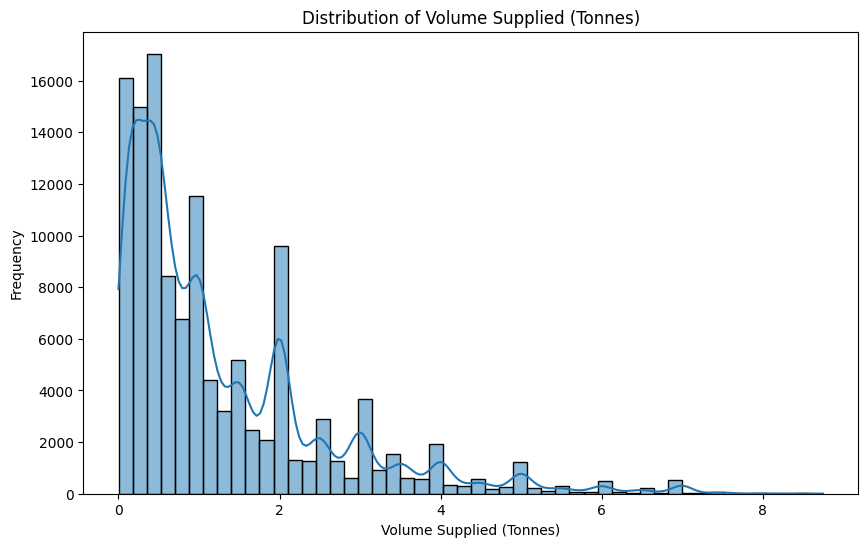

Number of outliers in volume supplied: 4498


In [120]:
# Step 1: Summary Statistics for Volumes
volume_summary = cleaned_data['volume_supplied_tonnes'].describe()
print(volume_summary)

# Step 2: Distribution Plot for Volumes
plt.figure(figsize=(10,6))
sns.histplot(cleaned_data['volume_supplied_tonnes'], bins=50, kde=True)
plt.title('Distribution of Volume Supplied (Tonnes)')
plt.xlabel('Volume Supplied (Tonnes)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Outlier Detection using IQR
Q1 = cleaned_data['volume_supplied_tonnes'].quantile(0.25)
Q3 = cleaned_data['volume_supplied_tonnes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = cleaned_data[(cleaned_data['volume_supplied_tonnes'] < lower_bound) | 
                        (cleaned_data['volume_supplied_tonnes'] > upper_bound)]

print(f"Number of outliers in volume supplied: {len(outliers)}")

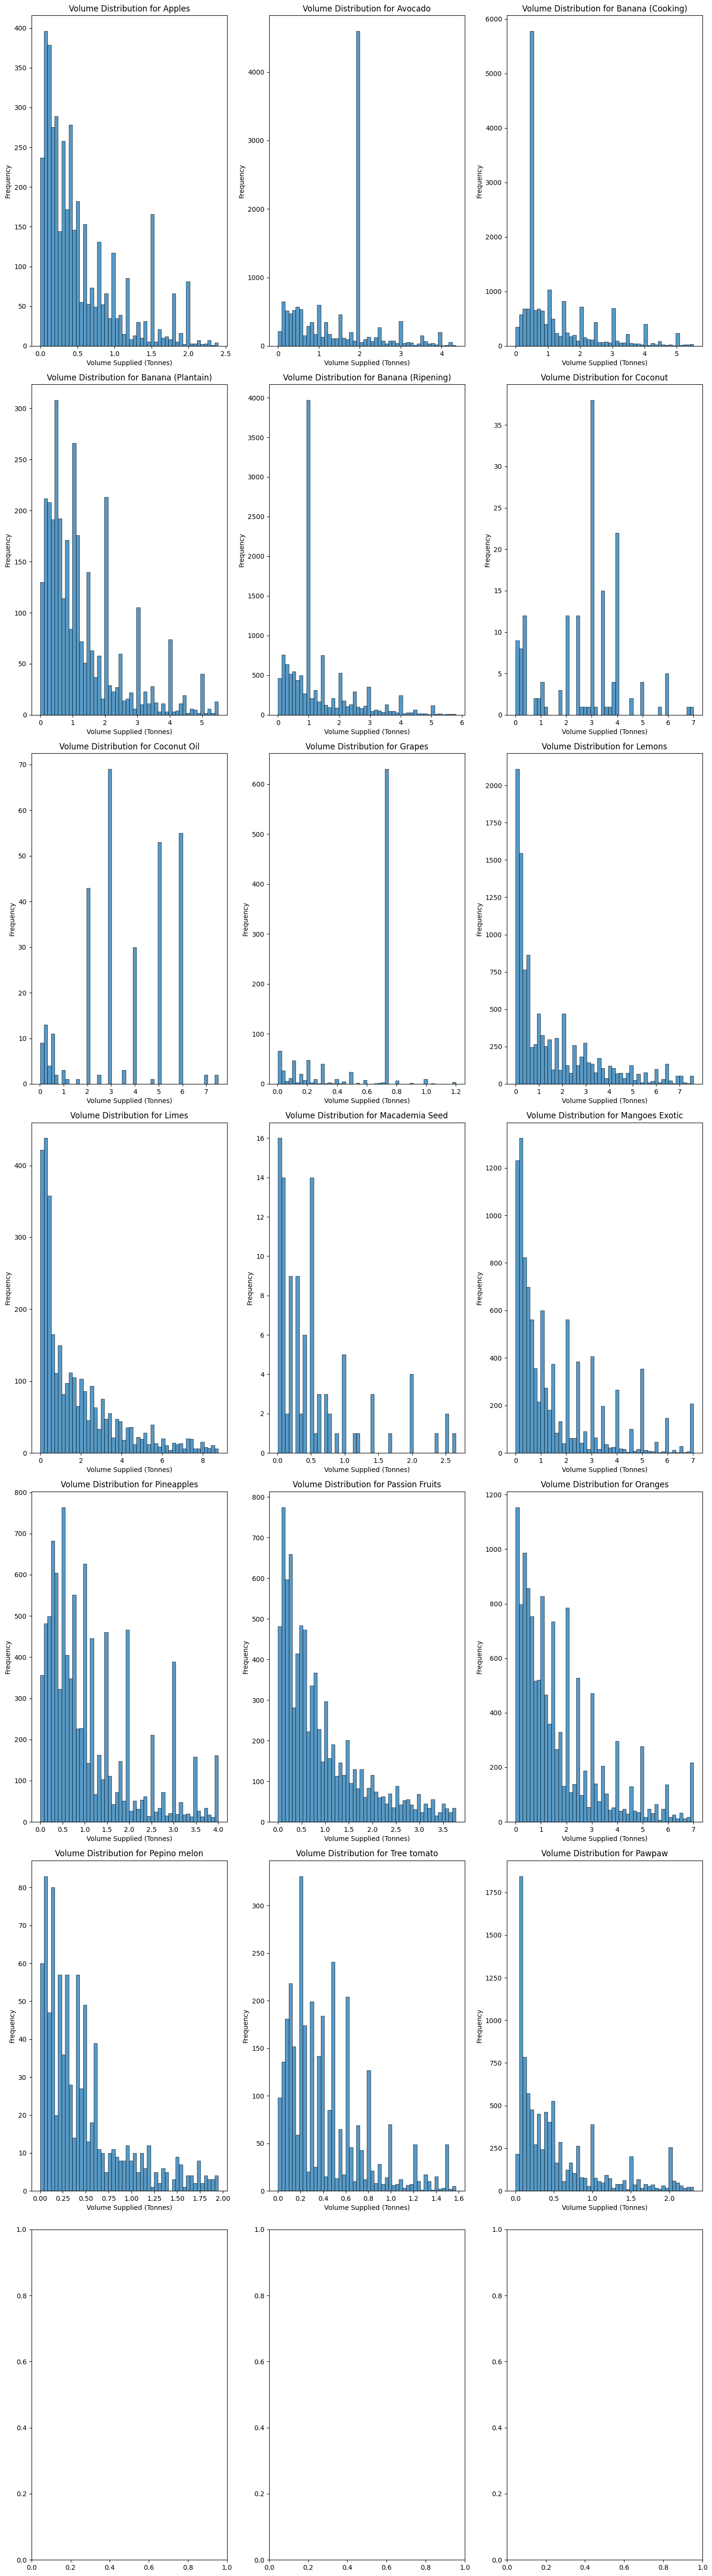

In [121]:
# List of unique commodities in the dataset
commodities = cleaned_data['commodity'].unique()

# Number of commodities
n_commodities = len(commodities)

# Set up the grid for subplots (adjust rows and columns as needed)
fig, axes = plt.subplots(nrows=(n_commodities // 3) + 1, ncols=3, figsize=(15, n_commodities * 3))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each commodity and plot on individual axes
for i, commodity in enumerate(commodities):
    subset = cleaned_data[cleaned_data['commodity'] == commodity]
    sns.histplot(subset['volume_supplied_tonnes'], bins=50, kde=False, ax=axes[i])
    axes[i].set_title(f'Volume Distribution for {commodity}')
    axes[i].set_xlabel('Volume Supplied (Tonnes)')
    axes[i].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [122]:
# Get the unique classifications and their frequencies
classification_counts = cleaned_data['classification'].value_counts()

# Display the classification counts
print(classification_counts)

classification
-             106682
Local           7552
Improved        5082
Fuerte          2410
Hass             840
Black-Dark       801
Red              193
White             11
Name: count, dtype: int64


#### Replacing Dash ('-') with 'Regular' in the Classification Column

In the dataset, the `classification` column has entries represented by a dash (`-`), which does not provide meaningful information. To improve the clarity and usefulness of this column, we will replace the dash (`-`) with the term `"Regular"`. This replacement will allow for better interpretation and analysis of the data when working with the different classifications of commodities.


In [123]:
# Replace the '-' value in the 'classification' column with 'Regular'
cleaned_data['classification'] = cleaned_data['classification'].replace('-', 'Regular')

# Verify the changes
print(cleaned_data['classification'].value_counts())

classification
Regular       106682
Local           7552
Improved        5082
Fuerte          2410
Hass             840
Black-Dark       801
Red              193
White             11
Name: count, dtype: int64


In [124]:
# Get the unique classifications and their frequencies
county_counts = cleaned_data['county'].value_counts()

# Display the classification counts
print(county_counts)

county
Nairobi            12079
Nakuru             10391
Kilifi              8287
Kirinyaga           7247
Mombasa             6460
Trans-Nzoia         5821
Siaya               5731
Kisumu              5588
Uasin-Gishu         5283
Embu                4589
Kwale               4213
Nyandarua           3780
Migori              3434
Machakos            3332
Kisii               2829
Vihiga              2691
Nyeri               2652
Tharaka-Nithi       2604
Meru                2536
Kajiado             2059
Taita-Taveta        1991
Bungoma             1988
Nandi               1982
Busia               1717
Baringo             1682
Muranga             1586
Laikipia            1183
Garissa             1078
Kakamega            1067
West-Pokot          1034
Lamu                1033
Nyamira              916
Kiambu               766
Bomet                738
Homa-bay             695
Kitui                695
Kericho              361
Elgeyo-Marakwet      315
Turkana              252
Makueni           

### 'Test' County':
We identified 158 entries in the dataset under the `county` column labeled as "test." Since "test" is not a valid county, these entries need to be removed to maintain data integrity. The code will filter out all rows where the county is "test," and then we will verify the dataset to ensure the removal has been successful.

In [125]:
# Remove rows where the county is "test"
cleaned_data = cleaned_data[cleaned_data['county'] != 'test']

# Verify the removal
county_counts_after_removal = cleaned_data['county'].value_counts()

# Display the updated county counts
print(county_counts_after_removal)

county
Nairobi            12079
Nakuru             10391
Kilifi              8287
Kirinyaga           7247
Mombasa             6460
Trans-Nzoia         5821
Siaya               5731
Kisumu              5588
Uasin-Gishu         5283
Embu                4589
Kwale               4213
Nyandarua           3780
Migori              3434
Machakos            3332
Kisii               2829
Vihiga              2691
Nyeri               2652
Tharaka-Nithi       2604
Meru                2536
Kajiado             2059
Taita-Taveta        1991
Bungoma             1988
Nandi               1982
Busia               1717
Baringo             1682
Muranga             1586
Laikipia            1183
Garissa             1078
Kakamega            1067
West-Pokot          1034
Lamu                1033
Nyamira              916
Kiambu               766
Bomet                738
Homa-bay             695
Kitui                695
Kericho              361
Elgeyo-Marakwet      315
Turkana              252
Makueni           

In [126]:
# Get the unique markets and their frequencies
market_counts = cleaned_data['market'].value_counts()

# Display the market counts
print(market_counts)

market
Nairobi Wakulima              8576
Nakuru Wakulima               7554
Kongowea                      5901
Eldoret Main                  4786
Kibuye                        4642
Malindi Old Market            4588
Kitale Municipality Market    4161
Diani Market                  3187
Embu Town                     3017
Aram                          2727
Daraja Mbili                  2207
Kagio                         1904
Gikomba                       1751
Chuka                         1731
Ngurubani Market              1709
Mtwapa                        1501
Kutus                         1445
Busia Market                  1407
Tala Centre Market            1366
Cheptulu                      1353
Gakoromone                    1338
Kiritiri                      1330
Soko mpya                     1296
Gongoni                       1295
Bondo                         1257
Eldama Ravine                 1255
Molo                          1173
Makutano Kirinyaga            1143
Garissa Soko 

---

## Introduction to Time Series Analysis for Market Trends

This time series analysis will help us uncover key insights about market trends over a period of three years (July 2021 to June 2024). The goal is to identify patterns related to commodity demand, market performance, county sales activity, and profitability. Specifically, I will explore:

1. Popular Commodities Based on Aggregated Volumes: This will highlight commodities with the highest demand, helping to understand consumer preferences.

2. Popular Markets Based on Aggregated Volumes: Understanding where the most sales activity happens provides insights into market hotspots.

3. Counties Aggregated by Market Counts: Identifying which counties have the most sales points allows us to pinpoint regions with the most market penetration.

4. Counties Aggregated by Volumes: Counties with the greatest demand, based on the volume of commodities consumed, reveal key areas of market focus.

5. Most Profitable Commodities: Calculating profitability based on the percentage difference between retail and wholesale prices will help market players understand which commodities offer the best margins.

6. Best Commodity Options with Both High Volumes and High Resell Percentages: Ideal crops for smallholder farmers will be identified based on the combination of high demand and profitability.
The next step is to aggregate the data by month and analyze each of these metrics to gain a clearer understanding of the trends.

---

### Commodity Analysis

In [130]:
# Step 1: Create a copy of the original cleaned_data to preserve the original data
data_filtered = cleaned_data.copy()

# Step 2: Ensure the 'date' column is in datetime format
data_filtered['date'] = pd.to_datetime(data_filtered['date'])

# Step 3: Filter the data to include only entries between July 1, 2021, and June 30, 2024
data_filtered = data_filtered[(data_filtered['date'] >= '2021-07-01') & (data_filtered['date'] <= '2024-06-30')]

# Step 4: Create a new column for 'year-month'
data_filtered['year_month'] = data_filtered['date'].dt.to_period('M')

# Step 5: Create a new column for quarters (Q1, Q2, Q3, Q4)
data_filtered['quarter'] = data_filtered['date'].dt.to_period('Q')

# Step 6: Aggregate by year-month, quarter, commodity, county, and market
aggregated_data = data_filtered.groupby(['year_month', 'quarter', 'commodity', 'county', 'market']).agg(
    total_volume_tonnes=('volume_supplied_tonnes', 'sum'),
    avg_wholesale_price=('wholesale_price_ksh', 'mean'),
    avg_retail_price=('retail_price_ksh', 'mean')
).reset_index()

# Step 7: Calculate the resell margin (retail - wholesale)
aggregated_data['resell_margin'] = aggregated_data['avg_retail_price'] - aggregated_data['avg_wholesale_price']

# Step 8: Calculate the percentage profit ((retail - wholesale) / wholesale * 100)
aggregated_data['percentage_profit'] = (aggregated_data['resell_margin'] / aggregated_data['avg_wholesale_price']) * 100

# Step 9: Reorder columns so the quarter column comes right after the date column
aggregated_data = aggregated_data[['year_month', 'quarter', 'commodity', 'county', 'market', 'total_volume_tonnes', 
                                   'avg_wholesale_price', 'avg_retail_price', 'resell_margin', 'percentage_profit']]

# Step 10: Round all numeric columns to 2 decimal places
aggregated_data[['total_volume_tonnes', 'avg_wholesale_price', 'avg_retail_price', 'resell_margin', 'percentage_profit']] = \
    aggregated_data[['total_volume_tonnes', 'avg_wholesale_price', 'avg_retail_price', 'resell_margin', 'percentage_profit']].round(2)

# Step 11: Convert numeric columns to string with 2 decimal places for consistent display (if needed for a specific reason)
aggregated_data['avg_retail_price'] = aggregated_data['avg_retail_price'].apply(lambda x: f"{x:.2f}")
aggregated_data['avg_wholesale_price'] = aggregated_data['avg_wholesale_price'].apply(lambda x: f"{x:.2f}")
aggregated_data['resell_margin'] = aggregated_data['resell_margin'].apply(lambda x: f"{x:.2f}")
aggregated_data['percentage_profit'] = aggregated_data['percentage_profit'].apply(lambda x: f"{x:.2f}")

# Step 12: Display the aggregated dataframe
aggregated_data.head()

year_month quarter commodity           county              market  \
0    2021-07  2021Q3    Apples          Baringo       Eldama Ravine   
1    2021-07  2021Q3    Apples          Bungoma        Bungoma town   
2    2021-07  2021Q3    Apples  Elgeyo-Marakwet            Kapsowar   
3    2021-07  2021Q3    Apples          Garissa  Garissa Soko Mugdi   
4    2021-07  2021Q3    Apples           Kisumu              Kibuye   

   total_volume_tonnes avg_wholesale_price avg_retail_price resell_margin  \
0                 0.05              148.34           200.00         51.66   
1                 0.12              271.43           360.00         88.57   
2                 0.62              148.34           200.00         51.66   
3                 6.90              148.34           200.00         51.66   
4                 2.50              148.34           200.00         51.66   

  percentage_profit  
0             34.83  
1             32.63  
2             34.83  
3             34.83  
4             34.83

In [131]:
# Aggregate by commodity and calculate total volume
popular_commodities = aggregated_data.groupby('commodity').agg(
    total_volume_tonnes=('total_volume_tonnes', 'sum')
).reset_index()

# Sort by total volume in descending order
popular_commodities = popular_commodities.sort_values(by='total_volume_tonnes', ascending=False)

# Display the commodities based on volume
print(popular_commodities)

            commodity  total_volume_tonnes
2    Banana (Cooking)             16457.69
12            Oranges             15336.43
11     Mangoes Exotic             14409.12
1             Avocado             10362.26
4   Banana (Ripening)              9857.37
16         Pineapples              8358.07
8              Lemons              5364.41
3   Banana (Plantain)              3978.46
14             Pawpaw              2827.14
13     Passion Fruits              2778.31
0              Apples              2192.95
9               Limes              2130.28
17        Tree tomato              1295.98
6         Coconut Oil              1075.09
7              Grapes               510.29
5             Coconut               428.61
15       Pepino melon               407.11
10     Macademia Seed                45.89


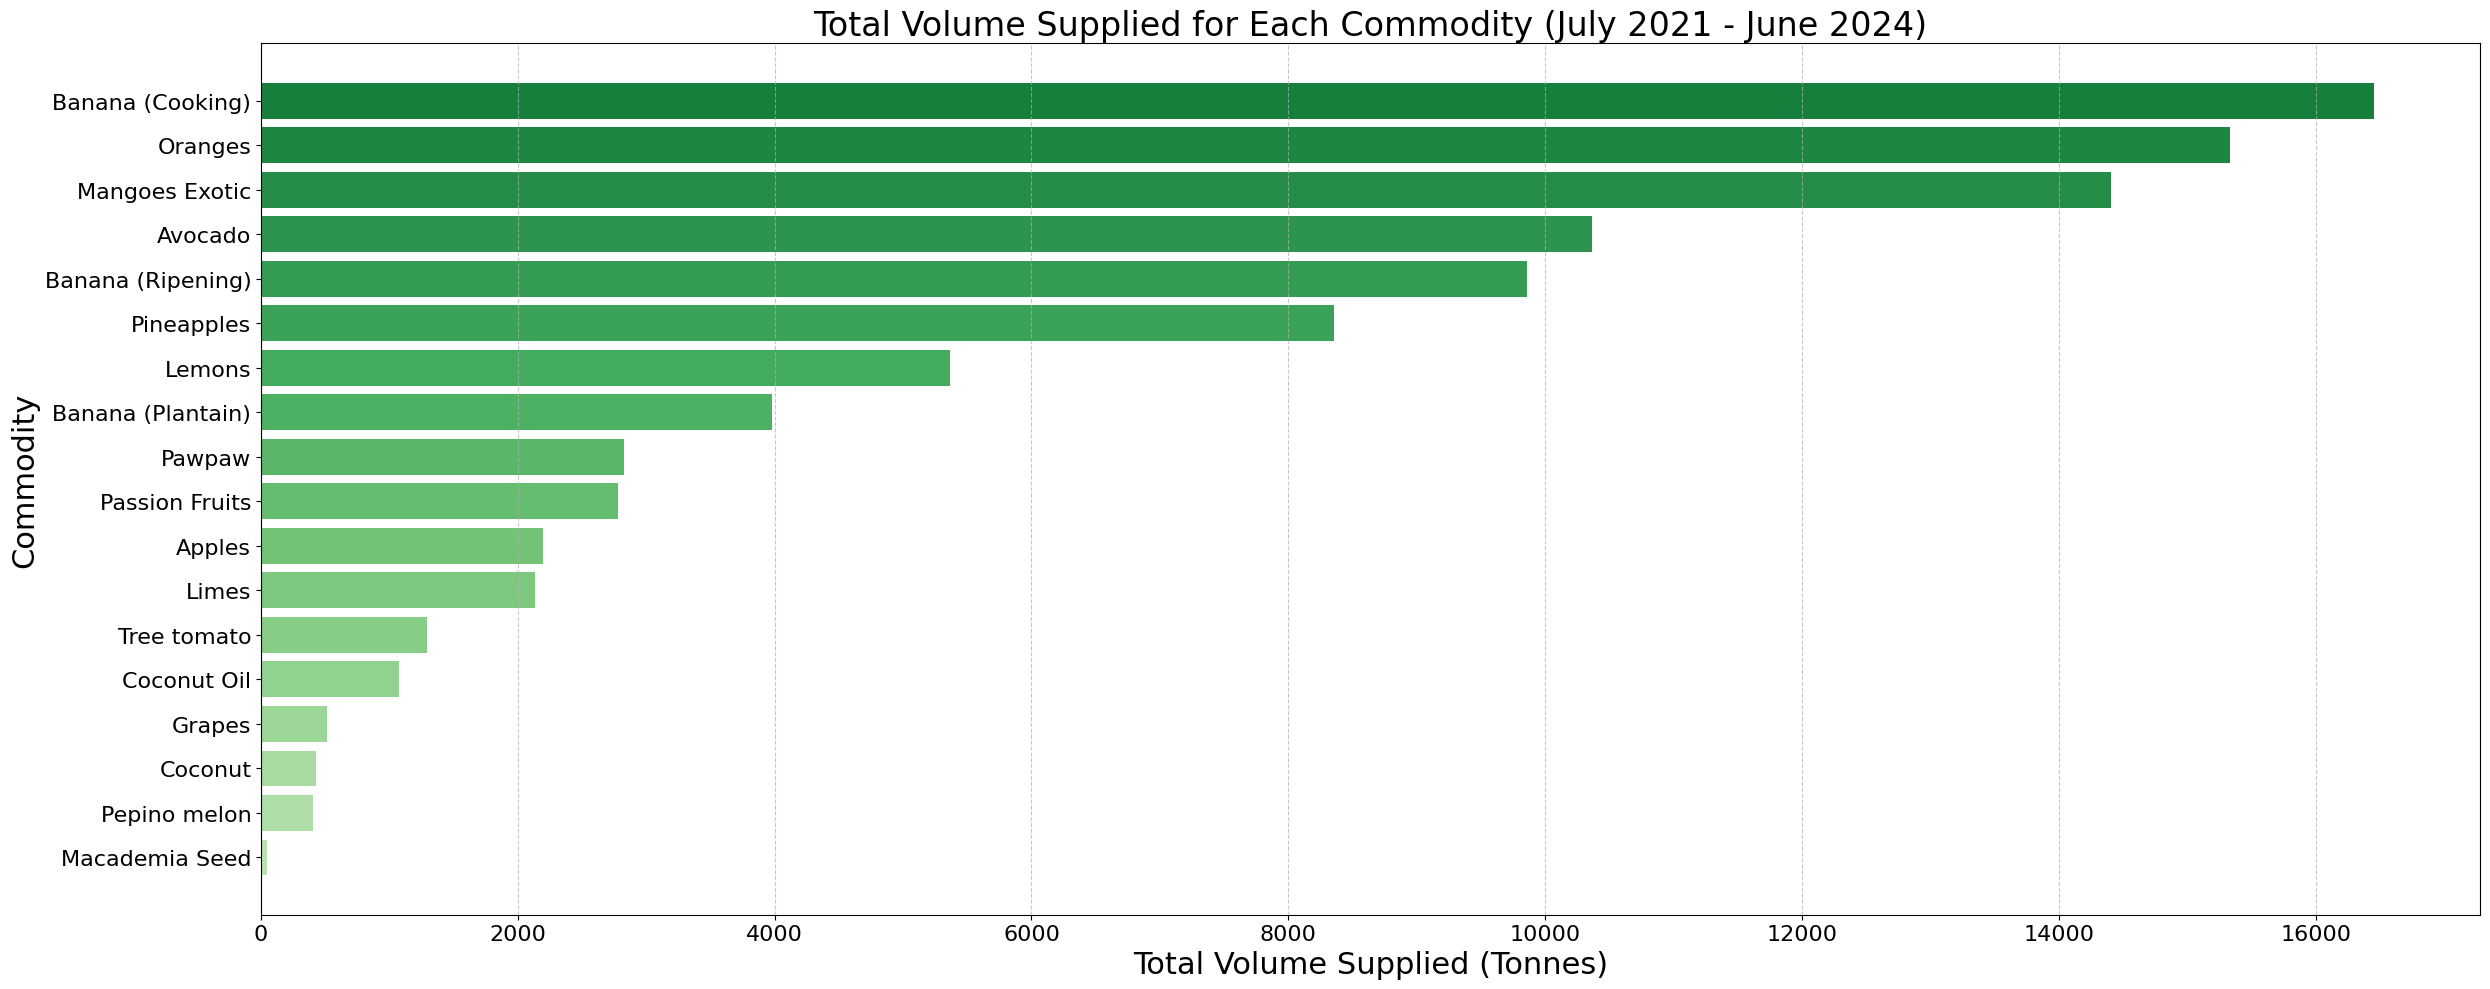

In [143]:
# Sort the commodities by total volume in descending order
popular_commodities_sorted = popular_commodities.sort_values(by='total_volume_tonnes', ascending=True)

# Step 1: Create the plot
plt.figure(figsize=(25, 10))

# Step 2: Create a green gradient color map for the bars
colors = plt.cm.Greens(np.linspace(0.3, 0.8, len(popular_commodities_sorted)))

# Step 3: Plot the bar graph in descending order using barh to ensure it plots top to bottom in the correct order
plt.barh(popular_commodities_sorted['commodity'], popular_commodities_sorted['total_volume_tonnes'], color=colors)

# Step 4: Add labels and title with increased font sizes
plt.xlabel('Total Volume Supplied (Tonnes)', fontsize=22)
plt.ylabel('Commodity', fontsize=22)
plt.title('Total Volume Supplied for Each Commodity (July 2021 - June 2024)', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Step 5: Show plot with a tight layout
plt.tight_layout()
plt.show()

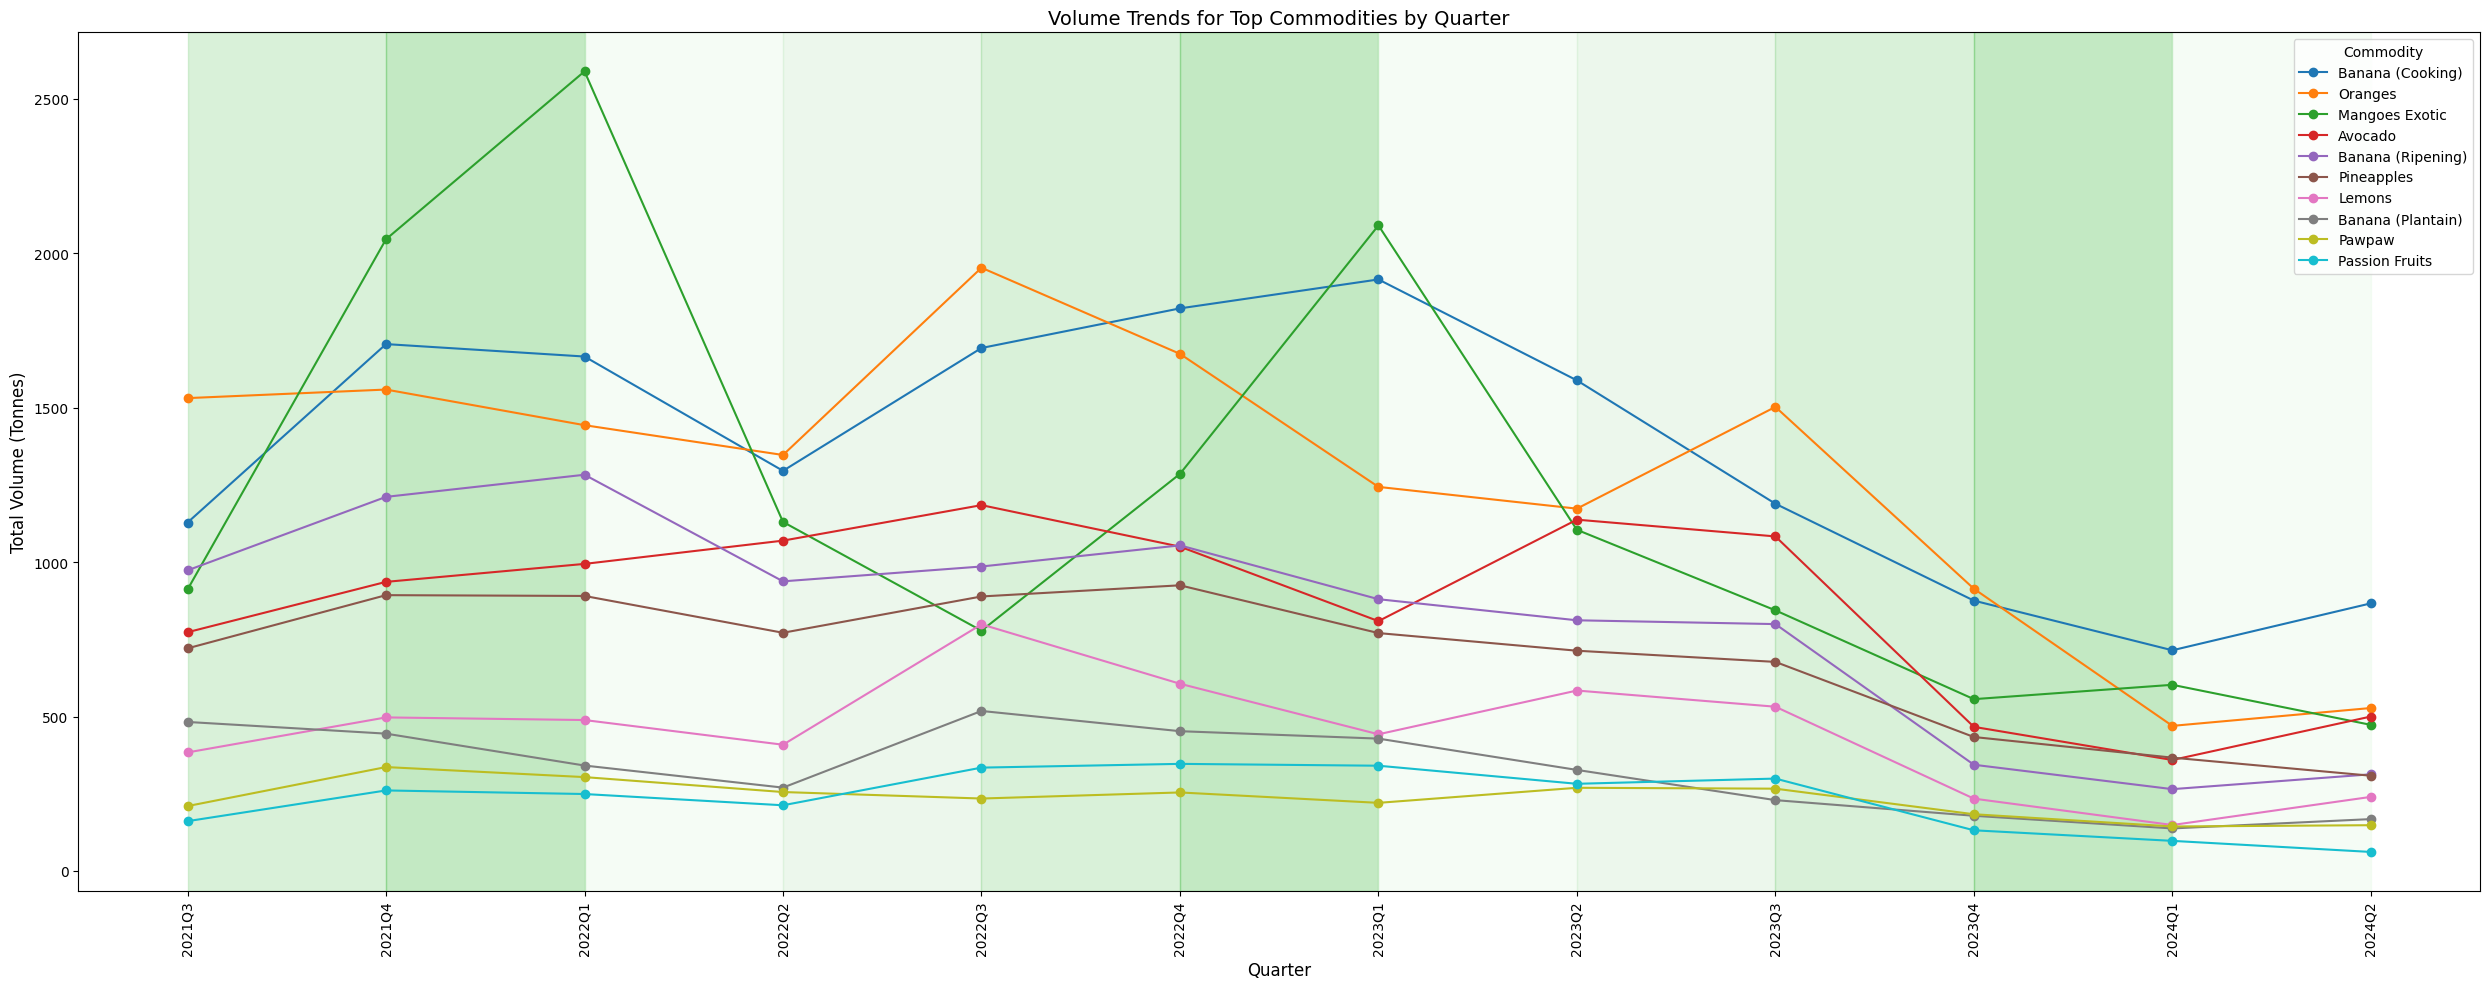

In [144]:
# Ensure the 'quarter' column is converted to a string format for plotting
aggregated_data['quarter'] = aggregated_data['quarter'].astype(str)

# Aggregate by commodity and quarter and calculate total volume for each quarter
volume_trends = aggregated_data.groupby(['quarter', 'commodity']).agg(
    total_volume_tonnes=('total_volume_tonnes', 'sum')
).reset_index()

# Define the quarters to use as labels on the x-axis
quarter_labels = sorted(volume_trends['quarter'].unique())

# Select the top 10 commodities based on total volume, sorted in descending order
top_commodities = popular_commodities.sort_values(by='total_volume_tonnes', ascending=False).head(10)['commodity']

# Filter the data to include only the top commodities
filtered_data = volume_trends[volume_trends['commodity'].isin(top_commodities)]

# Create the plot
plt.figure(figsize=(25, 10))

# Plot each commodity's trend over time
for commodity in top_commodities:
    commodity_data = filtered_data[filtered_data['commodity'] == commodity]
    plt.plot(commodity_data['quarter'], commodity_data['total_volume_tonnes'], marker='o', label=commodity)

# Define the color shades for Q1 to Q4 (light to dark green)
shading_colors = ['#e0f7e0', '#c1e7c1', '#83d183', '#39b739']  # Light to dark green

# Shade the background for each quarter with corresponding shades of green
for i, quarter in enumerate(quarter_labels[:-1]):
    if "Q1" in quarter:
        color = shading_colors[0]  # Lightest green for Q1
    elif "Q2" in quarter:
        color = shading_colors[1]  # Slightly darker green for Q2
    elif "Q3" in quarter:
        color = shading_colors[2]  # Darker green for Q3
    elif "Q4" in quarter:
        color = shading_colors[3]  # Darkest green for Q4
    
    plt.axvspan(quarter, quarter_labels[i+1], color=color, alpha=0.3)

# Set plot labels and title
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Volume (Tonnes)', fontsize=12)
plt.title('Volume Trends for Top Commodities by Quarter', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Commodity')
plt.tight_layout()
plt.show()

---

#### Findings

1. Top 5 Commodities by Volume:

Banana (Cooking): 16,457.69 tonnes

Oranges: 15,336.43 tonnes

Mangoes Exotic: 14,409.12 tonnes

Avocado: 10,362.26 tonnes

Banana (Ripening): 9,857.37 tonnes

The top 5 commodities dominate the supply chain and account for a large portion of the market.
Pineapples, Lemons, and Banana (Plantain) follow closely but are significantly lower in volume.

2. High Volume Commodities: Banana (Cooking), Oranges, Mangoes Exotic, and Avocado present significant market opportunities.

3.  Commodities: Commodities such as Pawpaw, Passion Fruits, and Apples show moderate demand and may represent growth areas.

4. Profit Margins on Top Commodities: Retailers can capitalize on high-demand crops like bananas, oranges, and mangoes, which are staples in consumer purchasing.

5. Resell Opportunities: With strong demand and consistent supply, there is room for high-volume sales and profitability for retailers stocking these commodities.

#### Insights

1. There is a high consumer preference for bananas (Cooking and Ripening) and citrus fruits like oranges and lemons, indicating that these commodities have strong demand in the market.

2. Avocados, often considered an export crop, are also showing high domestic demand, especially given its profitability in the global market.

3. There is a steep drop in volume after the top 5 commodities, suggesting a more niche market for the other commodities.

4. Market linkage players should prioritize connecting smallholder farmers producing high-demand commodities to larger markets, where demand exceeds local supply.

5.  moderate supply of emerging fruits like Passion Fruits and Pawpaw suggests untapped market opportunities.

6. Retailers need to ensure a consistent supply of these high-demand crops to capture the most significant portion of the market.

7. Seasonal fluctuations may affect supply, so retailers should plan for procurement strategies during off-peak times.

#### Recommendations

For Smallholder Farmers:

1. Focus on High-Demand Crops: Smallholder farmers should focus on cultivating bananas (both cooking and ripening) and avocados, as they show consistent high demand.

2. Diversify into Citrus Fruits: Oranges and lemons present opportunities for diversification due to their strong market presence.

3. Explore Niche Markets: Commodities like Mangoes Exotic and Pineapples are still in demand and may provide premium prices, particularly in specific markets.

For Market Linkage Players:

1. Support Aggregation of Commodities: Focus on aggregating high-volume commodities like bananas and oranges from multiple farmers to meet larger-scale demand from supermarkets and wholesalers.

2. Identify Emerging Markets: Explore markets with growing demand for niche fruits like Passion Fruits and Pawpaw to help farmers tap into premium pricing opportunities.

For Retailers:

1. Optimize Inventory for High-Demand Commodities: Ensure regular stock of top-selling commodities such as bananas and avocados to meet consumer demand.

2. Market Emerging Commodities: Retailers could differentiate themselves by marketing niche fruits like Passion Fruits and Limes, which, though lower in volume, can command premium pricing.

3. Leverage Seasonal Trends: Utilize seasonal data to anticipate fluctuations in supply and adjust inventory and pricing accordingly.

---

### Counties and Food Markets Analysis

In [146]:
# Check if 'market' column exists in the data
if 'market' in aggregated_data.columns and 'county' in aggregated_data.columns:
    # Aggregate by market and county and calculate the total volume
    popular_markets = aggregated_data.groupby(['market', 'county']).agg(
        total_volume_tonnes=('total_volume_tonnes', 'sum')
    ).reset_index()

    # Sort by total volume in descending order
    popular_markets = popular_markets.sort_values(by='total_volume_tonnes', ascending=False)

    # Display the top 20 markets based on volume
    top_20_markets = popular_markets.head(20)

    # Display the bottom 20 markets based on volume
    bottom_20_markets = popular_markets.tail(20)

    # Display the results
    print("Top 20 Markets by Aggregated Volume:")
    print(top_20_markets)

    print("\nBottom 20 Markets by Aggregated Volume:")
    print(bottom_20_markets)
else:
    print("The 'market' or 'county' column does not exist in the data.")


Top 20 Markets by Aggregated Volume:
                         market       county  total_volume_tonnes
27                 Diani Market        Kwale              5018.67
111  Kitale Municipality Market  Trans-Nzoia              4359.73
4                          Aram        Siaya              3016.61
170            Nairobi Wakulima      Nairobi              2969.08
173             Nakuru Wakulima       Nakuru              2893.49
32                    Embu Town         Embu              2853.03
10                        Bondo        Siaya              2565.43
29                 Eldoret Main  Uasin-Gishu              2549.20
107                    Kiritiri         Embu              2473.53
41                      Gikomba      Nairobi              2200.79
218          Tala Centre Market     Machakos              2155.01
60                        Kagio    Kirinyaga              2037.96
182            Ngurubani Market    Kirinyaga              1709.38
199                       Rongo       M

In [147]:
# Check if 'county' column exists
if 'county' in aggregated_data.columns and 'market' in aggregated_data.columns:
    # Aggregate by county and calculate the total volume and number of markets
    aggregated_by_county = aggregated_data.groupby('county').agg(
        number_of_markets=('market', 'nunique'),   # Count unique markets in each county
        total_volume_tonnes=('total_volume_tonnes', 'sum')  # Sum total volume per county
    ).reset_index()

    # Sort by total volume in descending order
    aggregated_by_county = aggregated_by_county.sort_values(by='total_volume_tonnes', ascending=False)

    # Display the results
    print("Aggregated Volume by County:")
    print(aggregated_by_county)
else:
    print("The 'county' or 'market' column does not exist in the data.")

Aggregated Volume by County:
             county  number_of_markets  total_volume_tonnes
36            Siaya                  5              7691.33
28          Nairobi                  4              7244.39
14        Kirinyaga                  5              6575.31
40      Trans-Nzoia                  7              6065.24
18            Kwale                  6              6034.76
29           Nakuru                  6              5662.28
5              Embu                  5              5442.18
25           Migori                  7              4432.34
21         Machakos                  4              3793.30
30            Nandi                  6              3528.64
33        Nyandarua                  5              3472.97
42      Uasin-Gishu                  6              3167.84
13           Kilifi                  5              3149.06
43           Vihiga                  6              2518.66
34            Nyeri                  5              2266.47
2          

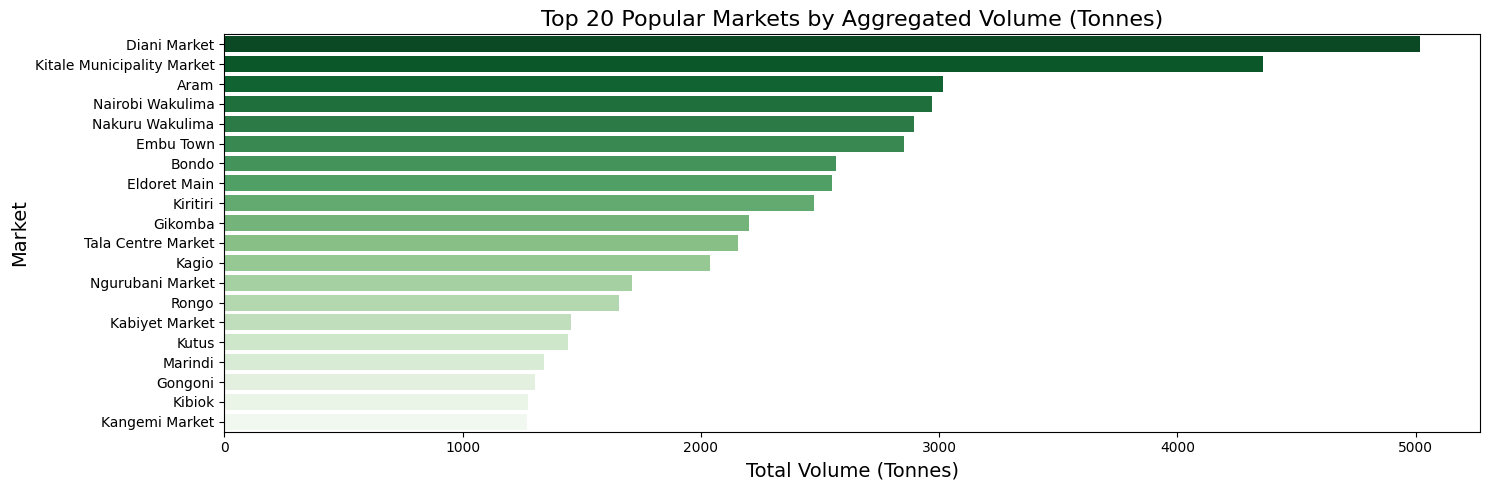

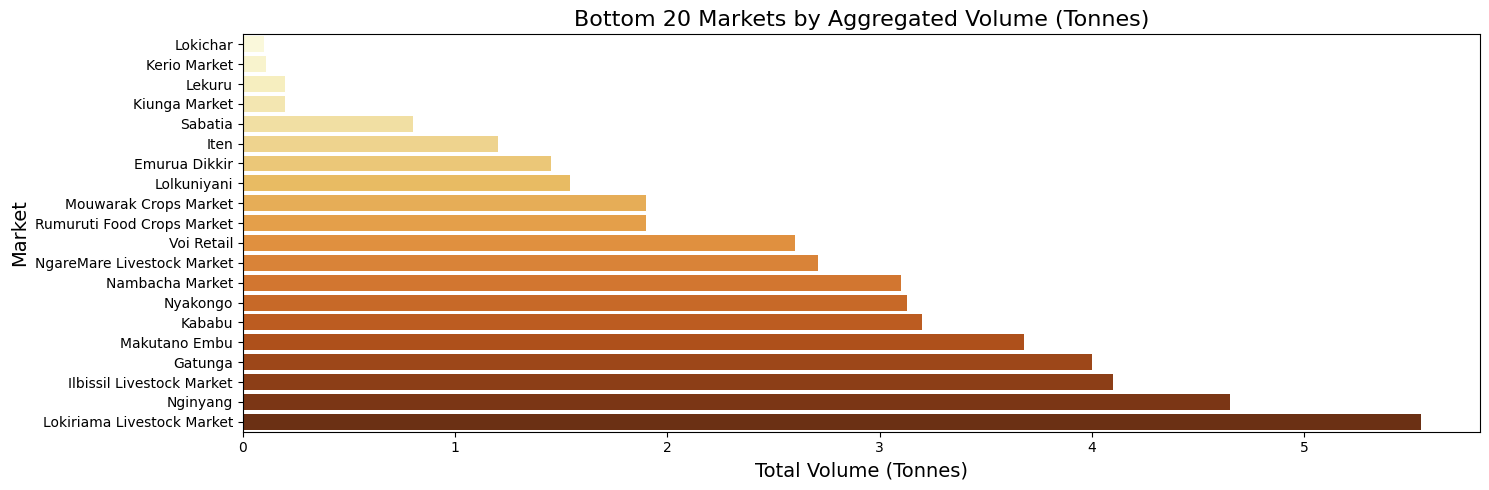

In [148]:
# Plotting top 20 popular markets by volume with a smooth green gradient
plt.figure(figsize=(15, 5))
# Create a sorted order for the gradient color based on volume
if not top_20_markets.empty:
    top_20_markets_sorted = top_20_markets.sort_values(by='total_volume_tonnes', ascending=False)
    sns.barplot(data=top_20_markets_sorted, x='total_volume_tonnes', y='market', palette='Greens_r')  # Reverse for smooth gradient
    plt.title('Top 20 Popular Markets by Aggregated Volume (Tonnes)', fontsize=16)
    plt.xlabel('Total Volume (Tonnes)', fontsize=14)
    plt.ylabel('Market', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for top 20 markets.")

# Plotting bottom 20 least popular markets by volume with a smooth mustard gradient
plt.figure(figsize=(15, 5))
# Create a sorted order for the gradient color based on volume
if not bottom_20_markets.empty:
    bottom_20_markets_sorted = bottom_20_markets.sort_values(by='total_volume_tonnes', ascending=True)
    sns.barplot(data=bottom_20_markets_sorted, x='total_volume_tonnes', y='market', palette='YlOrBr')  # Mustard gradient
    plt.title('Bottom 20 Markets by Aggregated Volume (Tonnes)', fontsize=16)
    plt.xlabel('Total Volume (Tonnes)', fontsize=14)
    plt.ylabel('Market', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for bottom 20 markets.")

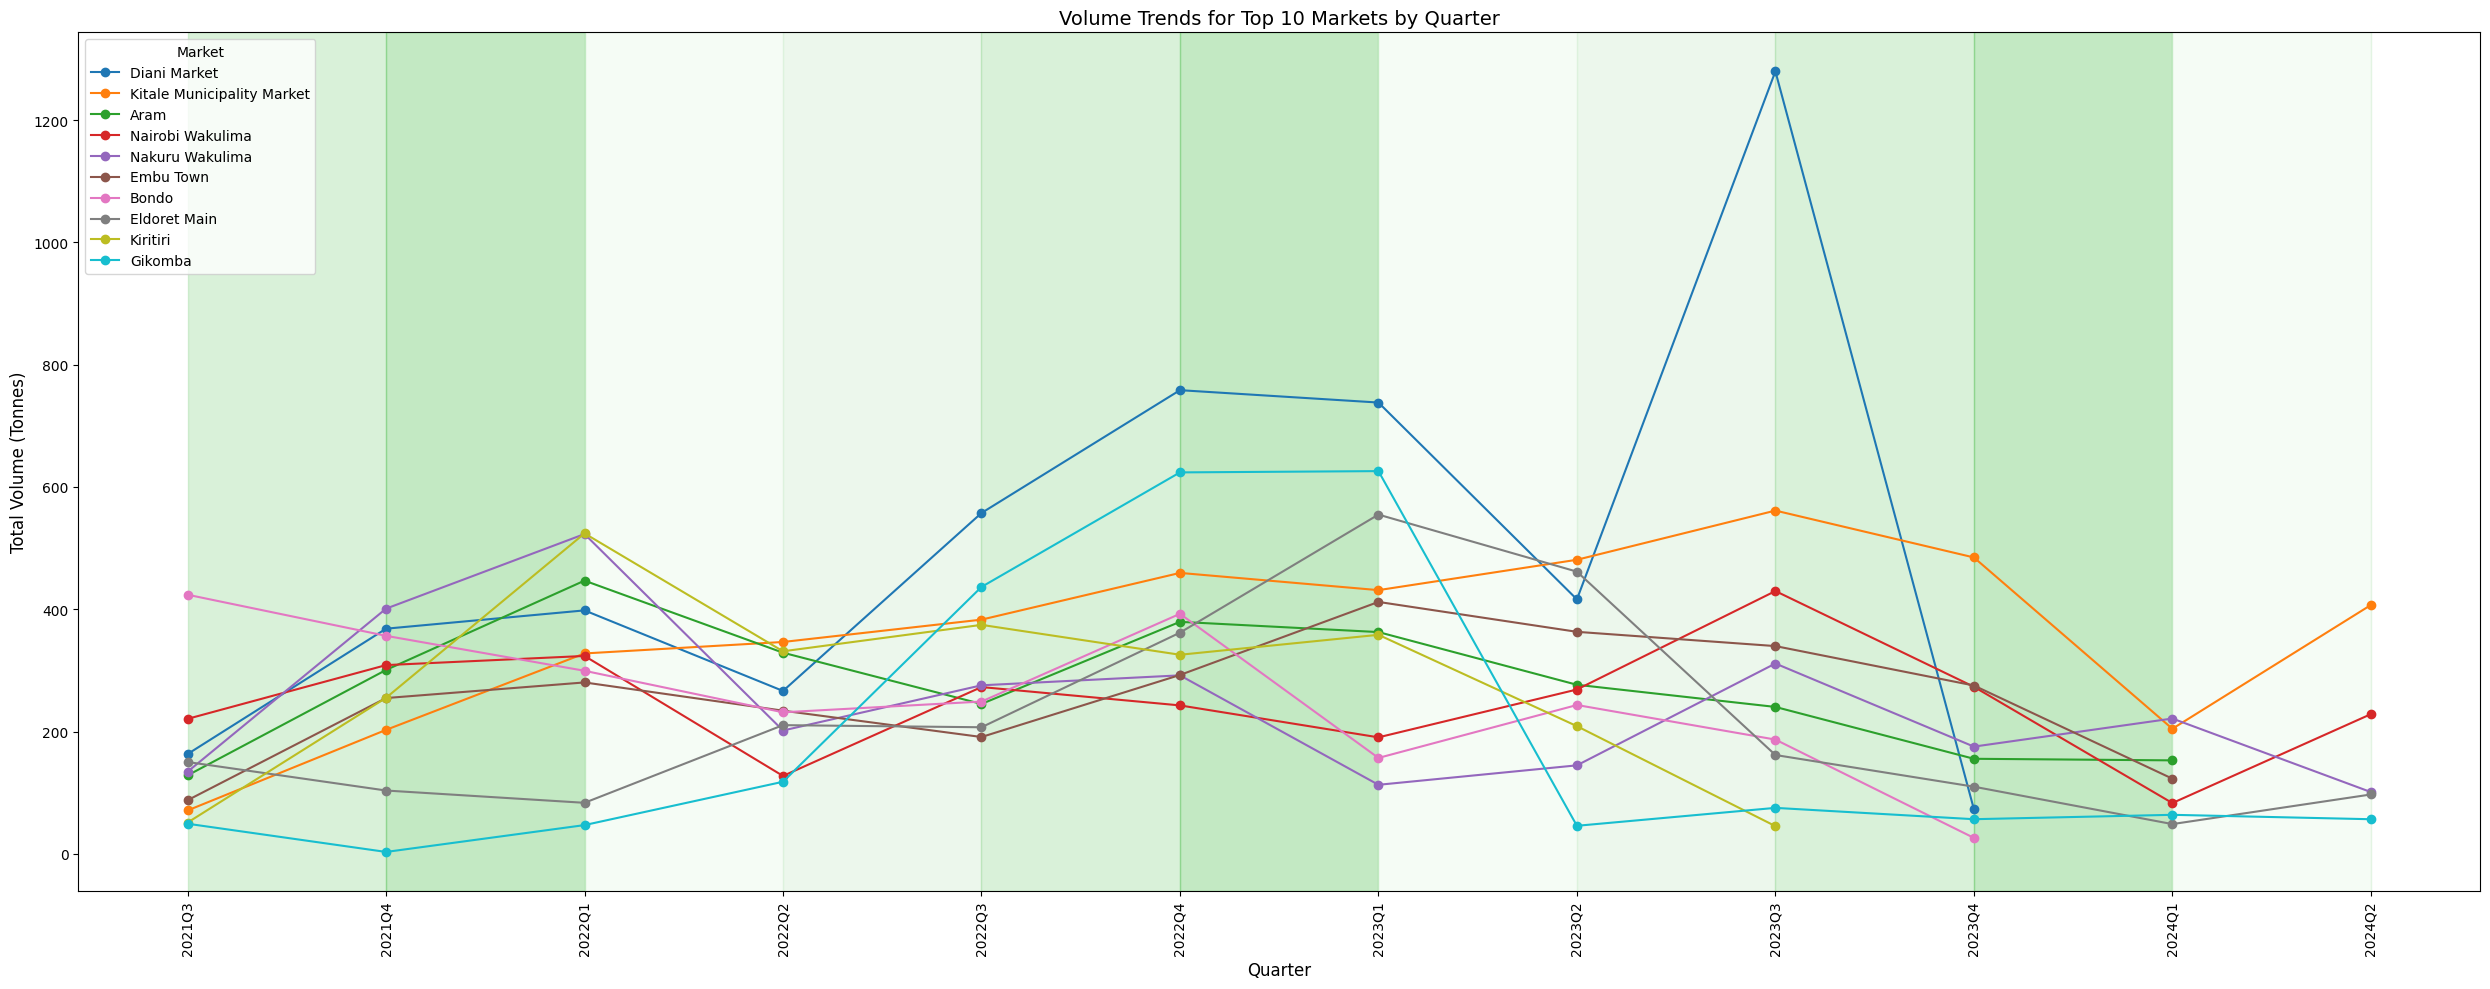

In [149]:
# Ensure the 'quarter' column is converted to a string format for plotting
aggregated_data['quarter'] = aggregated_data['quarter'].astype(str)

# Aggregate by market and quarter and calculate total volume for each quarter
market_volume_trends = aggregated_data.groupby(['quarter', 'market']).agg(
    total_volume_tonnes=('total_volume_tonnes', 'sum')
).reset_index()

# Define the quarters to use as labels on the x-axis
quarter_labels = sorted(market_volume_trends['quarter'].unique())

# Select the top 10 markets based on total volume
top_10_markets = top_20_markets_sorted.head(10)['market']

# Filter the data to include only the top markets
filtered_market_data = market_volume_trends[market_volume_trends['market'].isin(top_10_markets)]

# Create the plot
plt.figure(figsize=(25, 10))

# Plot each market's trend over time
for market in top_10_markets:
    market_data = filtered_market_data[filtered_market_data['market'] == market]
    plt.plot(market_data['quarter'], market_data['total_volume_tonnes'], marker='o', label=market)

# Define the color shades for Q1 to Q4 (light to dark green)
shading_colors = ['#e0f7e0', '#c1e7c1', '#83d183', '#39b739']  # Light to dark green

# Shade the background for each quarter with corresponding shades of green
for i, quarter in enumerate(quarter_labels):
    if "Q1" in quarter:
        color = shading_colors[0]  # Lightest green for Q1
    elif "Q2" in quarter:
        color = shading_colors[1]  # Slightly darker green for Q2
    elif "Q3" in quarter:
        color = shading_colors[2]  # Darker green for Q3
    elif "Q4" in quarter:
        color = shading_colors[3]  # Darkest green for Q4
    
    plt.axvspan(quarter, quarter_labels[i+1] if i+1 < len(quarter_labels) else quarter, 
                color=color, alpha=0.3)

# Set plot labels and title
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Volume (Tonnes)', fontsize=12)
plt.title('Volume Trends for Top 10 Markets by Quarter', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Market')
plt.tight_layout()
plt.show()

---

#### Findings

##### Top 20 Markets by Aggregated Volume:

1. **Diani Market (Kwale)** recorded the highest volume with over 5,000 tonnes.

2. **Kitale Municipality Market (Trans-Nzoia)** follows closely with 4,359 tonnes.

3. **Nairobi Wakulima Market** and **Nakuru Wakulima Market** also feature among the top 5 markets with substantial volumes.

4. Markets such as **Aram (Siaya)**, **Embu Town (Embu)**, and **Bondo (Siaya)** are prominent players in terms of volume.

5. Notably, many markets in Nairobi, Embu, and Kirinyaga counties dominate the top rankings.

6. **Kangemi Market** (Nairobi) is included in the top 20, emphasizing Nairobi's significant market presence.

#### Bottom 20 Markets by Aggregated Volume:

1. **Lokiriama Livestock Market (Turkana)** is the market with the lowest volume, with just over 5 tonnes supplied.

2. Markets such as **Nginyang (Baringo)** and **Ilbissil Livestock Market (Kajiado)** have very low market activity.

3. These markets generally represent rural or remote areas with significantly lower trading volumes.

#### Aggregated Volume by County:

1. **Siaya County** ranks first with the highest total volume of over 7,691 tonnes, driven by markets such as Aram and Bondo.

2. **Nairobi County**, with markets such as Wakulima and Kangemi, follows closely with 7,244 tonnes.

3. **Kirinyaga County** also performs well, with 6,575 tonnes from markets like Kagio and Ngurubani.

4. **Trans-Nzoia, Kwale, and Nakuru Counties** also feature prominently, driven by strong market activity.

5. On the lower end, **Samburu**, **Wajir**, and **Narok** counties have significantly lower aggregated volumes.

#### Insights

1. **Urban Market Dominance**: Larger urban centers such as Nairobi, Nakuru, and Kitale host markets that move significant volumes. This suggests higher demand in more urbanized regions, likely driven by larger populations and higher purchasing power.

2. **Coastal Market Strength**: Markets like Diani in **Kwale County** and Gongoni in **Kilifi County** demonstrate strong performance, indicating high market activity in the coastal region, potentially driven by both local demand and tourism.

3. **Significant Variability**: There is a sharp contrast between the top markets, which move thousands of tonnes, and smaller, more rural markets which only move a few tonnes. This highlights market access and infrastructure challenges in remote areas.

4. **County Trends**: Siaya, Nairobi, Kirinyaga, and Trans-Nzoia counties consistently show higher market activity. Siaya stands out, with multiple markets such as Aram and Bondo driving substantial trade volumes.

5. **Rural Market Limitations**: Counties such as Turkana, Samburu, and Wajir have very low market activity, signaling either lower demand, logistical challenges, or lack of access to markets.

#### Recommendations

##### For Smallholder Farmers:

1. **Focus on High-Volume Markets**: Farmers should aim to link with top-performing markets such as Diani, Kitale, and Nairobi Wakulima, where demand is consistently high. This will ensure better access to customers and potentially higher prices.

2. **Explore Coastal Markets**: For farmers in coastal regions, markets like Diani and Gongoni present promising opportunities for both high demand and proximity to supply chains.

##### For Market Linkage Players:

1. **Strengthen Supply Chains in Top Counties**: Enhance logistics and supply chain infrastructure in counties like Siaya, Nairobi, and Kirinyaga to ensure continuous and efficient flow of goods to markets.

2. **Invest in Underperforming Markets**: Efforts to develop rural and low-performing markets such as Lokiriama, Nginyang, and Ilbissil can help boost trade in these areas, improving food security and market access.

##### For Retailers:

1. **Capitalize on Urban Demand**: Retailers should focus their operations in high-demand markets such as Nairobi Wakulima and Kitale Municipality to benefit from higher trade volumes and consistent demand.

2. **Monitor Market Trends**: The trend analysis shows that markets like Diani and Kitale have shown consistent volume trends. Retailers should use this information to better manage inventory and supplies to meet seasonal demand.

---

### Price and Profit Analysis

In [153]:
# Step 3: Most Profitable Commodities with Average Wholesale and Retail Prices

# Ensure the wholesale and retail price columns are converted to numeric values
aggregated_data['avg_retail_price'] = pd.to_numeric(aggregated_data['avg_retail_price'], errors='coerce')
aggregated_data['avg_wholesale_price'] = pd.to_numeric(aggregated_data['avg_wholesale_price'], errors='coerce')

# Calculate resell margin and percentage profit
aggregated_data['resell_margin'] = aggregated_data['avg_retail_price'] - aggregated_data['avg_wholesale_price']
aggregated_data['percentage_profit'] = (aggregated_data['resell_margin'] / aggregated_data['avg_wholesale_price']) * 100

# Group by commodity and calculate average resell margin, percentage profit, and prices
profitable_commodities = aggregated_data.groupby('commodity').agg(
    avg_wholesale_price=('avg_wholesale_price', 'mean'),
    avg_retail_price=('avg_retail_price', 'mean'),
    avg_resell_margin=('resell_margin', 'mean'),
    avg_percentage_profit=('percentage_profit', 'mean')
).reset_index()

# Sort by percentage profit in descending order to find the most profitable commodities
most_profitable_commodities = profitable_commodities.sort_values(by='avg_percentage_profit', ascending=False)

# Display the most profitable commodities
most_profitable_commodities

commodity  avg_wholesale_price  avg_retail_price  \
2    Banana (Cooking)            29.698335         57.948941   
1             Avocado            37.011074         66.500256   
4   Banana (Ripening)            38.279518         67.468784   
10     Macademia Seed            72.624444        123.381333   
11     Mangoes Exotic            43.738724         74.135636   
12            Oranges            45.811528         79.510050   
14             Pawpaw            48.388020         82.311404   
7              Grapes           191.176068        300.545186   
13     Passion Fruits           102.553903        161.636217   
15       Pepino melon            58.702532         97.044249   
3   Banana (Plantain)            39.699892         63.408137   
8              Lemons            57.812224         92.766565   
9               Limes            62.543040         98.966583   
17        Tree tomato            83.223841        121.198950   
16         Pineapples            57.940556         83.738893   
6         Coconut Oil            58.161897         83.039828   
5             Coconut           105.324516        145.718387   
0              Apples           211.353909        279.113991   

    avg_resell_margin  avg_percentage_profit  
2           28.250606             118.796449  
1           29.489181              99.374448  
4           29.189265              93.681636  
10          50.756889              86.842722  
11          30.396912              86.790806  
12          33.698521              83.681135  
14          33.923384              81.713094  
7          109.369119              81.127885  
13          59.082314              81.030797  
15          38.341717              79.168707  
3           23.708245              77.778053  
8           34.954341              77.698816  
9           36.423543              66.357351  
17          37.975109              51.103459  
16          25.798338              46.615145  
6           24.877931              44.955960  
5           40.393871              36.957790  
0           67.760082              34.657387

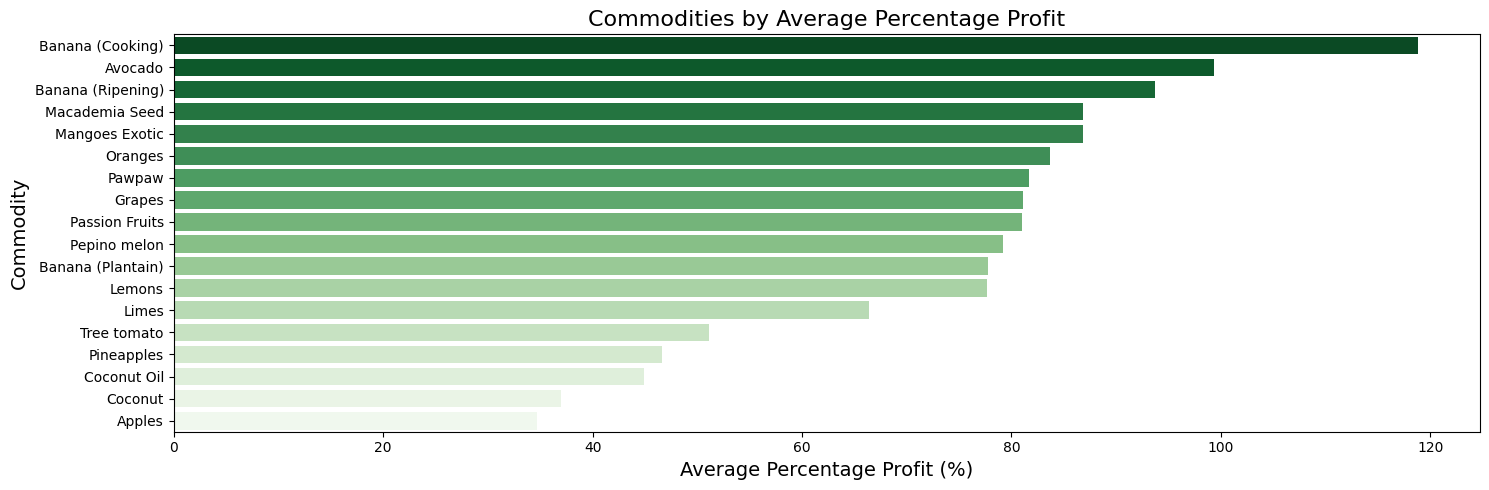

In [154]:
# Plotting all commodities with a smooth gradient based on their profitability
plt.figure(figsize=(15, 5))
sns.barplot(data=most_profitable_commodities, x='avg_percentage_profit', y='commodity', palette='Greens_r')
plt.title('Commodities by Average Percentage Profit', fontsize=16)
plt.xlabel('Average Percentage Profit (%)', fontsize=14)
plt.ylabel('Commodity', fontsize=14)
plt.tight_layout()
plt.show()

---

### Findings

1. **Top Profitable Commodities**:
   
   - **Banana (Cooking)** is the most profitable commodity with an average percentage profit of **118.80%**, followed by **Avocado** at **99.37%**, and **Banana (Ripening)** at **93.68%**.
   
   - **Macademia Seed**, **Mangoes Exotic**, and **Oranges** also show strong profitability, with percentage profits of **86.84%**, **86.79%**, and **83.68%**, respectively.
   
   - Commodities like **Grapes** and **Passion Fruits** are priced higher with relatively strong profit margins (**81.13%** and **81.03%**).

2. **Moderate Profits**:
   
   - **Pepino Melon**, **Banana (Plantain)**, and **Lemons** also have moderate profits, with percentage profits ranging from **77.78%** to **79.17%**.
   
   - **Limes**, though priced moderately, has a profit margin of **66.36%**, still presenting an attractive profitability rate.

3. **Lower Profit Commodities**:
   
   - Commodities like **Pineapples**, **Coconut Oil**, **Coconuts**, and **Apples** have the lowest profit margins. For instance, **Pineapples** show only **46.61%** profit, and **Apples** have a profit margin of **34.66%**.
   
   - Despite high retail prices, **Apples** and **Coconuts** do not show as high profitability, suggesting that their wholesale prices are also quite high, eating into the margins.

### Insights

1. **Bananas (Cooking, Ripening, and Plantain)** continue to be strong commodities in both volume and profitability, making them favorable for farmers and market players.

2. **Avocado** presents a balance of moderate pricing and high profitability, making it a favorable commodity for farmers to focus on during the right seasons.

3. **High-end commodities like Macadamia Seed, Mangoes Exotic, Grapes, and Passion Fruits** provide great profitability but are likely more niche, appealing to certain market segments due to higher average retail prices.

4. **Limes and Lemons**, despite their lower pricing compared to other fruits, maintain solid profitability, making them reliable commodities for consistent returns.

5. Commodities like **Apples** and **Coconuts**, despite their higher retail prices, show lower profit margins, suggesting market challenges or high wholesale costs, leading to smaller resell margins.

### Recommendations

1. **Smallholder Farmers**:
   
   - Focus on **Banana (Cooking, Ripening)**, and **Avocado** as they present the highest profitability with relatively stable demand and pricing across regions.
   
   - **Lemons and Limes** offer moderate profitability and can be reliable commodities, especially for farmers with limited capital to invest in high-end products like Macadamia Seeds or Grapes.
   
   - Consider growing **Macadamia Seed** and **Mangoes Exotic** if the target market allows for premium pricing and profitability.

2. **Market Linkage Players**:
   
   - Prioritize connecting farmers to buyers for high-profit commodities like **Avocados** and **Bananas**. These commodities offer a balance of affordability and high demand.
   
   - Ensure market access for niche products like **Macadamia Seed** and **Grapes**, especially in areas where consumers are willing to pay a premium for these commodities.
   
   - Support farmers cultivating **Lemons** and **Limes**, as these commodities have shown steady profitability.

3. **Retailers**:
   
   - Stock up on **Bananas**, **Avocados**, and **Mangoes Exotic** as they offer a favorable balance of profitability and consumer demand.
   
   - Target niche markets for premium commodities like **Macadamia Seeds** and **Passion Fruits**, which have higher retail prices and strong profit margins.
   
   - Watch out for commodities like **Apples** and **Coconuts**, which, despite their higher retail prices, might not provide the same profitability compared to other products. Ensure to negotiate better wholesale pricing for these commodities.

These findings and insights help guide decision-makers in identifying the best commodities to grow, market, and sell, while maximizing profitability across the value chain.

---


I now want to introduce a scoring system to rank commodities based on combined levels of demand and profit.

In [155]:
# Step 1: Rank commodities by total volume
popular_commodities['volume_rank'] = popular_commodities['total_volume_tonnes'].rank(ascending=False)

# Step 2: Rank commodities by average percentage profit
most_profitable_commodities['profit_rank'] = most_profitable_commodities['avg_percentage_profit'].rank(ascending=False)

# Step 3: Merge both rankings into a single dataframe
# Make sure we merge only on the 'commodity' column
ranked_commodities = pd.merge(popular_commodities, most_profitable_commodities, on='commodity')

# Step 4: Calculate combined rank score (lower score is better)
ranked_commodities['combined_score'] = (ranked_commodities['volume_rank'] + ranked_commodities['profit_rank']) / 2

# Step 5: Sort by the combined score
ranked_commodities = ranked_commodities.sort_values(by='combined_score')

# Display the ranked commodities with their scores
print("Commodity ranking based on volumes and profit margins:")
ranked_commodities


Commodity ranking based on volumes and profit margins:


commodity  total_volume_tonnes  volume_rank  avg_wholesale_price  \
0    Banana (Cooking)             16457.69          1.0            29.698335   
3             Avocado             10362.26          4.0            37.011074   
1             Oranges             15336.43          2.0            45.811528   
2      Mangoes Exotic             14409.12          3.0            43.738724   
4   Banana (Ripening)              9857.37          5.0            38.279518   
8              Pawpaw              2827.14          9.0            48.388020   
6              Lemons              5364.41          7.0            57.812224   
7   Banana (Plantain)              3978.46          8.0            39.699892   
9      Passion Fruits              2778.31         10.0           102.553903   
5          Pineapples              8358.07          6.0            57.940556   
17     Macademia Seed                45.89         18.0            72.624444   
14             Grapes               510.29         15.0           191.176068   
11              Limes              2130.28         12.0            62.543040   
16       Pepino melon               407.11         17.0            58.702532   
12        Tree tomato              1295.98         13.0            83.223841   
10             Apples              2192.95         11.0           211.353909   
13        Coconut Oil              1075.09         14.0            58.161897   
15            Coconut               428.61         16.0           105.324516   

    avg_retail_price  avg_resell_margin  avg_percentage_profit  profit_rank  \
0          57.948941          28.250606             118.796449          1.0   
3          66.500256          29.489181              99.374448          2.0   
1          79.510050          33.698521              83.681135          6.0   
2          74.135636          30.396912              86.790806          5.0   
4          67.468784          29.189265              93.681636          3.0   
8          82.311404          33.923384              81.713094          7.0   
6          92.766565          34.954341              77.698816         12.0   
7          63.408137          23.708245              77.778053         11.0   
9         161.636217          59.082314              81.030797          9.0   
5          83.738893          25.798338              46.615145         15.0   
17        123.381333          50.756889              86.842722          4.0   
14        300.545186         109.369119              81.127885          8.0   
11         98.966583          36.423543              66.357351         13.0   
16         97.044249          38.341717              79.168707         10.0   
12        121.198950          37.975109              51.103459         14.0   
10        279.113991          67.760082              34.657387         18.0   
13         83.039828          24.877931              44.955960         16.0   
15        145.718387          40.393871              36.957790         17.0   

    combined_score  
0              1.0  
3              3.0  
1              4.0  
2              4.0  
4              4.0  
8              8.0  
6              9.5  
7              9.5  
9              9.5  
5             10.5  
17            11.0  
14            11.5  
11            12.5  
16            13.5  
12            13.5  
10            14.5  
13            15.0  
15            16.5

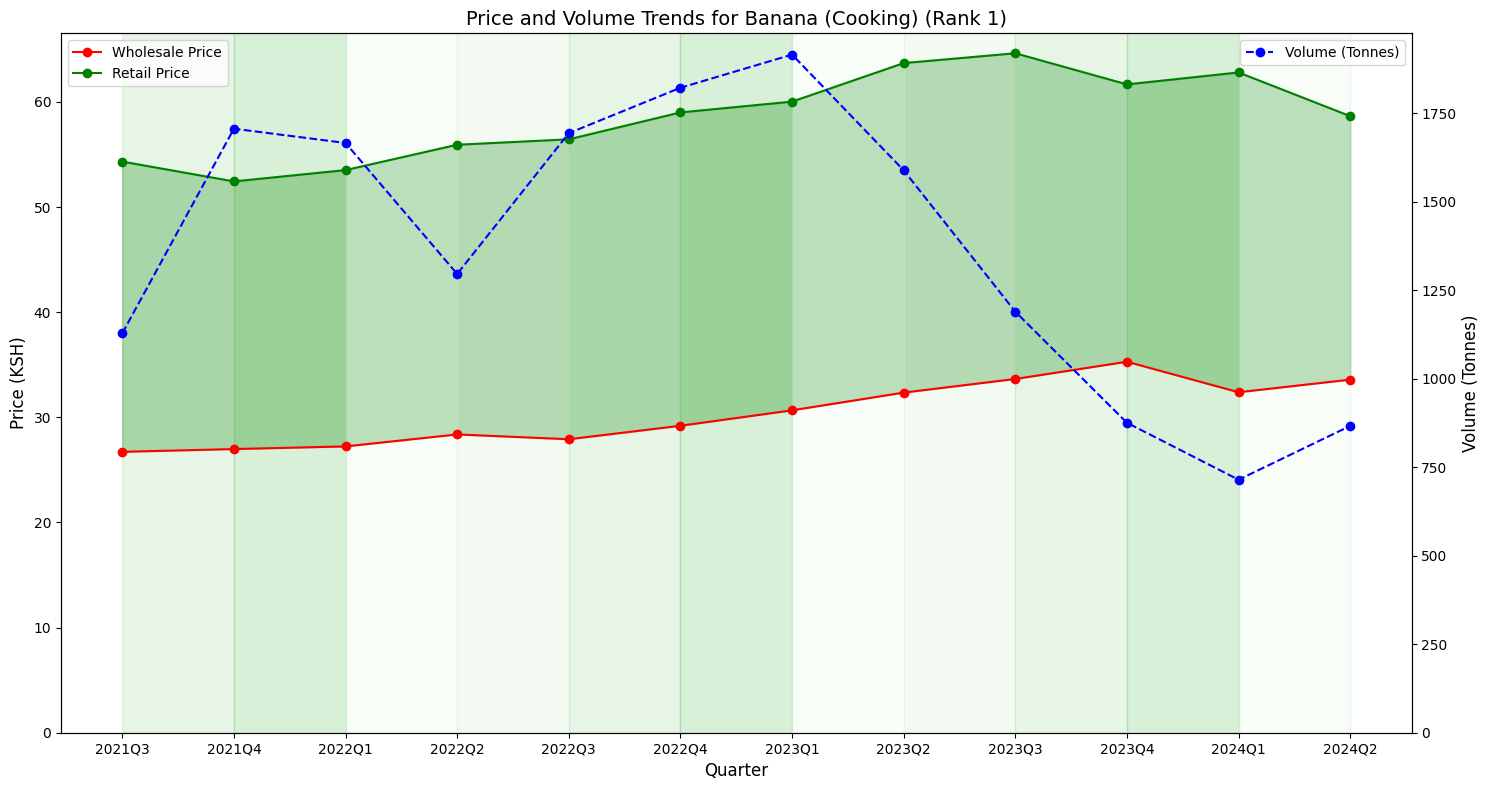

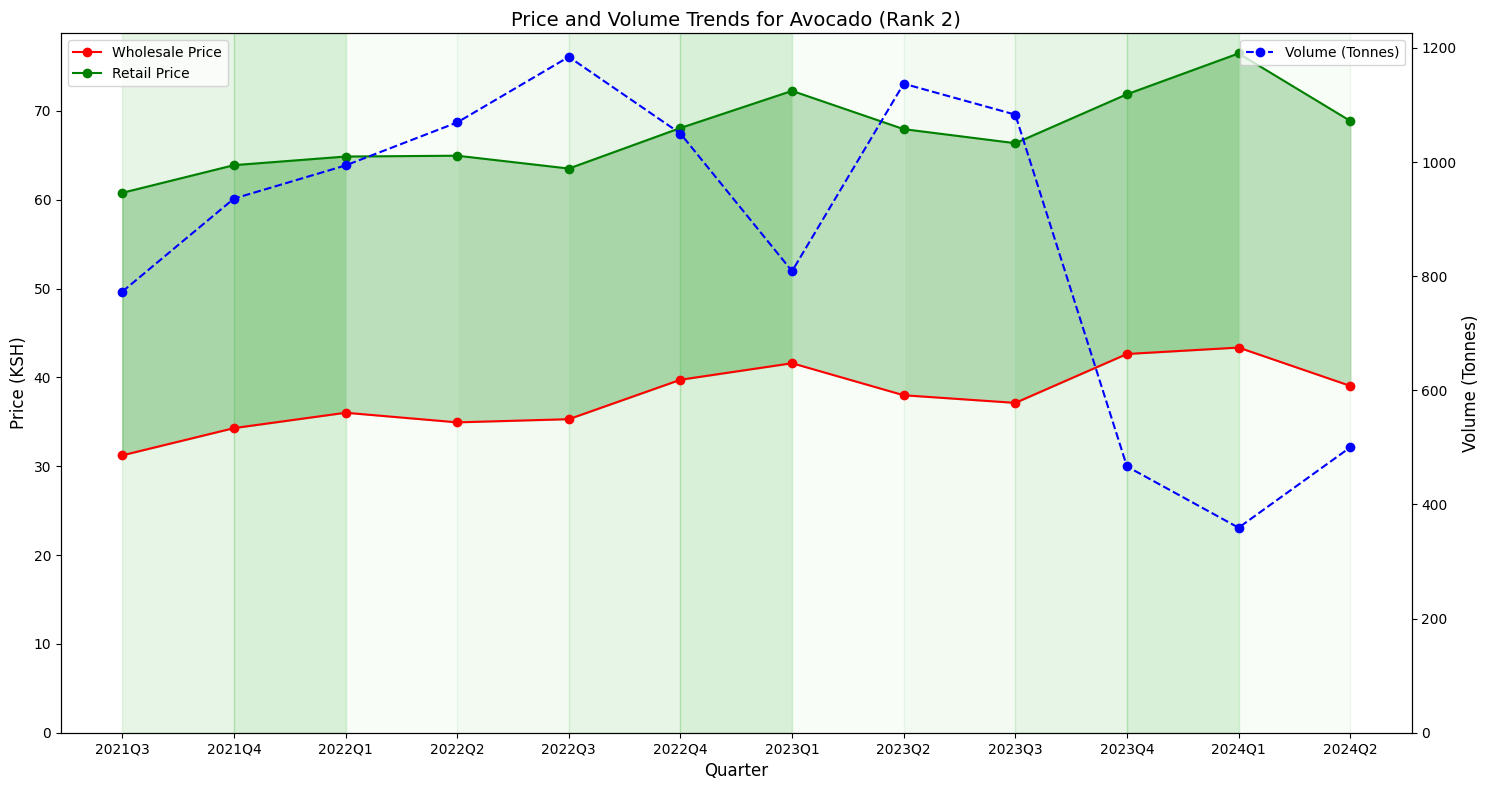

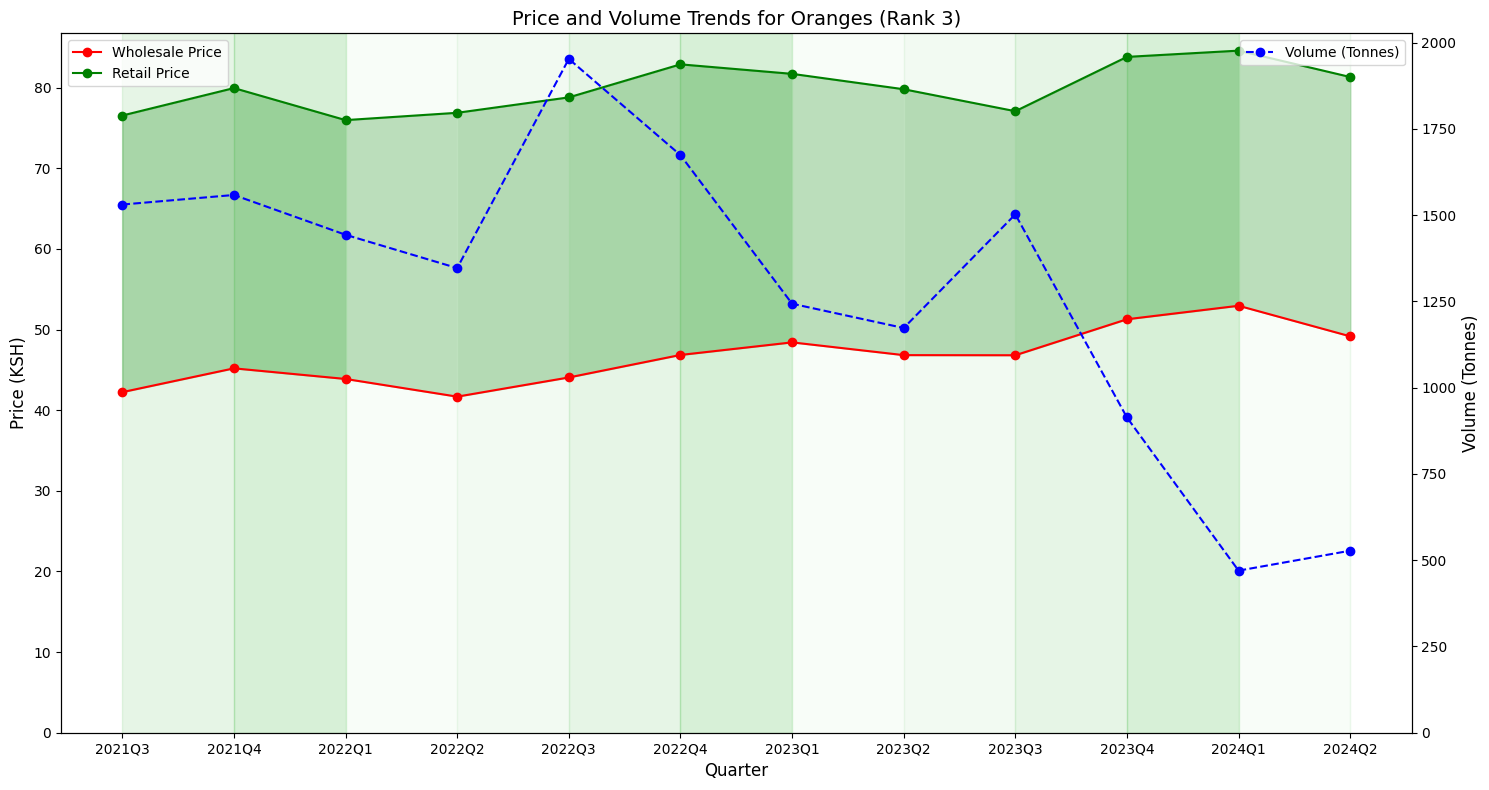

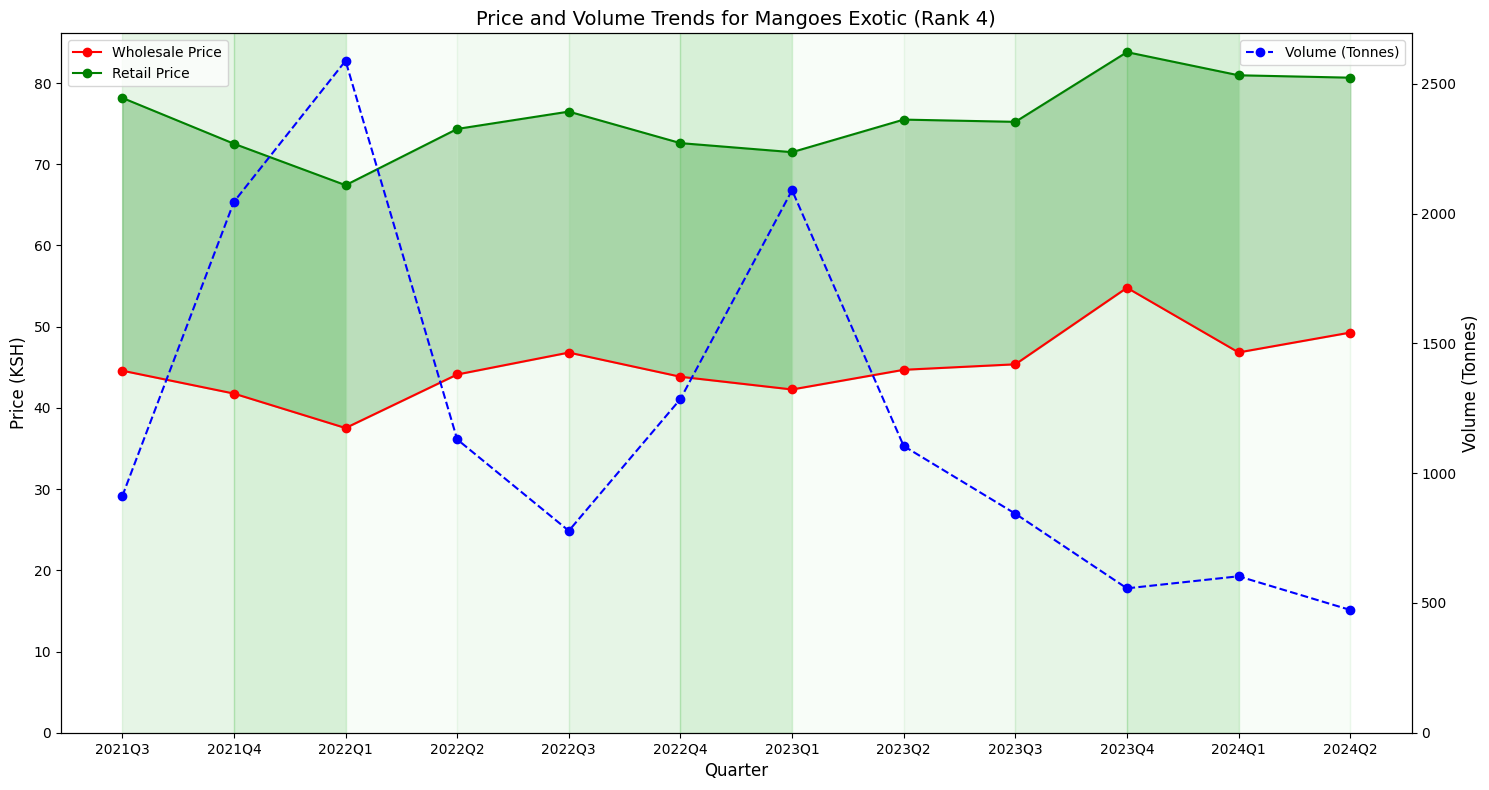

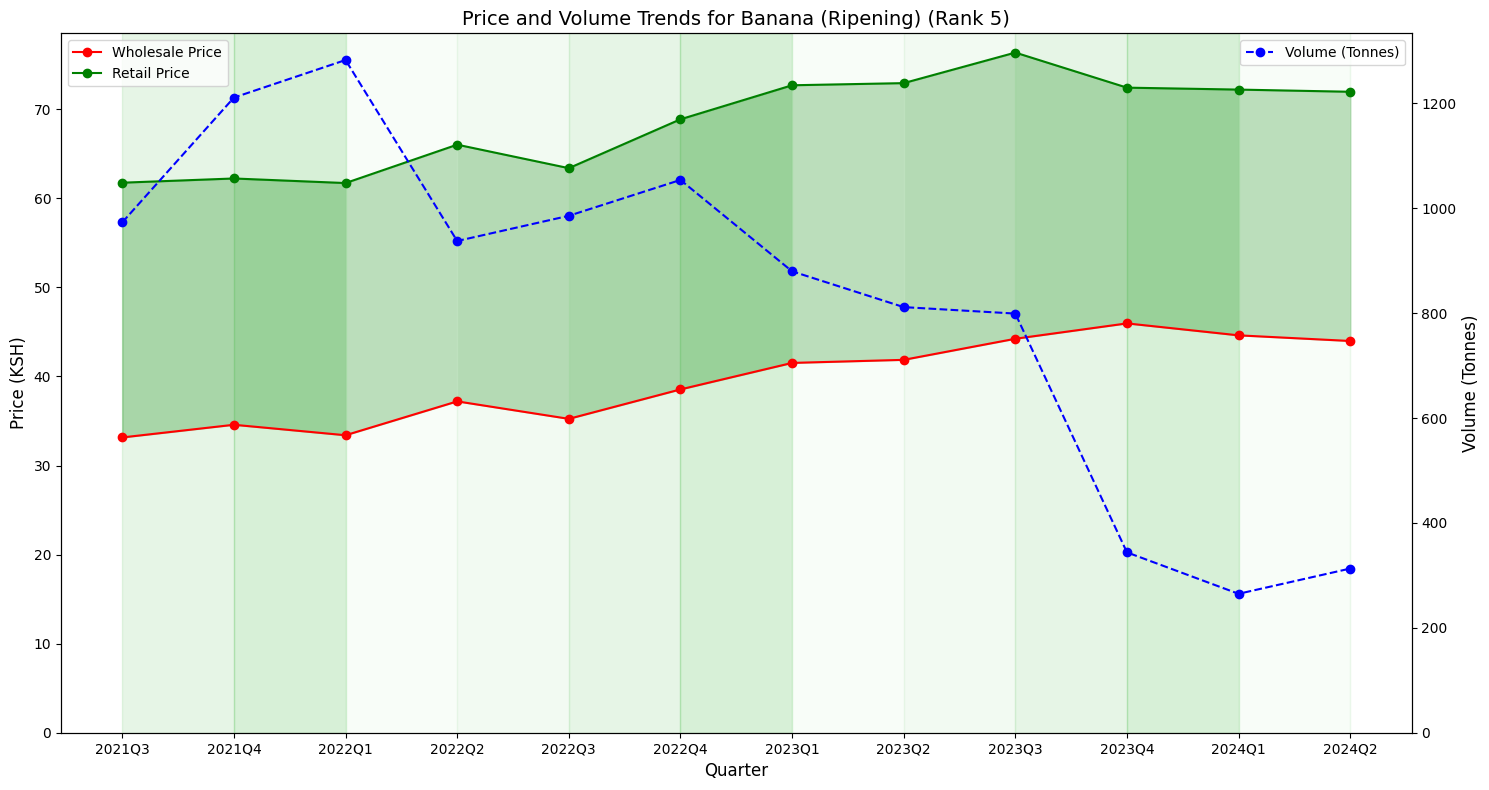

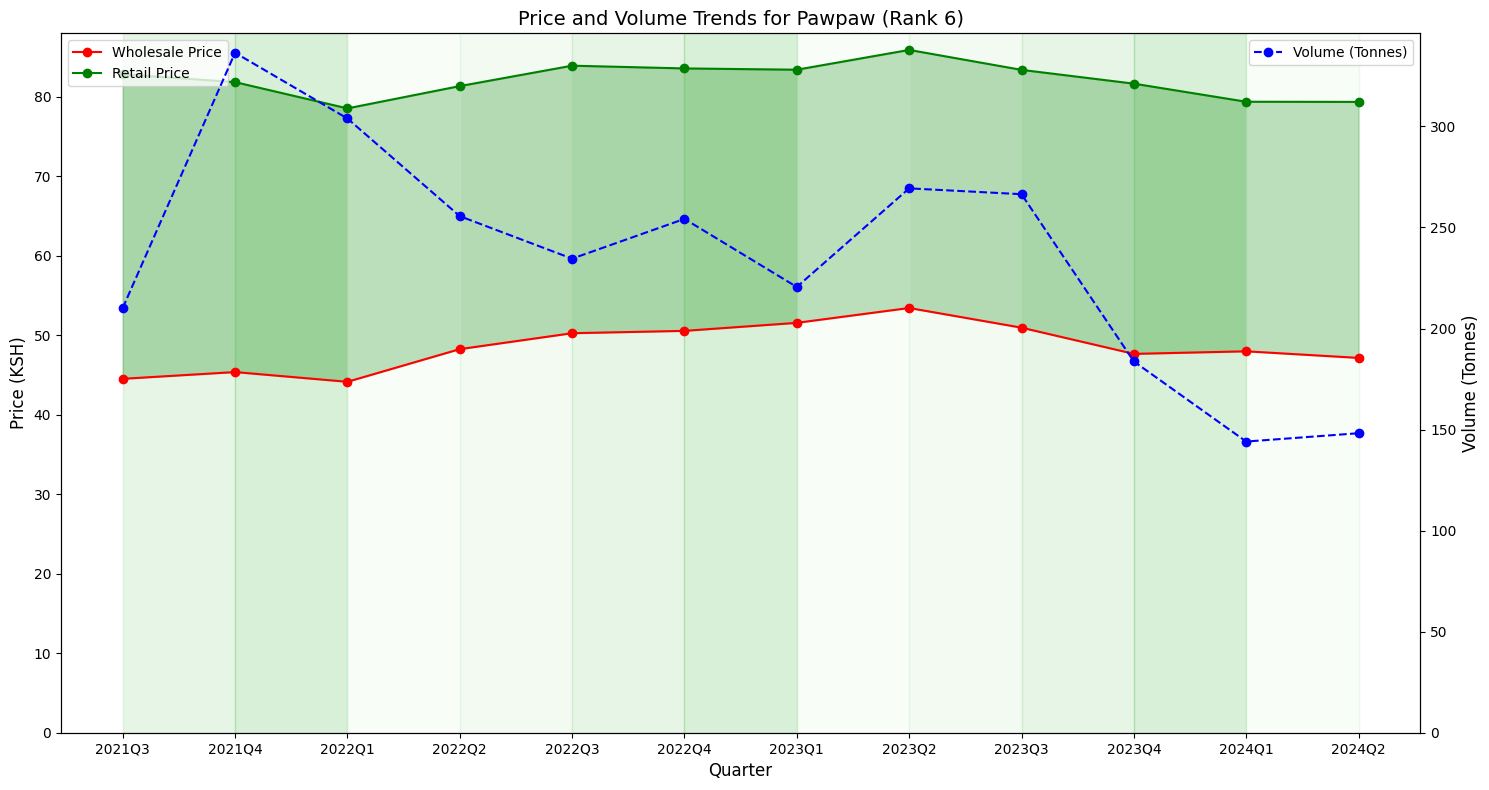

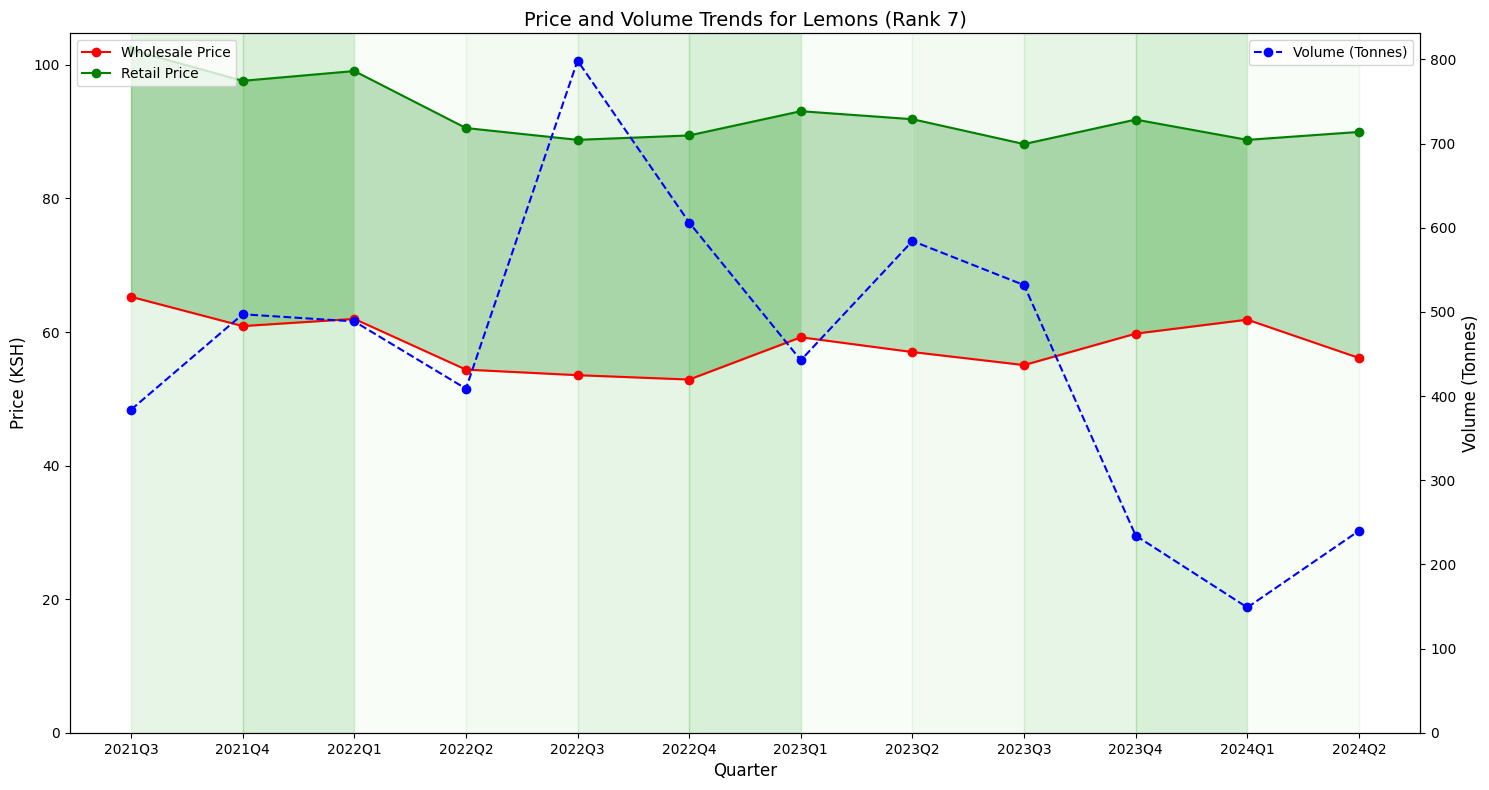

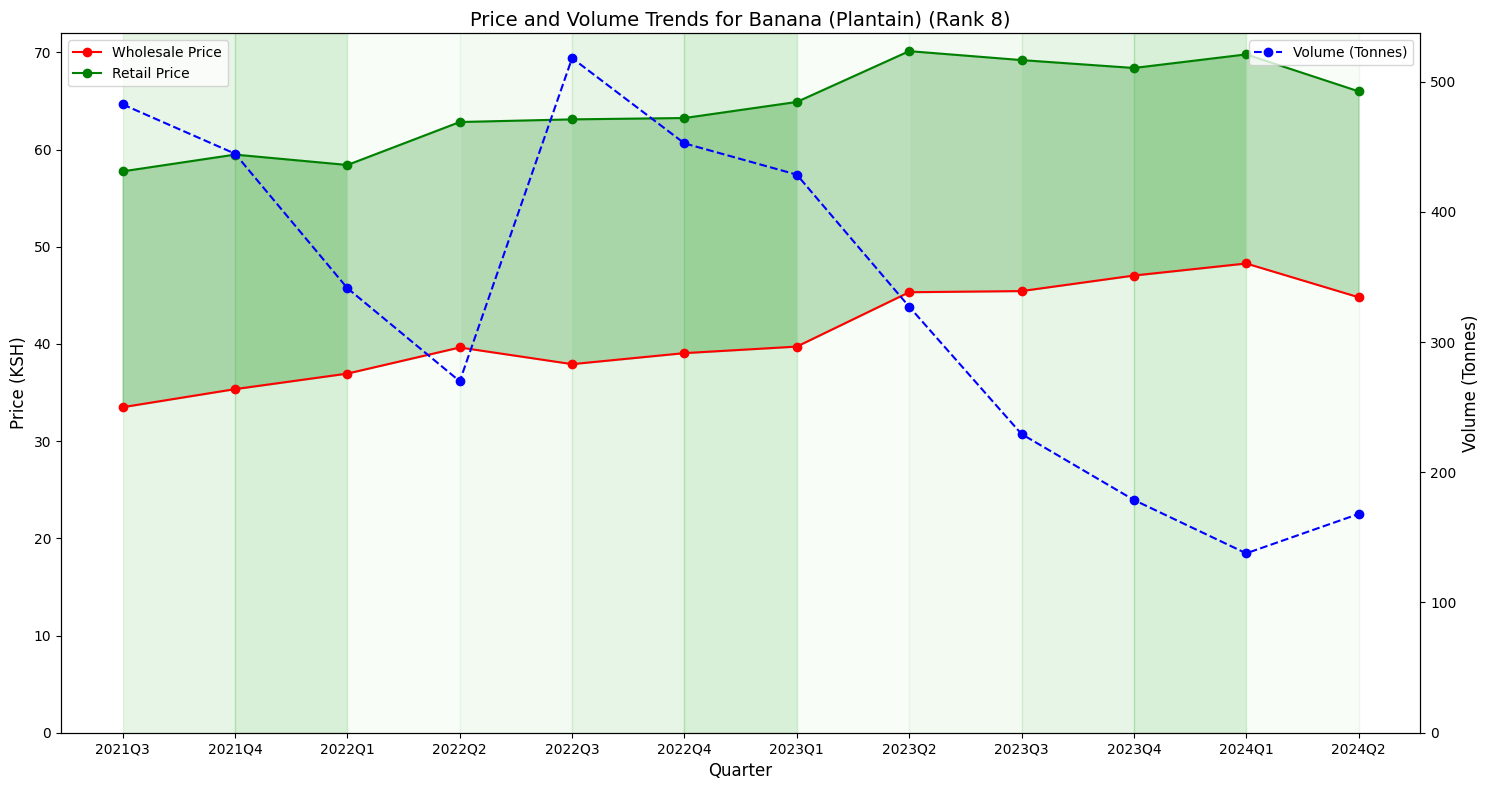

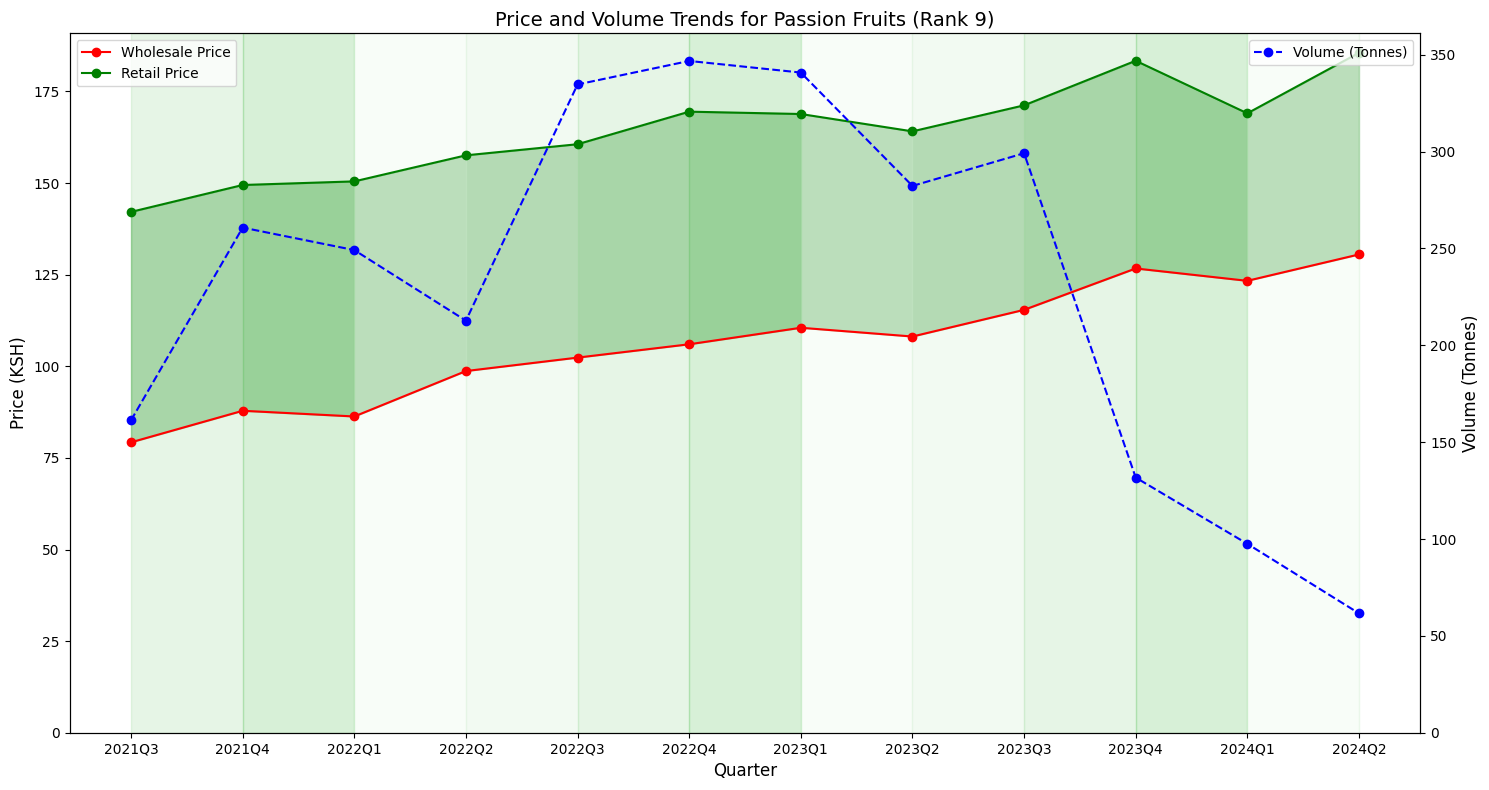

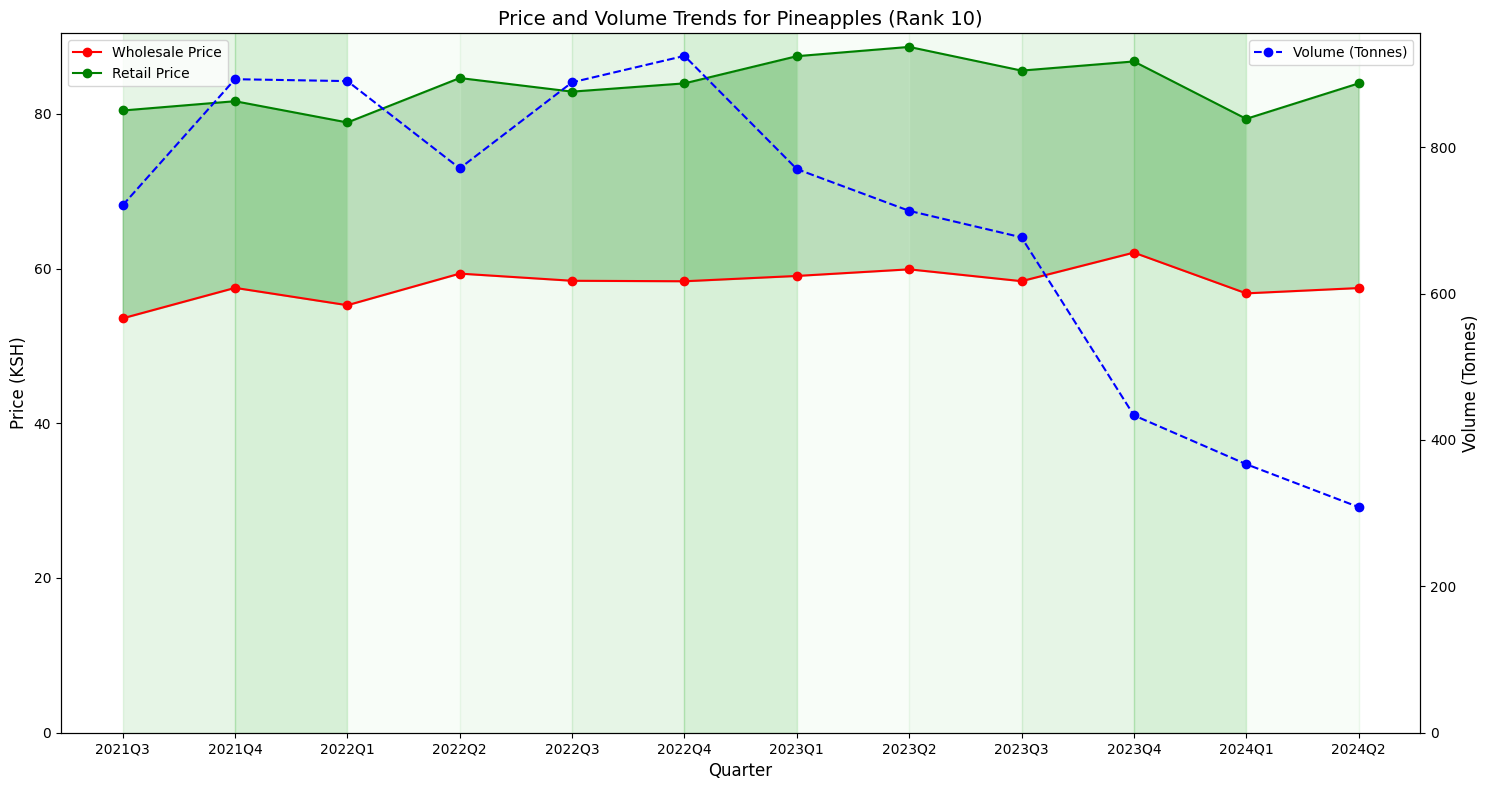

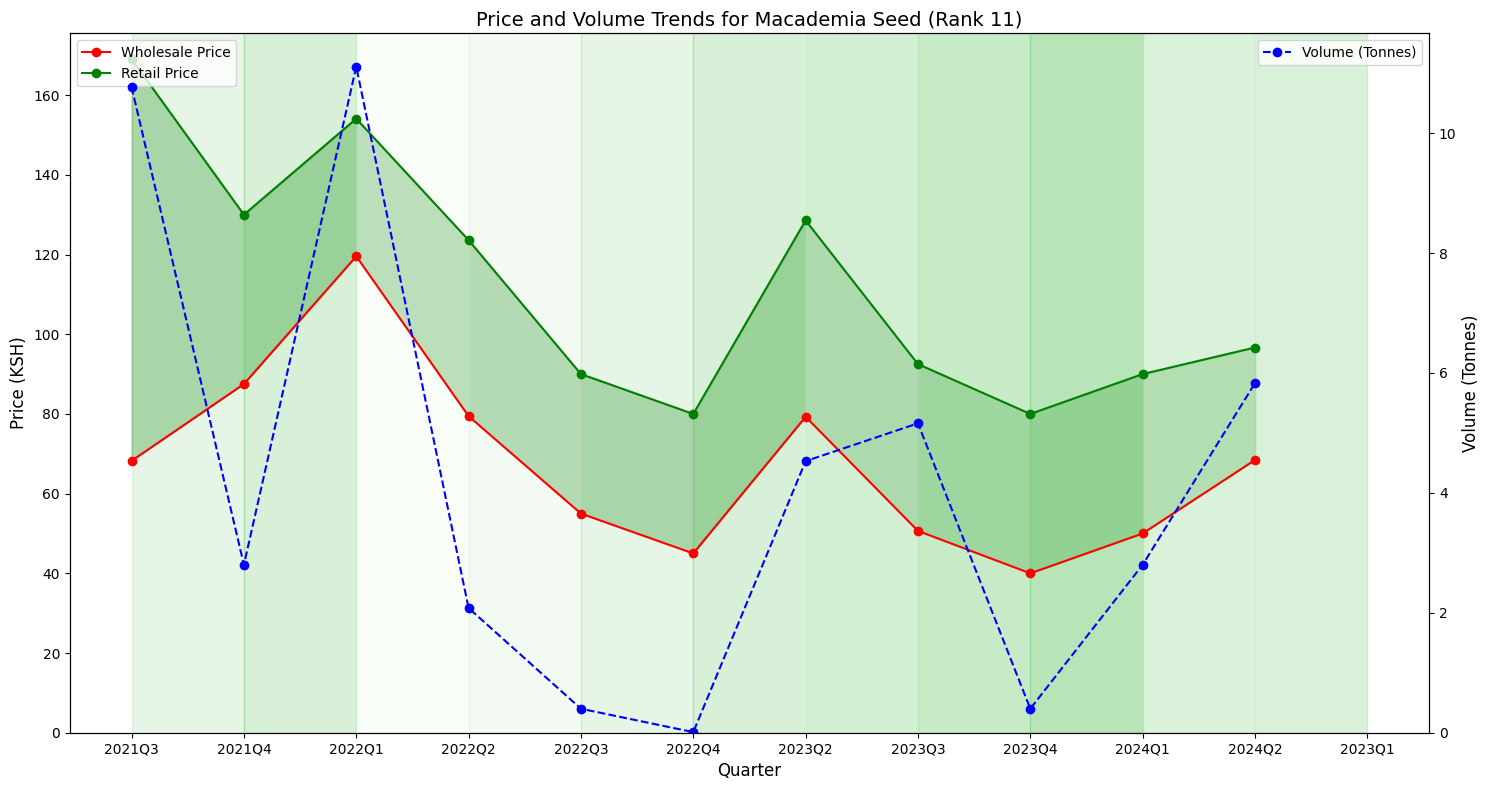

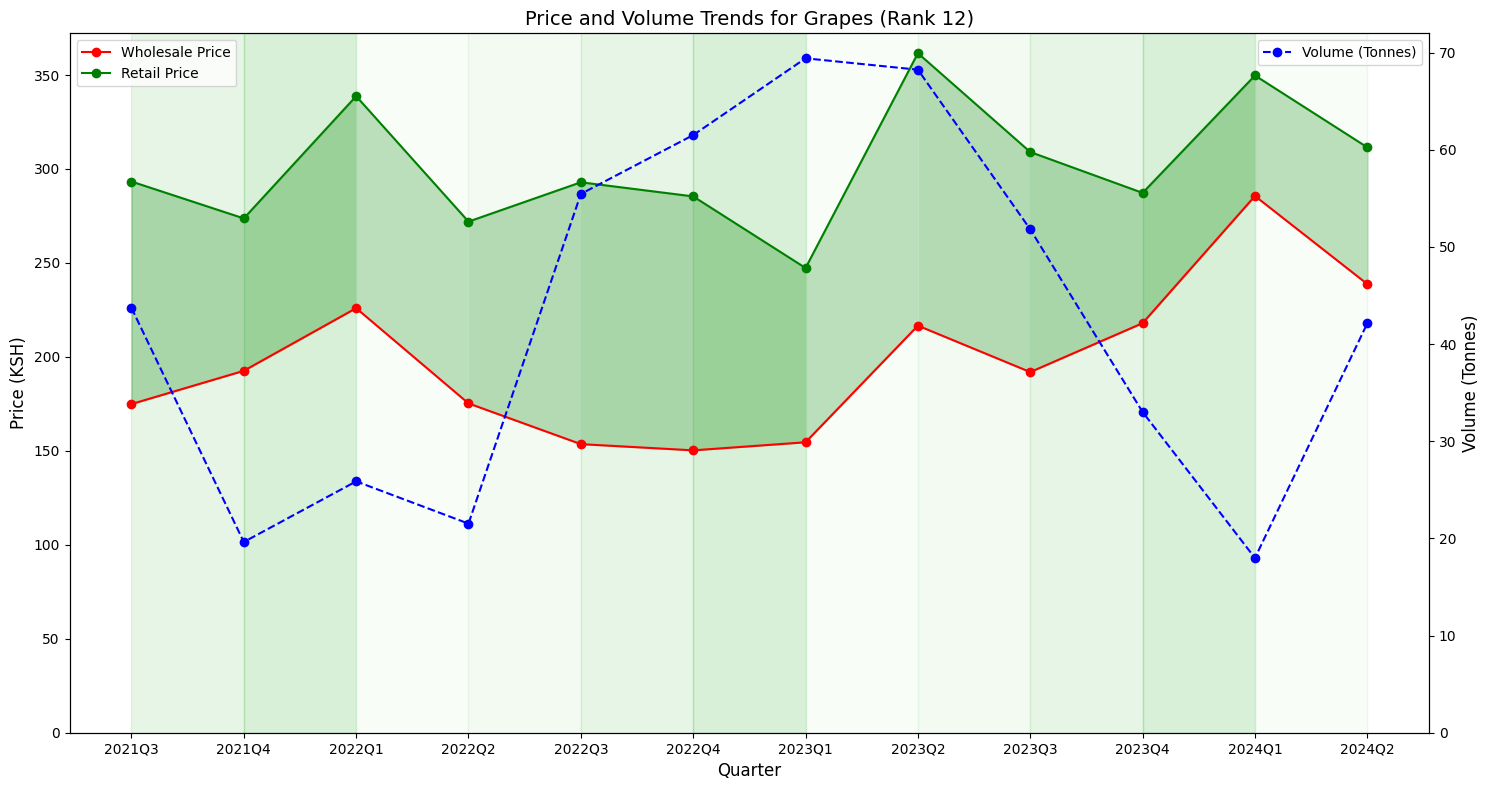

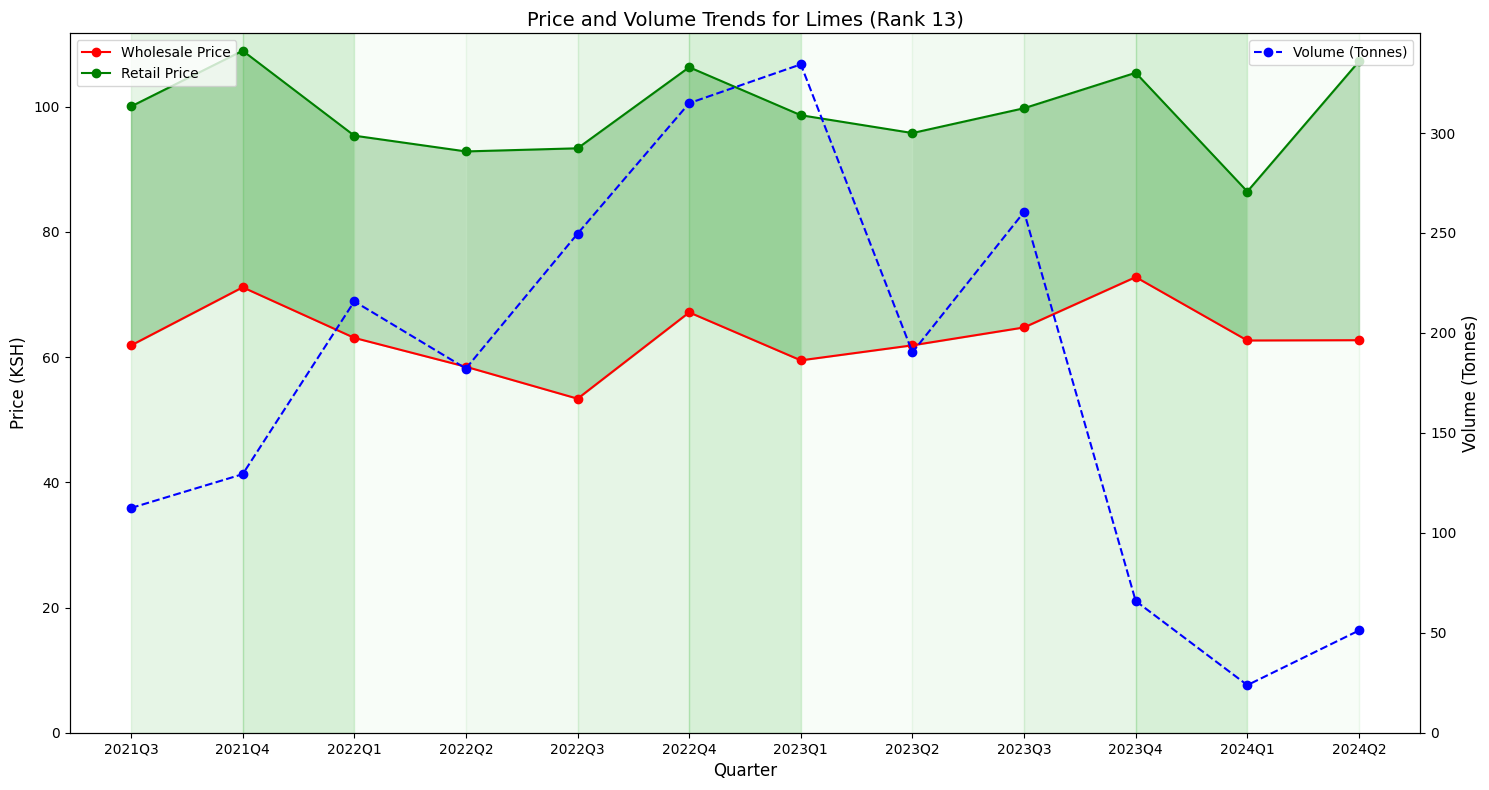

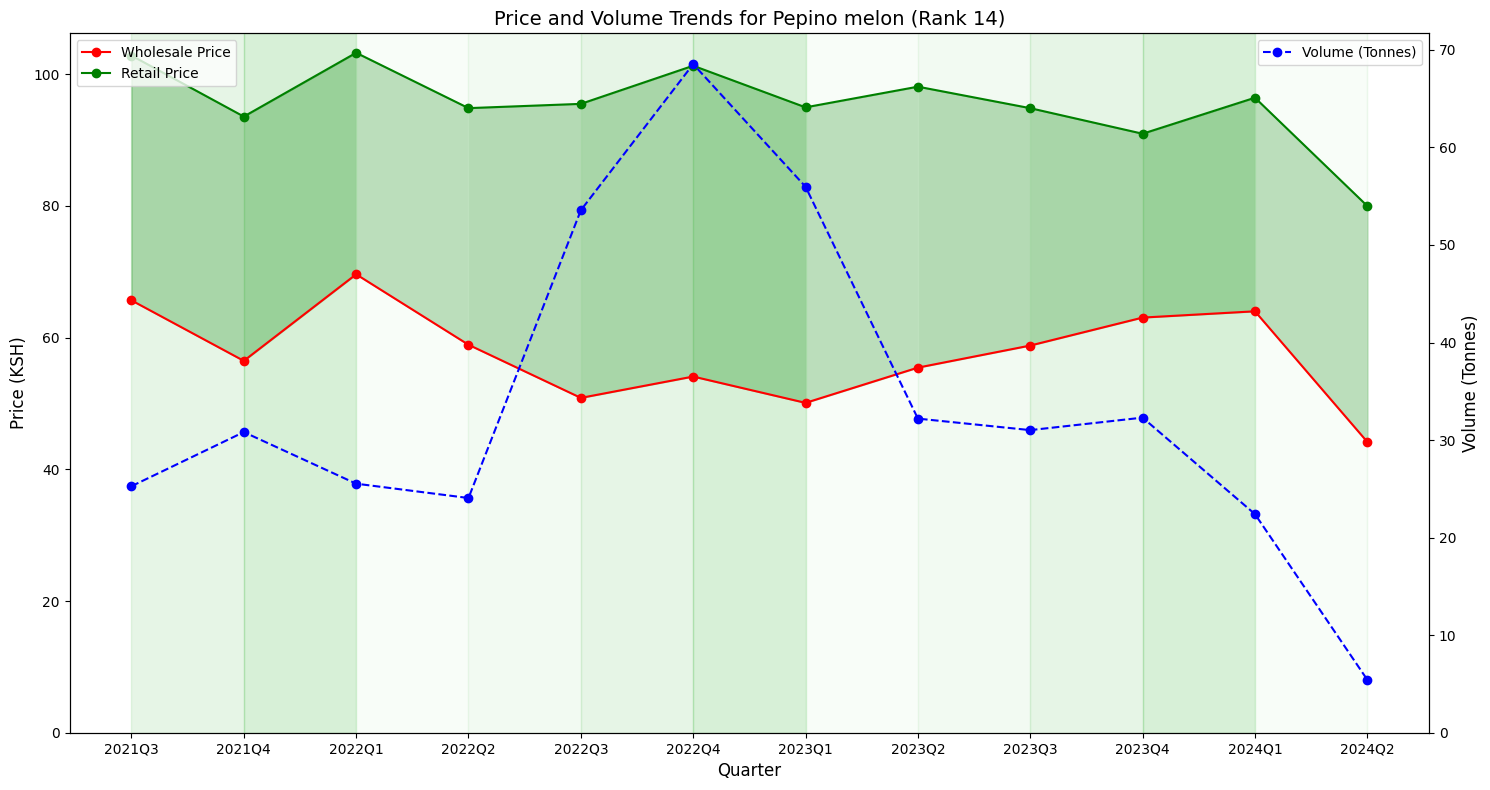

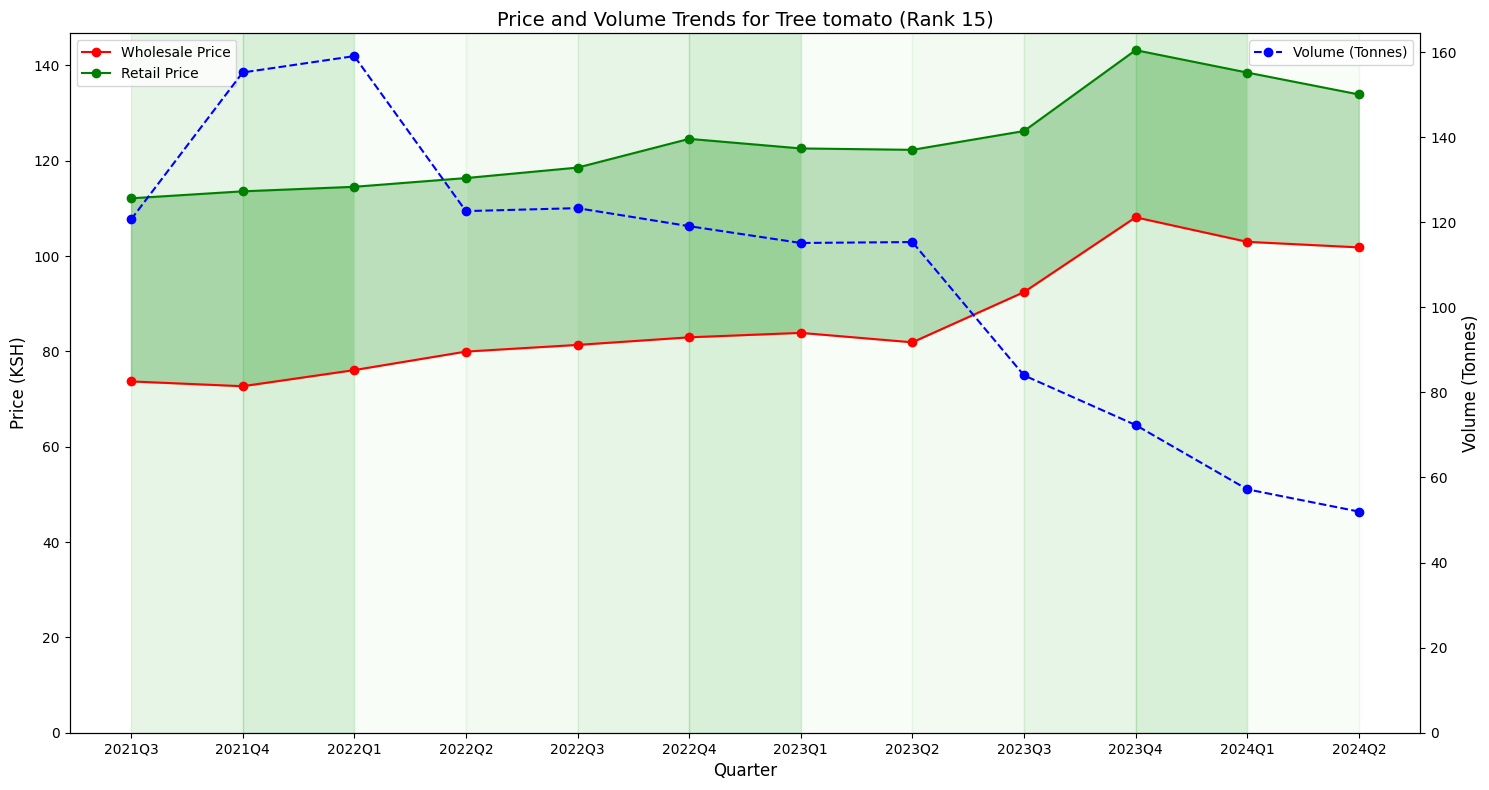

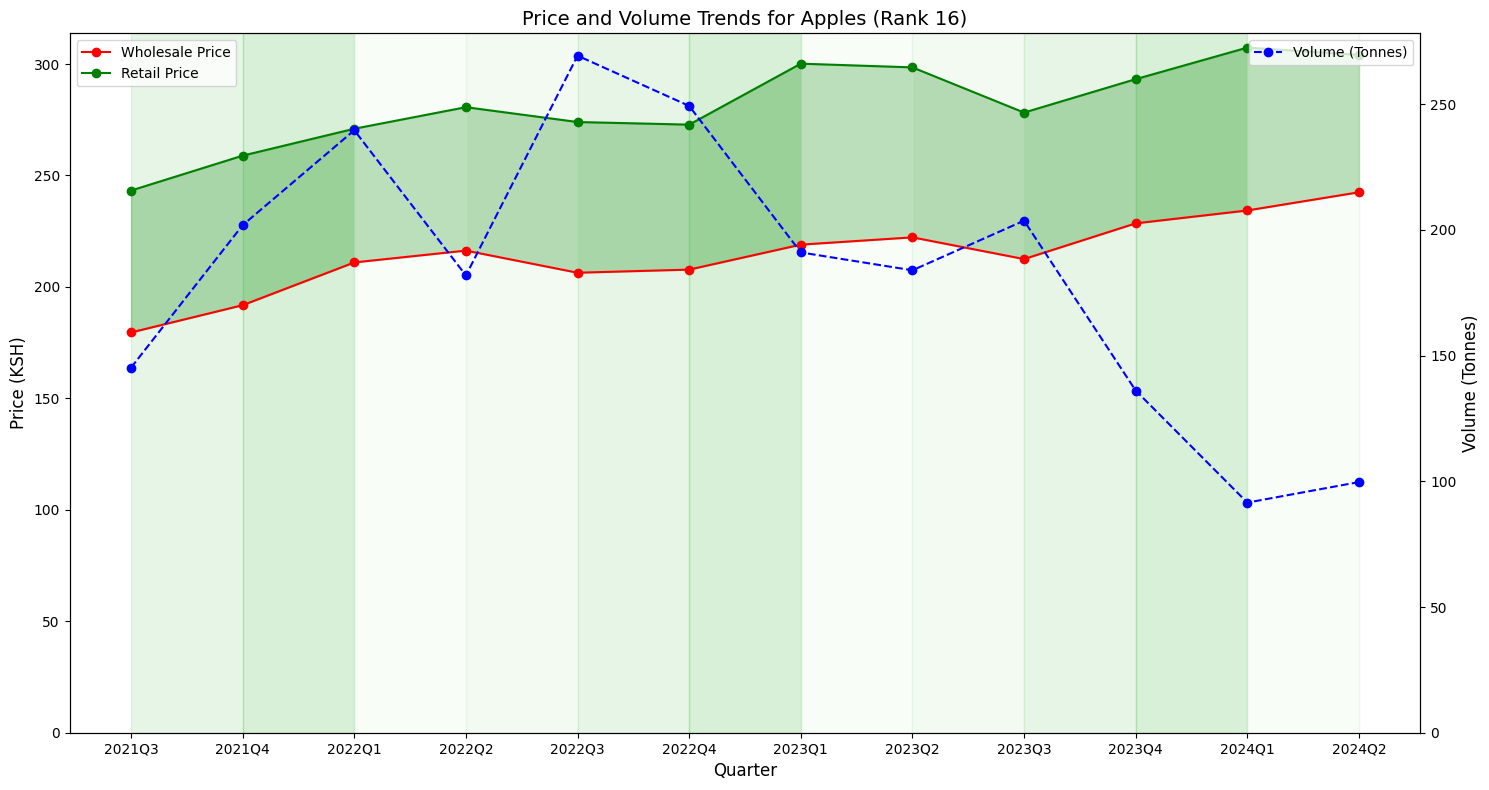

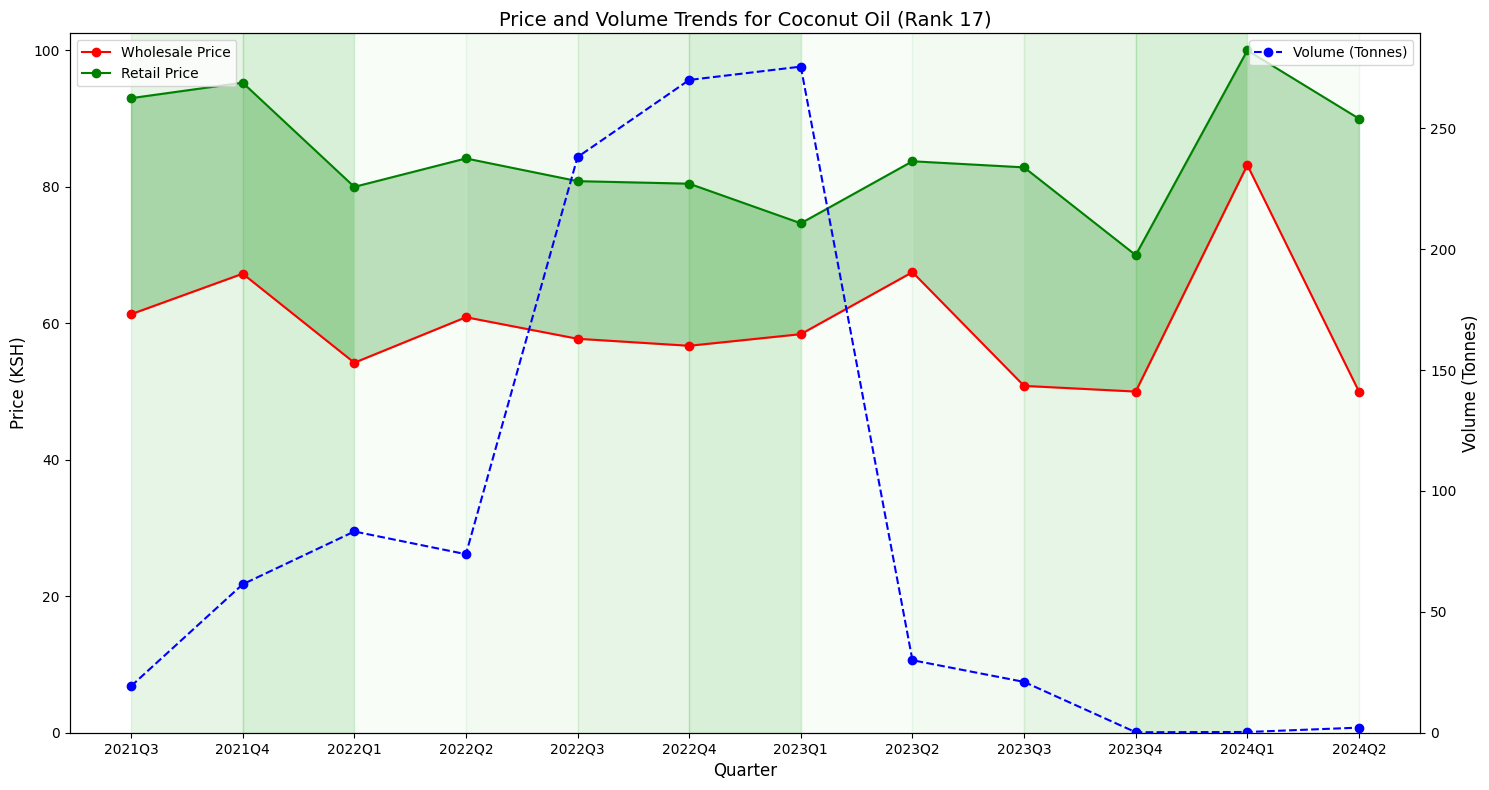

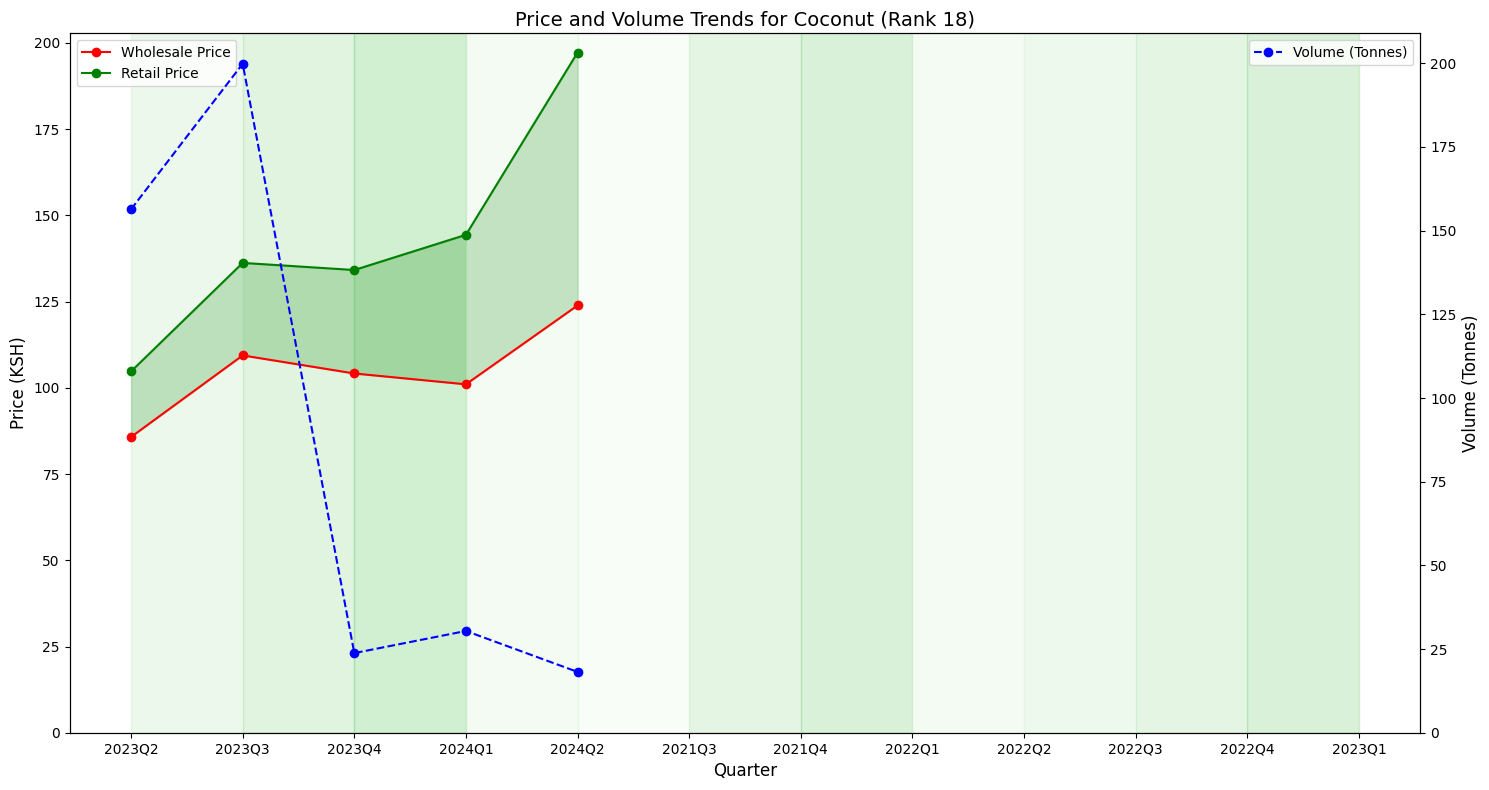

In [159]:
# Ensure the 'quarter' column is in string format for plotting
aggregated_data['quarter'] = aggregated_data['quarter'].astype(str)

# Step 1: Aggregate the data by 'commodity' and 'quarter'
# We calculate the mean of wholesale and retail prices, and the sum of total volume for each quarter
aggregated_by_quarter = aggregated_data.groupby(['quarter', 'commodity']).agg(
    avg_wholesale_price=('avg_wholesale_price', 'mean'),
    avg_retail_price=('avg_retail_price', 'mean'),
    total_volume_tonnes=('total_volume_tonnes', 'sum')
).reset_index()

# Step 2: Extract the commodities from the ranked dataset
top_combined_commodities = ranked_commodities['commodity'].unique()  # Use this from your ranked dataset

# Step 3: Loop through the commodities and plot the aggregated data
for i, commodity in enumerate(top_combined_commodities, 1):  # i is the rank (starting from 1)
    fig, ax1 = plt.subplots(figsize=(15, 8))

    # Filter the aggregated data for the current commodity
    commodity_data = aggregated_by_quarter[aggregated_by_quarter['commodity'] == commodity]

    # Plot wholesale and retail prices on the left y-axis
    ax1.plot(commodity_data['quarter'], commodity_data['avg_wholesale_price'], color='red', marker='o', label='Wholesale Price')
    ax1.plot(commodity_data['quarter'], commodity_data['avg_retail_price'], color='green', marker='o', label='Retail Price')

    # Shade the area between wholesale and retail prices
    ax1.fill_between(commodity_data['quarter'], commodity_data['avg_wholesale_price'], commodity_data['avg_retail_price'], 
                     where=(commodity_data['avg_retail_price'] > commodity_data['avg_wholesale_price']), color='green', alpha=0.3)

    # Set labels for the first y-axis (prices)
    ax1.set_xlabel('Quarter', fontsize=12)
    ax1.set_ylabel('Price (KSH)', fontsize=12, color='black')
    
    # Ensure y-axis starts at 0
    ax1.set_ylim(0)

    # Create a second y-axis for volume
    ax2 = ax1.twinx()
    ax2.plot(commodity_data['quarter'], commodity_data['total_volume_tonnes'], color='blue', linestyle='--', marker='o', label='Volume (Tonnes)')
    ax2.set_ylabel('Volume (Tonnes)', fontsize=12, color='black')

    # Ensure y-axis for volume starts at 0
    ax2.set_ylim(0)

    # Shade the background for each quarter with corresponding shades of green
    for j, quarter in enumerate(quarter_labels):
        if "Q1" in quarter:
            color = shading_colors[0]  # Lightest green for Q1
        elif "Q2" in quarter:
            color = shading_colors[1]  # Slightly darker green for Q2
        elif "Q3" in quarter:
            color = shading_colors[2]  # Darker green for Q3
        elif "Q4" in quarter:
            color = shading_colors[3]  # Darkest green for Q4
        
        ax1.axvspan(quarter, quarter_labels[j+1] if j+1 < len(quarter_labels) else quarter, color=color, alpha=0.2)

    # Set plot title and legend
    plt.title(f'Price and Volume Trends for {commodity} (Rank {i})', fontsize=14)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

---

# Findings

1. **High Volume Commodities**:
    
    - **Banana (Cooking)** ranks highest with a total volume of 16,457.69 tonnes, making it the most popular commodity by supply volume.
    
    - **Oranges** and **Mangoes Exotic** follow closely with total volumes of 15,336.43 and 14,409.12 tonnes, respectively.
    
    - **Avocado** and **Banana (Ripening)** also feature prominently in terms of volume.

2. **Profitability**:
    
    - **Banana (Cooking)** not only tops the volume list but also has the highest average percentage profit (118.80%).
    
    - Other highly profitable commodities include **Avocado** (99.37%), **Banana (Ripening)** (93.68%), and **Macademia Seed** (86.84%).
    
    - **Grapes** have a lower volume (510.29 tonnes) but generate a high average percentage profit (81.13%).

3. **Resell Margins**:
    
    - The commodities with the highest average resell margins are **Grapes** (KSh 109.37), **Passion Fruits** (KSh 59.08), and **Macadamia Seed** (KSh 50.76).
    
    - Despite lower volumes, these commodities show high profit potential due to strong price differentials.

4. **Balanced Commodities (Volume + Profit)**:
    
    - **Banana (Cooking)** and **Avocado** perform well on both volume and profitability, with combined scores of 1.0 and 3.0 respectively.
    
    - **Oranges**, **Mangoes Exotic**, and **Banana (Ripening)** also balance high volumes with relatively high profit margins, making them key commodities for both volume and profit generation.

5. **Low Volume Commodities**:
    
    - **Macademia Seed** has the lowest total volume (45.89 tonnes) but ranks high in profitability, highlighting its niche market status.
    
    - Other low-volume commodities such as **Pepino melon** and **Grapes** are profitable but may be constrained by limited supply.


# Insights

1. **Dual Strength in Volume and Profitability**:
    
    - Commodities like **Banana (Cooking)**, **Avocado**, and **Oranges** provide both high supply and profitability, suggesting they should be the focus for scaling production and market linkage.
  
2. **Profit Maximization with Niche Commodities**:
    
    - Although commodities like **Grapes**, **Macademia Seed**, and **Passion Fruits** have lower total volumes, their high profit margins indicate opportunities for specialized, high-margin market niches.

3. **Potential in Medium-Volume Commodities**:
    
    - Commodities such as **Pawpaw**, **Lemons**, and **Banana (Plantain)**, which have medium supply volumes and good profit margins, represent stable options for consistent profitability without the risks associated with niche markets.

4. **Low-Volume Commodities Struggle**:
    
    - Some commodities like **Coconut Oil**, **Coconut**, and **Apples** have relatively low profitability and lower ranks, suggesting they may require targeted interventions or specialization to remain viable.

# Recommendations

1. **Focus on High-Volume, High-Profit Commodities**:
    
    - For smallholder farmers and market linkages, emphasis should be placed on expanding production and market reach for **Banana (Cooking)**, **Avocado**, and **Oranges**, as they consistently provide high returns in both volume and profit.
  
2. **Develop Niche Markets**:
    
    - Market linkage players should explore niche markets for **Grapes**, **Macademia Seed**, and **Passion Fruits**, as these commodities, despite their lower volume, have high-profit margins. Specialized marketing and distribution strategies can capitalize on their high resell margins.
  
3. **Strengthen Supply Chains for Mid-Tier Commodities**:
    
    - Commodities like **Pawpaw**, **Lemons**, and **Banana (Plantain)** should be targeted for improved supply chain efficiency to maintain their profitability while increasing volume. Smallholders should focus on improving yields and reducing waste to sustain profitability.

4. **Support Low-Volume Commodities with Specific Interventions**:
    
    - Targeted support, including training, supply chain optimization, and marketing, is needed for low-volume, low-profit commodities like **Coconut Oil**, **Coconut**, and **Apples**. Such interventions could help unlock value in these categories.

5. **Diversification and Risk Management**:
    
    - Encourage diversification among smallholder farmers to balance between high-volume commodities and high-margin niche markets. This will mitigate risks associated with price volatility and supply shortages in any single commodity market.

    ---


---

## Project Author and Details

**Author**: Edward Njiru 

**Email**: enjiru@cropcircle.ngo

**Organization**: Crop Circle Africa 

**Date**: September 2024 

---

### Copyright & License

This project and its contents are licensed under the [MIT License](https://opensource.org/licenses/MIT).

---